# Import library and Dataset

In [ ]:
#from google.colab import files
#files.upload()

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
#! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
import json
import zipfile
import os
from pathlib import Path
api_token = {"username":"rattapornk","key":"9a9017f57e099d1b52bfccf94afccf30"}
kaggle_path = Path('/root/.kaggle')
os.makedirs(kaggle_path, exist_ok=True)

with open (kaggle_path/'kaggle.json', 'w') as handl:
    json.dump(api_token,handl)

In [ ]:
! kaggle datasets download -d rattapornk/memcat-datacat

100% 255k/255k [00:00<00:00, 821kB/s]
100% 255k/255k [00:00<00:00, 820kB/s]


In [ ]:
! unzip /content/memcat-datacat.zip

Archive:  /content/memcat-datacat.zip
  inflating: animal.csv              
  inflating: food.csv                
  inflating: landscape.csv           
  inflating: sports.csv              
  inflating: vehicle.csv             


In [ ]:
!kaggle datasets download -d rattapornk/memcat-split-csv

100% 66.1k/66.1k [00:00<00:00, 660kB/s]
100% 66.1k/66.1k [00:00<00:00, 658kB/s]


In [ ]:
! unzip /content/memcat-split-csv.zip

Archive:  /content/memcat-split-csv.zip
  inflating: test_animal_new.csv     
  inflating: test_food_new.csv       
  inflating: test_landscape_new.csv  
  inflating: train_animal_new.csv    
  inflating: train_food_new.csv      
  inflating: train_landscape_new.csv  
  inflating: val_animal_new.csv      
  inflating: val_food_new.csv        
  inflating: val_landscape_new.csv   


In [ ]:
! kaggle datasets download -d rattapornk/memcat-cat

100% 1.09G/1.09G [00:38<00:00, 31.2MB/s]
100% 1.09G/1.09G [00:38<00:00, 30.0MB/s]


In [ ]:
! unzip /content/memcat-cat.zip

Streaming output truncated to the last 5000 lines.
  inflating: landscape/n09376198_10845.jpg  
  inflating: landscape/n09376198_10901.jpg  
  inflating: landscape/n09376198_11171.jpg  
  inflating: landscape/n09376198_11360.jpg  
  inflating: landscape/n09376198_12294.jpg  
  inflating: landscape/n09376198_12692.jpg  
  inflating: landscape/n09376198_13588.jpg  
  inflating: landscape/n09376198_13928.jpg  
  inflating: landscape/n09376198_1396.jpg  
  inflating: landscape/n09376198_14485.jpg  
  inflating: landscape/n09376198_14571.jpg  
  inflating: landscape/n09376198_15308.jpg  
  inflating: landscape/n09376198_15319.jpg  
  inflating: landscape/n09376198_15467.jpg  
  inflating: landscape/n09376198_15858.jpg  
  inflating: landscape/n09376198_16065.jpg  
  inflating: landscape/n09376198_16253.jpg  
  inflating: landscape/n09376198_16513.jpg  
  inflating: landscape/n09376198_16757.jpg  
  inflating: landscape/n09376198_17428.jpg  
  inflating: landscape/n09376198_178.jpg  
  infla

In [ ]:
!pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 3.7 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import os
import cv2

import numpy as np
from torch import nn
from torch import Tensor
from PIL import Image
from torchvision import transforms
import torchvision
from einops import rearrange, reduce, repeat
from einops.layers.torch import Rearrange, Reduce
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.utils import shuffle
import torchvision.models as models
import gc
from tqdm import tqdm
import torch.optim as optim
import random
import pandas as pd
from sklearn.utils import shuffle
import time

from transformers import ResNetConfig, ResNetModel
from transformers import AutoImageProcessor, ConvNextImageProcessor, ConvNextModel
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [ ]:
import timm

In [ ]:
! pip install torchsummary

In [ ]:
from torchsummary import summary
import torch.nn.functional as F

In [ ]:
from scipy.stats import spearmanr
import time

# Preprocess & Split

In [ ]:
df_vehicle = pd.read_csv("/content/vehicle.csv")
df_vehicle["image_file"] =df_vehicle["image_file"].apply(lambda file: "/content/vehicle" +"/"+ file) # Create image path
df_vehicle["memorability_wo_fa_correction"] = df_vehicle["memorability_wo_fa_correction"].values.astype(np.float32)

In [ ]:
df_vehicle.head()

Unnamed: 0                         image_file category subcategory  \
0        8001  /content/vehicle/000000002258.jpg  vehicle    airplane   
1        8002  /content/vehicle/000000003035.jpg  vehicle    airplane   
2        8003  /content/vehicle/000000025559.jpg  vehicle    airplane   
3        8004  /content/vehicle/000000032093.jpg  vehicle    airplane   
4        8005  /content/vehicle/000000035485.jpg  vehicle    airplane   

   current_height  current_width source searched_label  resize_factor   H  FA  \
0           480.0          640.0   coco       airplane            1.0  68   1   
1           425.0          640.0   coco          truck            1.0  72   3   
2           480.0          640.0   coco       airplane            1.0  78   1   
3           427.0          640.0   coco       airplane            1.0  67   3   
4           360.0          640.0   coco       airplane            1.0  96  12   

   n_resp  memorability_wo_fa_correction  memorability_w_fa_correction  
0      99                       0.686869                      0.676768  
1      96                       0.750000                      0.718750  
2     108                       0.722222                      0.712963  
3     107                       0.626168                      0.598131  
4     120                       0.800000                      0.700000

Image shape: (2000, 224, 224, 3)
Minimum pixel value: 0
Maximum pixel value: 255
Mean pixel value: 118.69407742081208
Standard deviation of pixel values: 70.280178979011


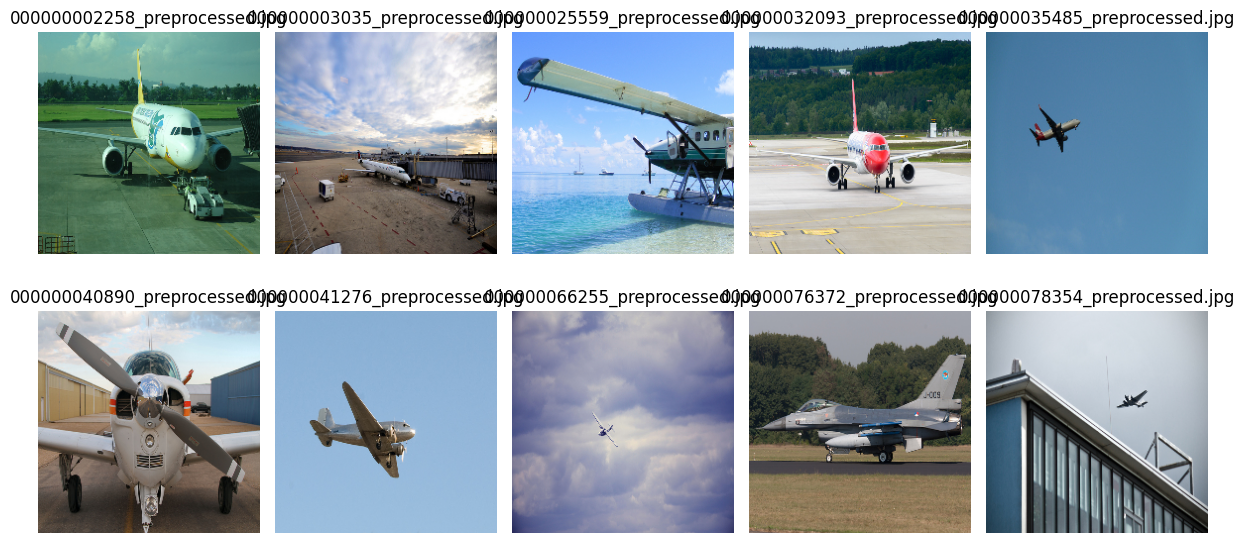

In [ ]:
# Sample data (replace this with your DataFrame)
df_vehicle = pd.DataFrame({
    'image_file': df_vehicle["image_file"],
    'memoscore': df_vehicle["memorability_wo_fa_correction"]
})

# Create a new column to store the paths of preprocessed images
df_vehicle['preprocessed_image_path'] = ''

# Empty lists to store preprocessed images
images = []

# Load and preprocess images
for index, row in df_vehicle.iterrows():
    image_path = row['image_file']
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error reading image: {image_path}")
        continue

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = cv2.resize(image, (224, 224))  # Resize image if necessary

    # Save preprocessed image to the same path
    preprocessed_path = os.path.splitext(image_path)[0] + '_preprocessed.jpg'
    cv2.imwrite(preprocessed_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

    # Store preprocessed image path in the DataFrame
    df_vehicle.at[index, 'preprocessed_image_path'] = preprocessed_path

    images.append(image)

# Convert the list of images into a NumPy array
images = np.array(images)

# Save preprocessed images as NumPy array (if needed)
#np.save('/content/drive/MyDrive/your_folder/preprocessed_images.npy', images)

# Calculate basic image statistics
print('Image shape:', images.shape)
print('Minimum pixel value:', np.min(images))
print('Maximum pixel value:', np.max(images))
print('Mean pixel value:', np.mean(images))
print('Standard deviation of pixel values:', np.std(images))

# Visualize sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()
for i in range(min(10, len(images))):
    axes[i].imshow(images[i])
    axes[i].axis('off')
    axes[i].set_title(os.path.basename(df_vehicle.at[i, 'preprocessed_image_path']))  # Display file name as title
plt.tight_layout()
plt.show()

# Display the updated DataFrame with preprocessed image paths
#print(df_landscape)

In [ ]:
df_vehicle.head()

image_file  memoscore  \
0  /content/vehicle/000000002258.jpg   0.686869   
1  /content/vehicle/000000003035.jpg   0.750000   
2  /content/vehicle/000000025559.jpg   0.722222   
3  /content/vehicle/000000032093.jpg   0.626168   
4  /content/vehicle/000000035485.jpg   0.800000   

                          preprocessed_image_path  
0  /content/vehicle/000000002258_preprocessed.jpg  
1  /content/vehicle/000000003035_preprocessed.jpg  
2  /content/vehicle/000000025559_preprocessed.jpg  
3  /content/vehicle/000000032093_preprocessed.jpg  
4  /content/vehicle/000000035485_preprocessed.jpg

In [ ]:
del df_vehicle["image_file"]

In [ ]:
df_vehicle.head()

memoscore                         preprocessed_image_path
0   0.686869  /content/vehicle/000000002258_preprocessed.jpg
1   0.750000  /content/vehicle/000000003035_preprocessed.jpg
2   0.722222  /content/vehicle/000000025559_preprocessed.jpg
3   0.626168  /content/vehicle/000000032093_preprocessed.jpg
4   0.800000  /content/vehicle/000000035485_preprocessed.jpg

In [ ]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(pd.DataFrame(df_vehicle.drop('memoscore', axis=1)), pd.DataFrame(df_vehicle['memoscore']), test_size=0.1)

# Split the validation set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5)

# Print the train, validation, and test set sizes
print('Train set size:', len(X_train))
print('Validation set size:', len(X_val))
print('Test set size:', len(X_test))

Train set size: 1800
Validation set size: 100
Test set size: 100


In [ ]:
X_train.head()

preprocessed_image_path
1229  /content/vehicle/n04349306_10700_preprocessed.jpg
1646     /content/vehicle/000000176946_preprocessed.jpg
1549   /content/vehicle/n04465501_2168_preprocessed.jpg
1417   /content/vehicle/n03594945_9076_preprocessed.jpg
932    /content/vehicle/n03670208_6791_preprocessed.jpg

In [ ]:
merged_train_vehicle= pd.concat([X_train, y_train], axis=1)
merged_train_vehicle

preprocessed_image_path  memoscore
1229  /content/vehicle/n04349306_10700_preprocessed.jpg   0.811765
1646     /content/vehicle/000000176946_preprocessed.jpg   0.787037
1549   /content/vehicle/n04465501_2168_preprocessed.jpg   0.906250
1417   /content/vehicle/n03594945_9076_preprocessed.jpg   0.672897
932    /content/vehicle/n03670208_6791_preprocessed.jpg   0.913979
...                                                 ...        ...
1602    /content/vehicle/n04465501_786_preprocessed.jpg   0.623762
1618     /content/vehicle/000000032059_preprocessed.jpg   0.650602
642    /content/vehicle/n02878222_6258_preprocessed.jpg   0.663366
318      /content/vehicle/000000153987_preprocessed.jpg   0.689655
1794  /content/vehicle/n04335435_54242_preprocessed.jpg   0.811111

[1800 rows x 2 columns]

In [ ]:
merged_val_vehicle = pd.concat([X_val, y_val], axis=1)
merged_val_vehicle

preprocessed_image_path  memoscore
1101   /content/vehicle/n02932891_8633_preprocessed.jpg   0.619565
34       /content/vehicle/000000268547_preprocessed.jpg   0.586777
1668     /content/vehicle/000000297738_preprocessed.jpg   0.907407
1521  /content/vehicle/n04465501_11146_preprocessed.jpg   0.651685
1999    /content/vehicle/n04610013_991_preprocessed.jpg   0.757576
...                                                 ...        ...
963      /content/vehicle/000000342004_preprocessed.jpg   0.910112
1478   /content/vehicle/n04461696_4207_preprocessed.jpg   0.876106
1749  /content/vehicle/n04335435_20534_preprocessed.jpg   0.841463
1712  /content/vehicle/n04335435_10037_preprocessed.jpg   0.644231
1213   /content/vehicle/n04252077_4752_preprocessed.jpg   0.699029

[100 rows x 2 columns]

In [ ]:
merged_test_vehicle = pd.concat([X_test, y_test], axis=1)
merged_test_vehicle

preprocessed_image_path  memoscore
486   /content/vehicle/n03384352_10431_preprocessed.jpg   0.736364
455    /content/vehicle/n03351262_1111_preprocessed.jpg   0.555556
1763  /content/vehicle/n04335435_24042_preprocessed.jpg   0.814433
1660     /content/vehicle/000000277614_preprocessed.jpg   0.739130
1339  /content/vehicle/n03594945_11773_preprocessed.jpg   0.891566
...                                                 ...        ...
1795   /content/vehicle/n04335435_5498_preprocessed.jpg   0.744444
1771  /content/vehicle/n04335435_25760_preprocessed.jpg   0.603774
506    /content/vehicle/n03384352_2517_preprocessed.jpg   0.478261
424    /content/vehicle/n04166281_4690_preprocessed.jpg   0.855556
433    /content/vehicle/n04166281_5699_preprocessed.jpg   0.892157

[100 rows x 2 columns]

# Save CSV To GGDrive

In [ ]:
# บันทึกตารางเป็นไฟล์ CSV
csv_train_vehicle= '/content/drive/MyDrive/IS/MemCat_data/dataproject/train/vehicle_ResNet.csv'
merged_train_vehicle.to_csv(csv_train_vehicle, index=False)

In [ ]:
csv_val_vehicle = '/content/drive/MyDrive/IS/MemCat_data/dataproject/val/vehicle_ResNet.csv'
merged_val_vehicle.to_csv(csv_val_vehicle, index=False)

In [ ]:
csv_test_vehicle = '/content/drive/MyDrive/IS/MemCat_data/dataproject/test/vehicle_ResNet.csv'
merged_test_vehicle.to_csv(csv_test_vehicle, index=False)

#Load Dataset

In [ ]:
df_train_vehicle = pd.read_csv("/content/drive/MyDrive/IS/MemCat_data/dataproject/train/vehicle_ResNet.csv")
df_val_vehicle = pd.read_csv( '/content/drive/MyDrive/IS/MemCat_data/dataproject/val/vehicle_ResNet.csv')
df_test_vehicle = pd.read_csv('/content/drive/MyDrive/IS/MemCat_data/dataproject/test/vehicle_ResNet.csv')

In [ ]:
df_train_vehicle.head()

preprocessed_image_path  memoscore
0  /content/vehicle/n02946348_21746_preprocessed.jpg   0.726316
1   /content/vehicle/n04461696_2550_preprocessed.jpg   0.626263
2    /content/vehicle/n04610013_991_preprocessed.jpg   0.757576
3   /content/vehicle/n03384352_8326_preprocessed.jpg   0.677686
4   /content/vehicle/n02946348_6244_preprocessed.jpg   0.752475

In [ ]:
df_train_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   preprocessed_image_path  1800 non-null   object 
 1   memoscore                1800 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.2+ KB


#Load Pretrain

In [ ]:
# Define function to add data/model in to GPU (cuda)
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
def to_device(data, device):
    # if data is list or tuple, move each of them to device
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device) -> None:
        self.dl = dl
        self.device = device

    def __iter__(self):
        for b in self.dl:
            # yield only execuate when the function is called
            yield to_device(b, self. device)

    def __len__(self):
        return len(self.dl)

## Train

In [ ]:
class Dataset_res_vehicle(Dataset):
    def __init__(self, df,Resnet_transform =None):
        self.labels = df_train_vehicle["memoscore"]
        self.images = df_train_vehicle["preprocessed_image_path"]
        self.Resnet_transform  = Resnet_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path)

        image_trans = self.Resnet_transform (image, return_tensors='pt')
        image_trans = image_trans['pixel_values'].squeeze()

        label = self.labels[idx]

        return image_trans, label

# สร้างตัวแปรสำหรับ ViTFeatureExtractor
#trans_transform = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
Resnet_transform   = ConvNextImageProcessor.from_pretrained("facebook/convnext-tiny-224")

# สร้าง Dataset และ DataLoader
train_ds = Dataset_res_vehicle(df_train_vehicle, Resnet_transform =Resnet_transform )
train_dl = DataLoader(train_ds, batch_size=32, shuffle=False)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

In [ ]:
class ResNet_model_train_vehicle(torch.nn.Module):
    def __init__(self, arch="resnet50.a1_in1k"):    #microsoft/resnet-50
        super().__init__()
        self.arch = arch
        self.res = timm.create_model(self.arch, pretrained=True, num_classes=1)
        #self.res_AdaptiveAvgPool = nn.AdaptiveAvgPool2d((1, None))


    def forward(self, x):
        resfeat = self.res(x)
        #adap = self.res_AdaptiveAvgPool(x)
        out = torch.sigmoid(resfeat)
        return out



NORMALIZE_MEAN = (0.0, 0.0, 0.0)
NORMALIZE_STD = (1.0, 1.0, 1.0)

ResNet = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(NORMALIZE_MEAN, NORMALIZE_STD)
])

model_res =  ResNet_model_train_vehicle( arch="resnet50.a1_in1k")


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

In [ ]:
# Assuming your model is an instance of YourModelClass and is already on GPU
model =ResNet_model_train_vehicle().cuda()

# Assuming your input tensor shape
input_tensor_shape = ( 3   ,224,224)

# Print the model summary
summary(model, input_tensor_shape)




----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
         Identity-10           [-1, 64, 56, 56]               0
             ReLU-11           [-1, 64, 56, 56]               0
         Identity-12           [-1, 64, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
# Add data and model to GPU
device = get_default_device()
train_dl = DeviceDataLoader(train_dl, device)
model_res  = to_device(model_res  , device)

In [ ]:
params = [param for param in list(model_res.parameters()) if param.requires_grad]
optimizer = torch.optim.Adam(params, lr=1e-4)

lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=2,
    verbose=True)


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [ ]:
# Define the plot_scatter function
def plot_scatter(true_values, predicted_values, epoch):
    plt.figure(figsize=(8, 8))
    plt.scatter(true_values, predicted_values, alpha=0.5)
    plt.title(f'Scatter Plot - Epoch {epoch+1}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

def plot_learning_curve(loss_list):
    plt.plot(range(1, len(loss_list) + 1), loss_list, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Learning Curve')
    plt.legend()
    plt.show()

def fit(epochs,model_res, train_dl):
    opt = optimizer
    sched = lr_scheduler
    loss_func = nn.MSELoss()
    mae_func = nn.L1Loss()
    total_loss_list = []


    for epoch in range(epochs):
        model_res.train()
        batch_num = 32
        true_values_list = []
        predicted_values_list = []

        for x_trans, yb in train_dl:
            total_loss = 0
            total_loss_rmse = 0
            total_r2 = 0
            total_mae = 0
            total_spearman =0
            #total_spearman = 0

            yb = yb.float()

            # Pass the optimizer so that the model will get trained
            preds = model_res(x_trans)
            loss = loss_func(preds.squeeze(), yb)
            loss_rmse = torch.sqrt(loss)
            mae = mae_func(preds.squeeze(), yb)

            # Calculate R-squared
            mean_y = torch.mean(yb)
            ss_total = torch.sum((yb - mean_y)**2)
            ss_residual = torch.sum((yb - preds.squeeze())**2)
            r2 = 1 - (ss_residual / ss_total)

            #calculate  spearman
            spearman_corr = spearmanr(true_values_list, predicted_values_list)

             # Accumulate true and predicted values for scatter plot
            true_values_list.extend(yb.cpu().detach().numpy())
            predicted_values_list.extend(preds.squeeze().cpu().detach().numpy())



            # Backpropagation
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Print batch information
            #print('\nBatch:', batch_num)
            #print('True Values:', yb.cpu().detach().numpy())
            #print('Predicted Values:', preds.squeeze().cpu().detach().numpy())

            # Accumulate losses, R-squared, MAE, and Spearman values for the epoch
            total_loss = loss.item()
            total_loss_rmse = loss_rmse.item()
            total_r2 = r2.item()
            total_mae = mae.item()

            # Increment batch number
            batch_num += 10
        # Adjust learning rate scheduler based on total_loss
        sched.step(total_loss, total_loss_rmse)

        # Calculate mean R-squared, MAE, and Spearman for the epoch
        mean_r2 = total_r2 / batch_num
        mean_mae = total_mae / batch_num
        #mean_spearman = total_spearman / len(train_dl)

        # Print epoch information
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss = {total_loss}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss_rmse = {total_loss_rmse}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) R^2 = {total_r2}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) MAE = {total_mae}')
        print("Spearman correlation coefficient:", spearman_corr)
        print('\n', f"true_values_list_val : { len(true_values_list)}")
        print('\n', f"predicted_values_list_val : {len(predicted_values_list)}")
        print('\n', f"true_values_list_val : { true_values_list}")
        print('\n', f"predicted_values_list_val : {predicted_values_list}")
        total_loss_list.append(total_loss)
        plot_scatter(true_values_list, predicted_values_list, epoch)
        plot_learning_curve(total_loss_list)

In [ ]:
# Training the model and save weights
fit(50, model_res , train_dl)
torch.save(model_res.state_dict(), "model_weights_1")

In [ ]:
true_values_list = []
predicted_values_list = []

for x_trans, yb in train_dl:
    preds = model_res(x_trans)
    true_values_list.extend(yb.cpu().detach().numpy())
    predicted_values_list.extend(preds.squeeze().cpu().detach().numpy())



# Assuming 'df_test_vehicle' is your original DataFrame and 'true_values' and 'predicted_values' are lists of true and predicted values
df_result = pd.DataFrame({
    'Image Path': df_train_vehicle['preprocessed_image_path'],
    'True Value': true_values_list,  # Replace with your actual true values
    'Predicted Value': predicted_values_list  # Replace with your actual predicted values
})

# Display the resulting DataFrame
print(df_result)



                                             Image Path  True Value  \
0     /content/vehicle/n02946348_21746_preprocessed.jpg    0.726316   
1      /content/vehicle/n04461696_2550_preprocessed.jpg    0.626263   
2       /content/vehicle/n04610013_991_preprocessed.jpg    0.757576   
3      /content/vehicle/n03384352_8326_preprocessed.jpg    0.677686   
4      /content/vehicle/n02946348_6244_preprocessed.jpg    0.752475   
...                                                 ...         ...   
1795   /content/vehicle/n04461696_6768_preprocessed.jpg    0.682927   
1796   /content/vehicle/n04335435_9357_preprocessed.jpg    0.760331   
1797   /content/vehicle/n02691156_3472_preprocessed.jpg    0.626374   
1798  /content/vehicle/n04335435_21915_preprocessed.jpg    0.689320   
1799   /content/vehicle/n03384352_9868_preprocessed.jpg    0.750000   

      Predicted Value  
0            0.726305  
1            0.628149  
2            0.757787  
3            0.677289  
4            0.752645  
...

In [ ]:
from prettytable import PrettyTable

# Assuming 'df_result' is your DataFrame
# The 'Image Path' column should contain the paths to your images

# Create a PrettyTable instance
table = PrettyTable()

# Add column names
table.field_names = df_result.columns.tolist()

# Add rows
for _, row in df_result.iterrows():
    table.add_row(row.tolist())

# Display the table
print(table)

+---------------------------------------------------+------------+---------------------+
|                     Image Path                    | True Value |   Predicted Value   |
+---------------------------------------------------+------------+---------------------+
| /content/vehicle/n02946348_21746_preprocessed.jpg | 0.7263158  |  0.7263051867485046 |
|  /content/vehicle/n04461696_2550_preprocessed.jpg | 0.6262626  |  0.6281493306159973 |
|  /content/vehicle/n04610013_991_preprocessed.jpg  | 0.75757575 |  0.7577871084213257 |
|  /content/vehicle/n03384352_8326_preprocessed.jpg |  0.677686  |  0.6772894263267517 |
|  /content/vehicle/n02946348_6244_preprocessed.jpg | 0.75247526 |  0.7526448965072632 |
| /content/vehicle/n03384352_12226_preprocessed.jpg | 0.83950615 |  0.8399902582168579 |
| /content/vehicle/n02878222_35299_preprocessed.jpg | 0.63461536 |  0.6344975233078003 |
|  /content/vehicle/n02932891_3743_preprocessed.jpg | 0.6666667  |  0.6665995717048645 |
| /content/vehicle/n0

## Valid

In [ ]:
class Dataset_val_resnet_vehicle(Dataset):
    def __init__(self, df,res_transform=None):
        self.labels = df_val_vehicle["memoscore"]
        self.images = df_val_vehicle["preprocessed_image_path"]
        self.res_transform = res_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path)

        image_trans = self.res_transform(image, return_tensors='pt')
        image_trans = image_trans['pixel_values'].squeeze()

        # แสดงขนาดรูปภาพหลังการ transform
        #print("Transformed image size:", image_trans.shape)

        label = self.labels[idx]

        return image_trans, label

# สร้างตัวแปรสำหรับ ViTFeatureExtractor
res_transform   = ConvNextImageProcessor.from_pretrained("facebook/convnext-tiny-224")

# สร้าง Dataset และ DataLoader
val_ds =Dataset_val_resnet_vehicle(df_val_vehicle,res_transform=res_transform)
val_dl = DataLoader(val_ds, batch_size=32, shuffle=False)

In [ ]:
class ResNet_model_val_vehicle(torch.nn.Module):
    def __init__(self, arch="resnet50.a1_in1k"):
        super().__init__()
        self.arch = arch
        self.res = timm.create_model(self.arch, pretrained=True, num_classes=1)


    def forward(self, x):
        resfeat = self.res(x)
        out = torch.sigmoid(resfeat)
        return out



NORMALIZE_MEAN = (0.0, 0.0, 0.0)
NORMALIZE_STD = (1.0, 1.0, 1.0)

ResNet = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(NORMALIZE_MEAN, NORMALIZE_STD)
])

model_res_val =  ResNet_model_val_vehicle( arch="resnet50.a1_in1k")

In [ ]:


# Assuming your model is an instance of YourModelClass and is already on GPU
model = ResNet_model_val_vehicle().cuda()

# Assuming your input tensor shape
input_tensor_shape = ( 3   ,224,224)

# Print the model summary
summary(model, input_tensor_shape)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
         Identity-10           [-1, 64, 56, 56]               0
             ReLU-11           [-1, 64, 56, 56]               0
         Identity-12           [-1, 64, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
device = get_default_device()
val_dl = DeviceDataLoader(val_dl, device)
model_res_val  = to_device(model_res_val  , device)

In [ ]:
params = [param for param in list(model_res_val.parameters()) if param.requires_grad]
optimizer = torch.optim.Adam(params, lr=1e-5)

lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=2,
    verbose=True)

In [ ]:
#Define the plot_scatter function
def plot_scatter(true_values, predicted_values, epoch):
    plt.figure(figsize=(8, 8))
    plt.scatter(true_values, predicted_values, alpha=0.5)
    plt.title(f'Scatter Plot - Epoch {epoch+1}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

def plot_learning_curve(loss_list):
    plt.plot(range(1, len(loss_list) + 1), loss_list, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Val Learning Curve')
    plt.legend()
    plt.show()

def fit(epochs,model_res_val, val_dl):
    opt = optimizer
    sched = lr_scheduler
    loss_func = nn.MSELoss()
    mae_func = nn.L1Loss()
    total_loss_list = []


    for epoch in range(epochs):
        model_res_val.train()
        batch_num = 32
        true_values_list = []
        predicted_values_list = []

        for x_trans, yb in val_dl:
            total_loss = 0
            total_loss_rmse = 0
            total_r2 = 0
            total_mae = 0
            total_spearman =0
            #total_spearman = 0

            yb = yb.float()

            # Pass the optimizer so that the model will get trained
            preds = model_res_val(x_trans)
            loss = loss_func(preds.squeeze(), yb)
            loss_rmse = torch.sqrt(loss)
            mae = mae_func(preds.squeeze(), yb)

            # Calculate R-squared
            mean_y = torch.mean(yb)
            ss_total = torch.sum((yb - mean_y)**2)
            ss_residual = torch.sum((yb - preds.squeeze())**2)
            r2 = 1 - (ss_residual / ss_total)

            #calculate  spearman
            spearman_corr = spearmanr(true_values_list, predicted_values_list)

             # Accumulate true and predicted values for scatter plot
            true_values_list.extend(yb.cpu().detach().numpy())
            predicted_values_list.extend(preds.squeeze().cpu().detach().numpy())



            # Backpropagation
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Print batch information
            #print('\nBatch:', batch_num)
            #print('True Values:', yb.cpu().detach().numpy())
            #print('Predicted Values:', preds.squeeze().cpu().detach().numpy())

            # Accumulate losses, R-squared, MAE, and Spearman values for the epoch
            total_loss = loss.item()
            total_loss_rmse = loss_rmse.item()
            total_r2 = r2.item()
            total_mae = mae.item()

            # Increment batch number
            batch_num += 10
        # Adjust learning rate scheduler based on total_loss
        sched.step(total_loss, total_loss_rmse)

        # Calculate mean R-squared, MAE, and Spearman for the epoch
        mean_r2 = total_r2 / batch_num
        mean_mae = total_mae / batch_num
        #mean_spearman = total_spearman / len(train_dl)

        # Print epoch information
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss = {total_loss}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss_rmse = {total_loss_rmse}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) R^2 = {total_r2}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) MAE = {total_mae}')
        print("Spearman correlation coefficient:", spearman_corr)
        print('\n', f"true_values_list_val : { len(true_values_list)}")
        print('\n', f"predicted_values_list_val : {len(predicted_values_list)}")
        print('\n', f"true_values_list_val : { true_values_list}")
        print('\n', f"predicted_values_list_val : {predicted_values_list}")
        total_loss_list.append(total_loss)
        plot_scatter(true_values_list, predicted_values_list, epoch)
        plot_learning_curve(total_loss_list)

In [ ]:
# val the model and save weights
fit(150, model_res_val , val_dl )
torch.save(model_res_val .state_dict(), "model_weights_s")

In [ ]:
true_values_list_val = []
predicted_values_list_val = []

for x_trans, yb in val_dl:
    preds = model_res_val(x_trans)
    true_values_list_val.extend(yb.cpu().detach().numpy())
    predicted_values_list_val.extend(preds.squeeze().cpu().detach().numpy())



# Assuming 'df_test_vehicle' is your original DataFrame and 'true_values' and 'predicted_values' are lists of true and predicted values
df_result = pd.DataFrame({
    'Image Path': df_val_vehicle['preprocessed_image_path'],
    'True Value': true_values_list_val,  # Replace with your actual true values
    'Predicted Value': predicted_values_list_val # Replace with your actual predicted values
})

# Display the resulting DataFrame
print(df_result)

                                           Image Path  True Value  \
0    /content/vehicle/n03512147_5835_preprocessed.jpg    0.674157   
1    /content/vehicle/n02834778_9944_preprocessed.jpg    0.833333   
2    /content/vehicle/n04610013_6077_preprocessed.jpg    0.666667   
3      /content/vehicle/000000521402_preprocessed.jpg    0.742268   
4   /content/vehicle/n03791053_15694_preprocessed.jpg    0.868687   
..                                                ...         ...   
95   /content/vehicle/n04610013_2959_preprocessed.jpg    0.703297   
96     /content/vehicle/000000263104_preprocessed.jpg    0.789474   
97  /content/vehicle/n04465501_12990_preprocessed.jpg    0.805085   
98   /content/vehicle/n03670208_5802_preprocessed.jpg    0.921569   
99   /content/vehicle/n03541923_3397_preprocessed.jpg    0.845455   

    Predicted Value  
0          0.658461  
1          0.793616  
2          0.638146  
3          0.708535  
4          0.833284  
..              ...  
95         0.6831

## Test

In [ ]:
df_test_vehicle.head()


preprocessed_image_path  memoscore
0  /content/vehicle/n04610013_10508_preprocessed.jpg   0.782609
1  /content/vehicle/n02878222_22680_preprocessed.jpg   0.730000
2   /content/vehicle/n03541923_1742_preprocessed.jpg   0.787611
3   /content/vehicle/n03594945_5856_preprocessed.jpg   0.887755
4  /content/vehicle/n02946348_18684_preprocessed.jpg   0.781250

In [ ]:
class Dataset_test_res_vehicle(Dataset):
    def __init__(self, df, res_transform =None):
        self.labels = df_test_vehicle["memoscore"]
        self.images = df_test_vehicle["preprocessed_image_path"]
        self.res_transform  = res_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path)

        image_trans = self.res_transform (image, return_tensors='pt')
        image_trans = image_trans['pixel_values'].squeeze()

        # แสดงขนาดรูปภาพหลังการ transform
        #print("Transformed image size:", image_trans.shape)

        label = self.labels[idx]

        return image_trans, label

# สร้างตัวแปรสำหรับ ViTFeatureExtractor
res_transform   = ConvNextImageProcessor.from_pretrained("facebook/convnext-tiny-224")

# สร้าง Dataset และ DataLoader
test_ds = Dataset_test_res_vehicle(df_test_vehicle, res_transform =res_transform )
test_dl = DataLoader(test_ds, batch_size=32, shuffle=False)

In [ ]:
print(test_ds)

In [ ]:
class Resnet_model_test_res_vehicle(torch.nn.Module):
    def __init__(self, arch="resnet50.a1_in1k"):
        super().__init__()
        self.arch = arch
        self.res = timm.create_model(self.arch, pretrained=True, num_classes=1)

    def forward(self, x):
        resfeat = self.res(x)
        out = torch.sigmoid(resfeat)
        return out



NORMALIZE_MEAN = (0.0, 0.0, 0.0)
NORMALIZE_STD = (1.0, 1.0, 1.0)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(NORMALIZE_MEAN, NORMALIZE_STD)
])

model_res_test = Resnet_model_test_res_vehicle( arch="resnet50.a1_in1k")

In [ ]:


# Assuming your model is an instance of YourModelClass and is already on GPU
model = Resnet_model_test_res_vehicle().cuda()

# Assuming your input tensor shape
input_tensor_shape = ( 3   ,224,224)

# Print the model summary
summary(model, input_tensor_shape)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
         Identity-10           [-1, 64, 56, 56]               0
             ReLU-11           [-1, 64, 56, 56]               0
         Identity-12           [-1, 64, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
device = get_default_device()
test_dl = DeviceDataLoader(test_dl, device)
model_res_test  = to_device(model_res_test  , device)

In [ ]:
params = [param for param in list(model_res_test.parameters()) if param.requires_grad ]
optimizer = torch.optim.Adam(params, lr=1e-5)   #,weight_decay=1e-7

lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=2,
    verbose=True)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [ ]:
# Define the plot_scatter function
def plot_scatter(true_values, predicted_values, epoch):
    plt.figure(figsize=(8, 8))
    plt.scatter(true_values, predicted_values, alpha=0.5)
    plt.title(f'Scatter Plot - Epoch {epoch+1}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

def plot_learning_curve(loss_list):
    plt.plot(range(1, len(loss_list) + 1), loss_list, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Test Learning Curve')
    plt.legend()
    plt.show()

def fit(epochs,model_res_test, test_dl):
    opt = optimizer
    sched = lr_scheduler
    loss_func = nn.MSELoss()
    mae_func = nn.L1Loss()
    total_loss_list = []


    for epoch in range(epochs):
        model_res_test.eval()
        batch_num = 32
        true_values_list = []
        predicted_values_list = []

        for x_trans, yb in test_dl:
            total_loss = 0
            total_loss_rmse = 0
            total_r2 = 0
            total_mae = 0
            total_spearman =0
            #total_spearman = 0

            yb = yb.float()

            # Pass the optimizer so that the model will get trained
            preds = model_res_test(x_trans)
            loss = loss_func(preds.squeeze(), yb)
            loss_rmse = torch.sqrt(loss)
            mae = mae_func(preds.squeeze(), yb)

            # Calculate R-squared
            mean_y = torch.mean(yb)
            ss_total = torch.sum((yb - mean_y)**2)
            ss_residual = torch.sum((yb - preds.squeeze())**2)
            r2 = 1 - (ss_residual / ss_total)

            #calculate  spearman
            spearman_corr = spearmanr(true_values_list, predicted_values_list)

             # Accumulate true and predicted values for scatter plot
            true_values_list.extend(yb.cpu().detach().numpy())
            predicted_values_list.extend(preds.squeeze().cpu().detach().numpy())



            # Backpropagation
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Print batch information
            #print('\nBatch:', batch_num)
            #print('True Values:', yb.cpu().detach().numpy())
            #print('Predicted Values:', preds.squeeze().cpu().detach().numpy())

            # Accumulate losses, R-squared, MAE, and Spearman values for the epoch
            total_loss = loss.item()
            total_loss_rmse = loss_rmse.item()
            total_r2 = r2.item()
            total_mae = mae.item()

            # Increment batch number
            batch_num += 10
        # Adjust learning rate scheduler based on total_loss
        sched.step(total_loss, total_loss_rmse)

        # Calculate mean R-squared, MAE, and Spearman for the epoch
        mean_r2 = total_r2 / batch_num
        mean_mae = total_mae / batch_num
        #mean_spearman = total_spearman / len(train_dl)

        # Print epoch information
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss = {total_loss}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss_rmse = {total_loss_rmse}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) R^2 = {total_r2}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) MAE = {total_mae}')
        print("Spearman correlation coefficient:", spearman_corr)
        print('\n', f"true_values_list_val : { len(true_values_list)}")
        print('\n', f"predicted_values_list_val : {len(predicted_values_list)}")
        print('\n', f"true_values_list_val : { true_values_list}")
        print('\n', f"predicted_values_list_val : {predicted_values_list}")
        total_loss_list.append(total_loss)
        plot_scatter(true_values_list, predicted_values_list, epoch)
        plot_learning_curve(total_loss_list)




/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:1056: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)



 Epoch: (1/50) Loss = 0.061650194227695465

 Epoch: (1/50) Loss_rmse = 0.24829457700252533

 Epoch: (1/50) R^2 = -1.3541476726531982

 Epoch: (1/50) MAE = 0.20684827864170074
Spearman correlation coefficient: SignificanceResult(statistic=-0.14057042094426697, pvalue=0.17192180265969106)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.8333333,

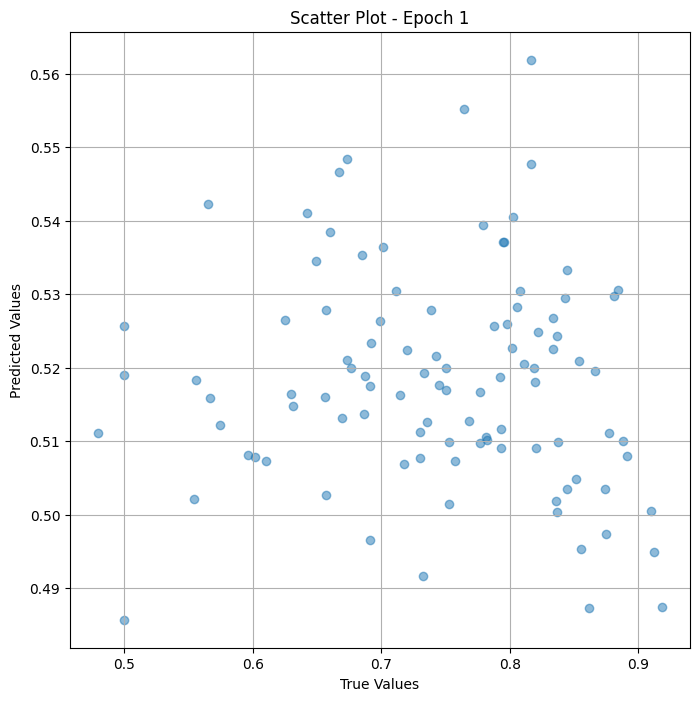

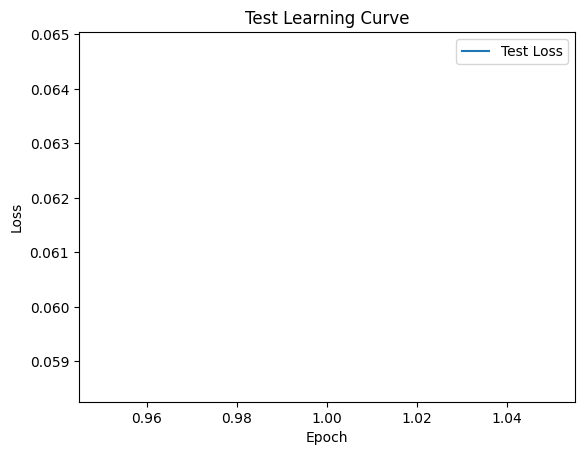


 Epoch: (2/50) Loss = 0.05877885967493057

 Epoch: (2/50) Loss_rmse = 0.2424435168504715

 Epoch: (2/50) R^2 = -1.2445042133331299

 Epoch: (2/50) MAE = 0.20212151110172272
Spearman correlation coefficient: SignificanceResult(statistic=-0.12491606477831434, pvalue=0.22526520219980908)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.8333333, 0

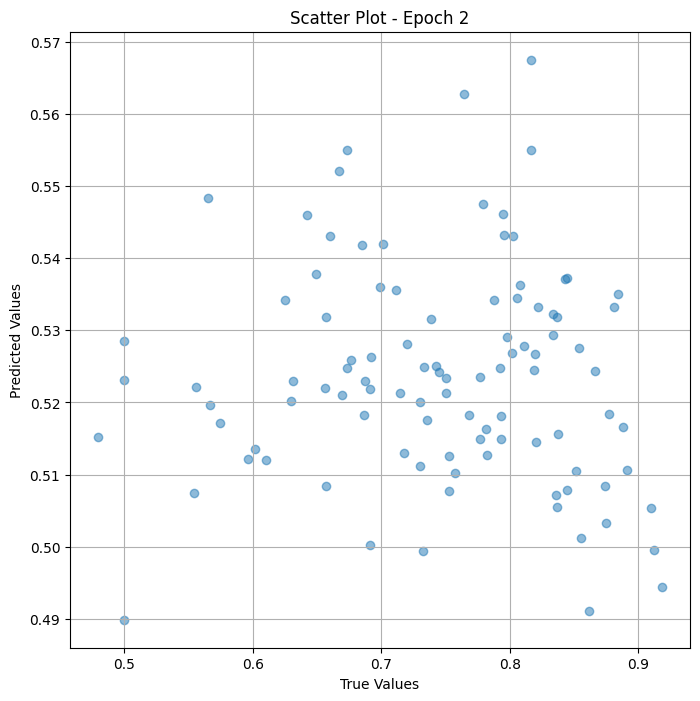

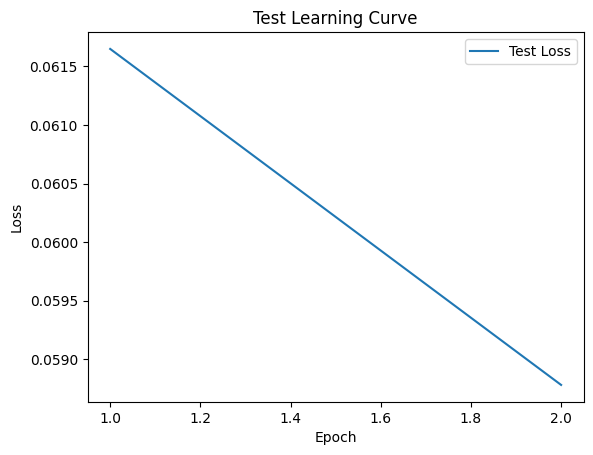


 Epoch: (3/50) Loss = 0.0560968741774559

 Epoch: (3/50) Loss_rmse = 0.23684778809547424

 Epoch: (3/50) R^2 = -1.1420910358428955

 Epoch: (3/50) MAE = 0.19740571081638336
Spearman correlation coefficient: SignificanceResult(statistic=-0.11921185614072066, pvalue=0.24732831615424813)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.8333333, 0

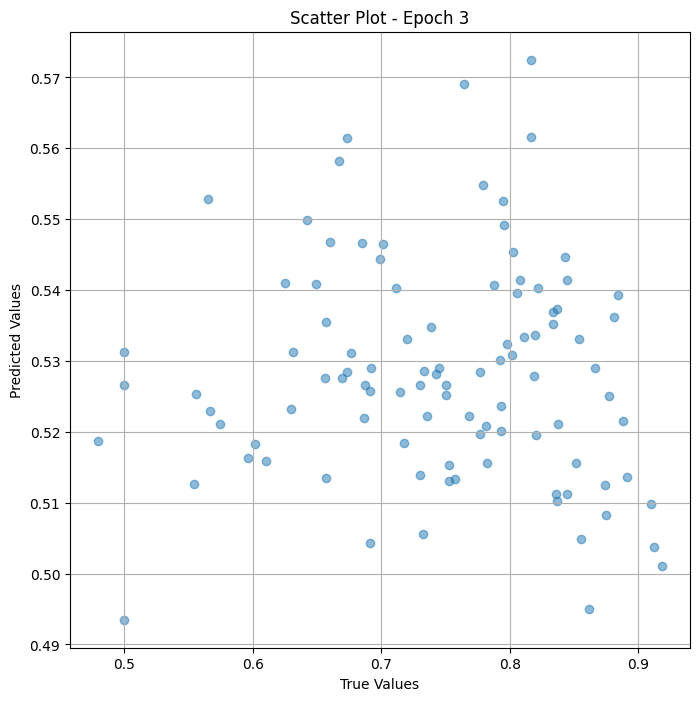

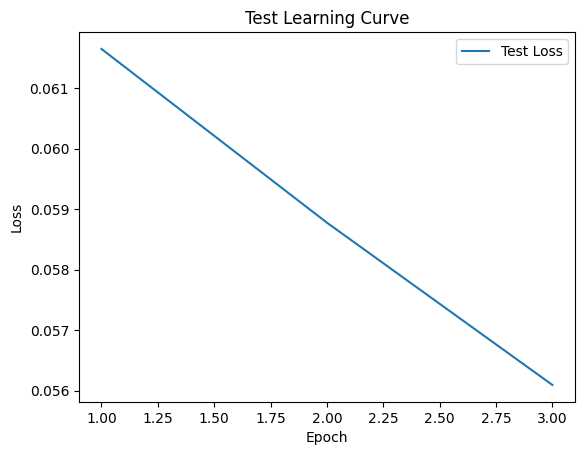


 Epoch: (4/50) Loss = 0.05354823172092438

 Epoch: (4/50) Loss_rmse = 0.23140491545200348

 Epoch: (4/50) R^2 = -1.0447697639465332

 Epoch: (4/50) MAE = 0.19285039603710175
Spearman correlation coefficient: SignificanceResult(statistic=-0.11373147495264022, pvalue=0.2698867221118261)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.8333333, 0

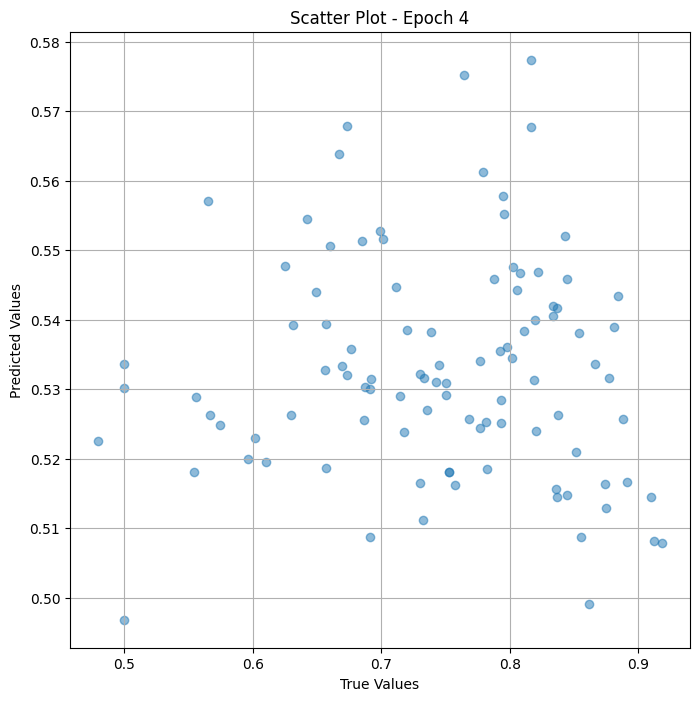

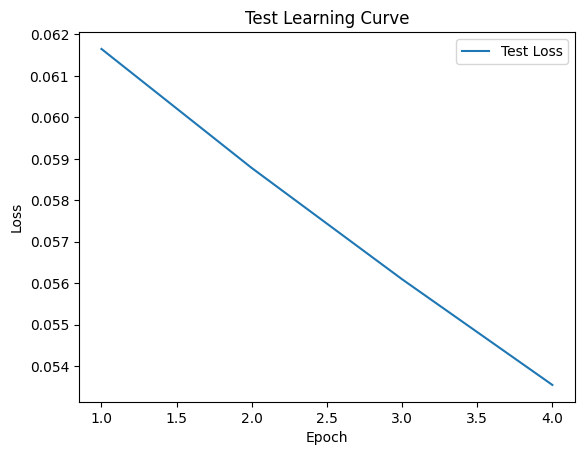


 Epoch: (5/50) Loss = 0.050976723432540894

 Epoch: (5/50) Loss_rmse = 0.22578024864196777

 Epoch: (5/50) R^2 = -0.9465751647949219

 Epoch: (5/50) MAE = 0.18818381428718567
Spearman correlation coefficient: SignificanceResult(statistic=-0.10325906337541714, pvalue=0.31675227566199093)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.8333333,

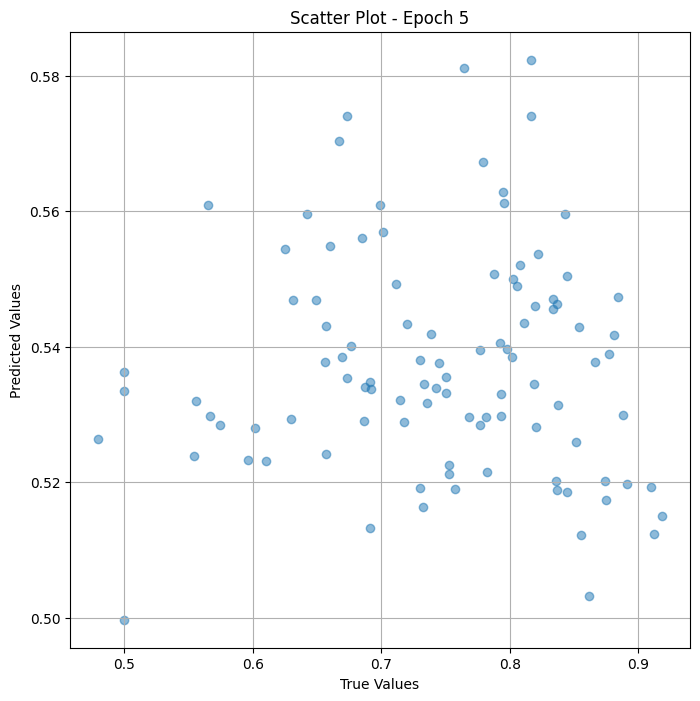

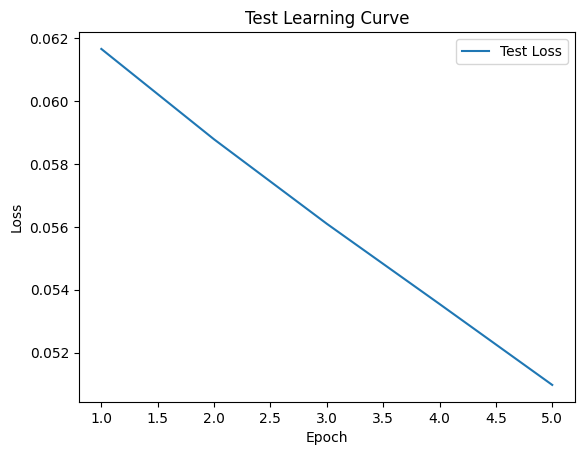


 Epoch: (6/50) Loss = 0.048401571810245514

 Epoch: (6/50) Loss_rmse = 0.22000357508659363

 Epoch: (6/50) R^2 = -0.8482415676116943

 Epoch: (6/50) MAE = 0.18341483175754547
Spearman correlation coefficient: SignificanceResult(statistic=-0.08961237160509797, pvalue=0.38524907531059427)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.8333333,

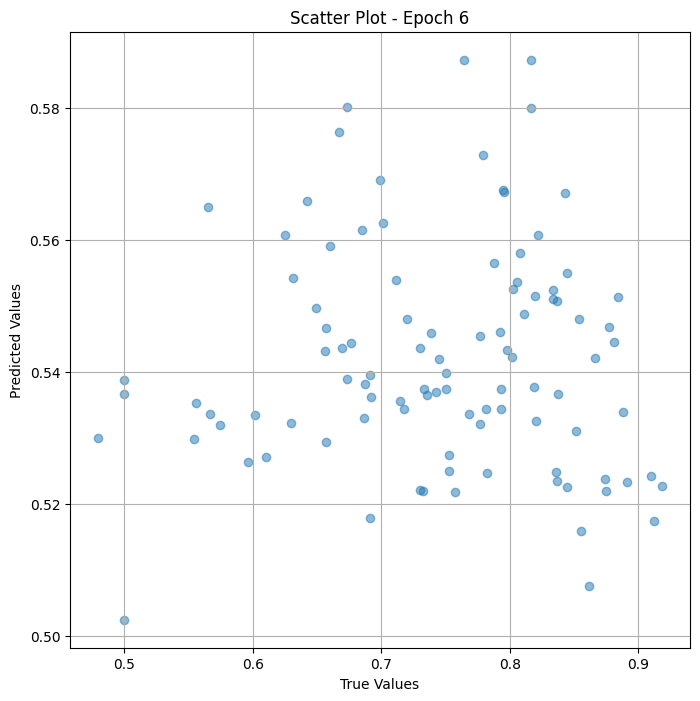

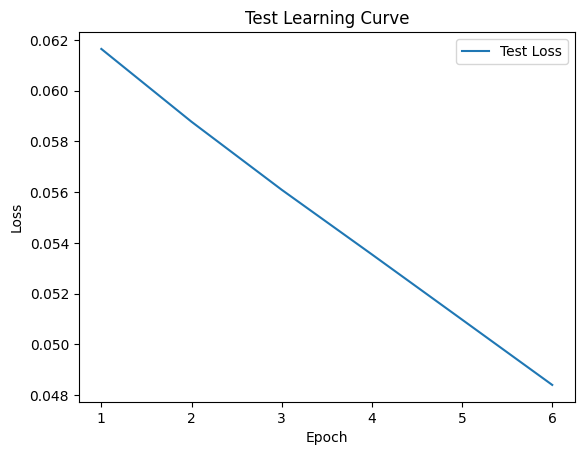


 Epoch: (7/50) Loss = 0.04581891745328903

 Epoch: (7/50) Loss_rmse = 0.21405354142189026

 Epoch: (7/50) R^2 = -0.7496213912963867

 Epoch: (7/50) MAE = 0.17839446663856506
Spearman correlation coefficient: SignificanceResult(statistic=-0.0765761183334511, pvalue=0.4583593916219104)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.8333333, 0.

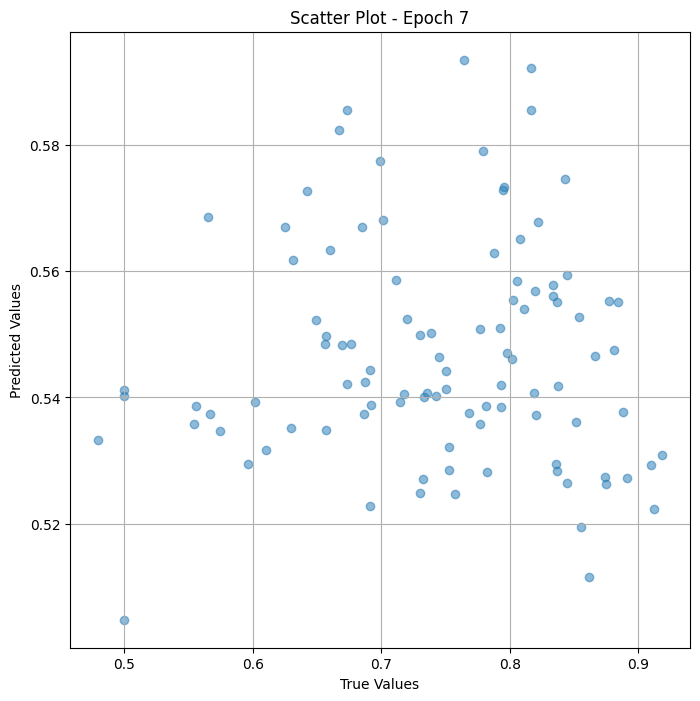

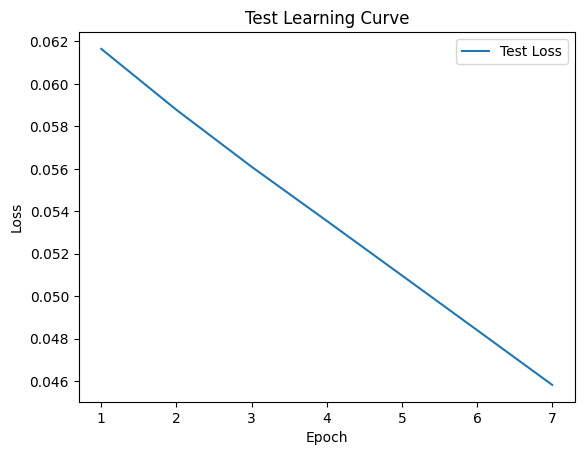


 Epoch: (8/50) Loss = 0.043296173214912415

 Epoch: (8/50) Loss_rmse = 0.2080773264169693

 Epoch: (8/50) R^2 = -0.6532889604568481

 Epoch: (8/50) MAE = 0.17334917187690735
Spearman correlation coefficient: SignificanceResult(statistic=-0.07222165704292181, pvalue=0.4843837953057283)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.8333333, 0

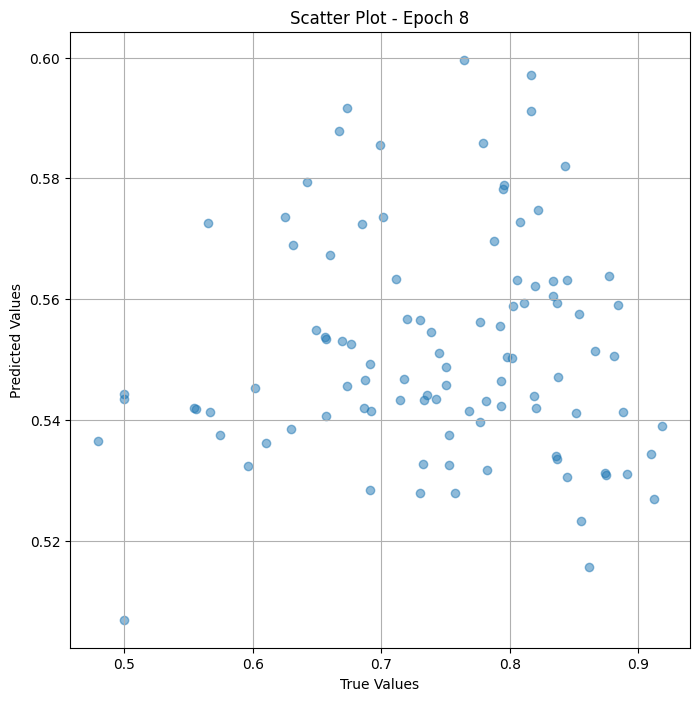

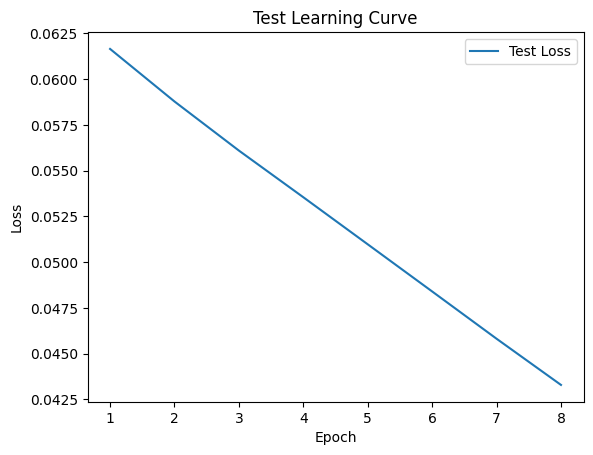


 Epoch: (9/50) Loss = 0.040803536772727966

 Epoch: (9/50) Loss_rmse = 0.20199885964393616

 Epoch: (9/50) R^2 = -0.5581061840057373

 Epoch: (9/50) MAE = 0.16851738095283508
Spearman correlation coefficient: SignificanceResult(statistic=-0.052579102685643295, pvalue=0.6109123346506529)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.8333333,

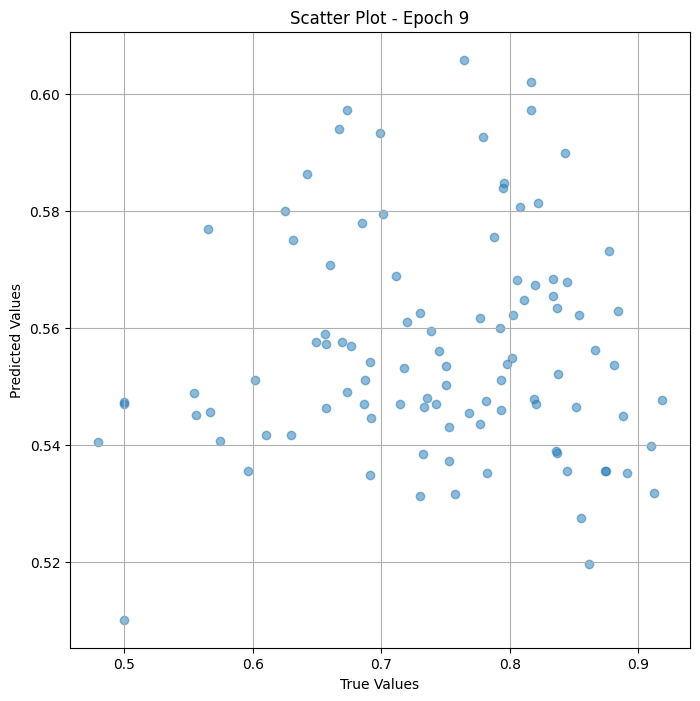

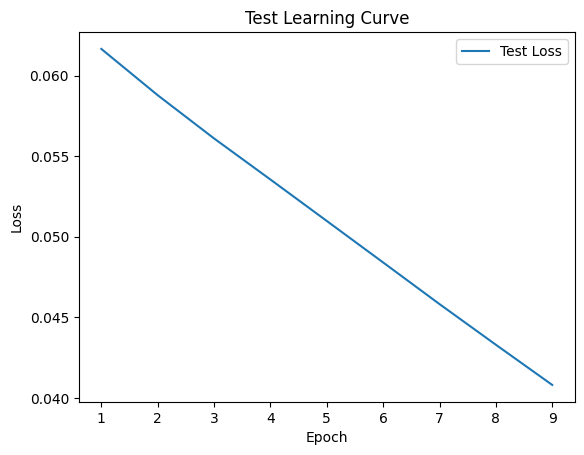


 Epoch: (10/50) Loss = 0.03831468150019646

 Epoch: (10/50) Loss_rmse = 0.19574137032032013

 Epoch: (10/50) R^2 = -0.463067889213562

 Epoch: (10/50) MAE = 0.16349636018276215
Spearman correlation coefficient: SignificanceResult(statistic=-0.04792620479576311, pvalue=0.6428667520935702)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.8333333

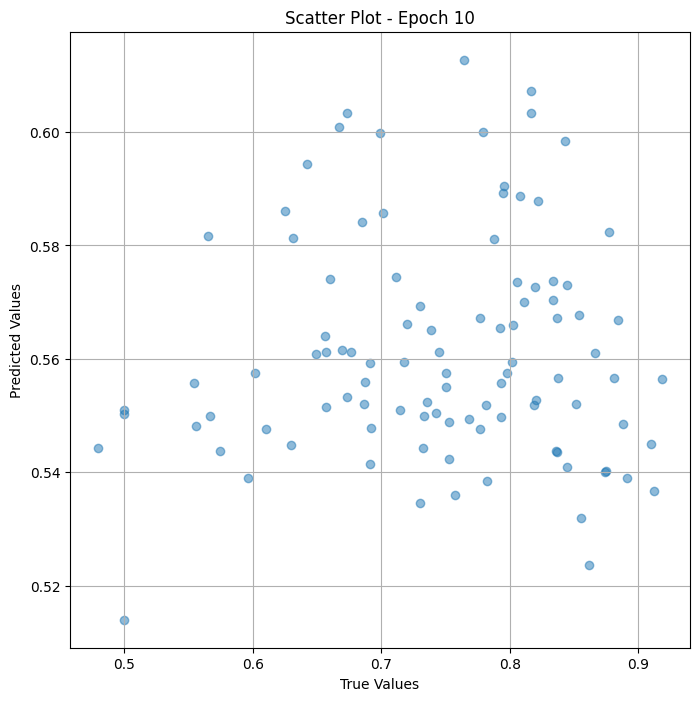

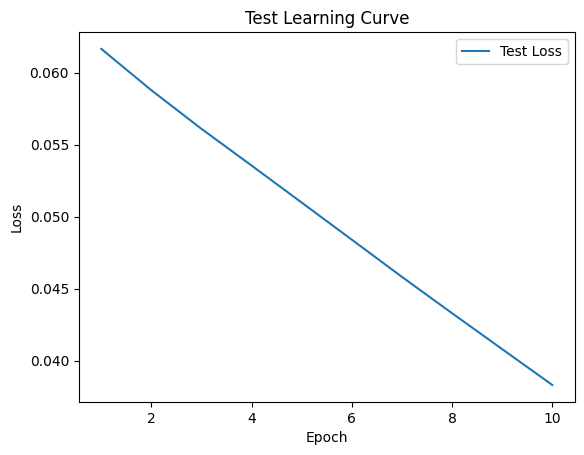


 Epoch: (11/50) Loss = 0.035933610051870346

 Epoch: (11/50) Loss_rmse = 0.1895616203546524

 Epoch: (11/50) R^2 = -0.37214529514312744

 Epoch: (11/50) MAE = 0.1584187000989914
Spearman correlation coefficient: SignificanceResult(statistic=-0.036375351870885586, pvalue=0.7249492843901717)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.83333

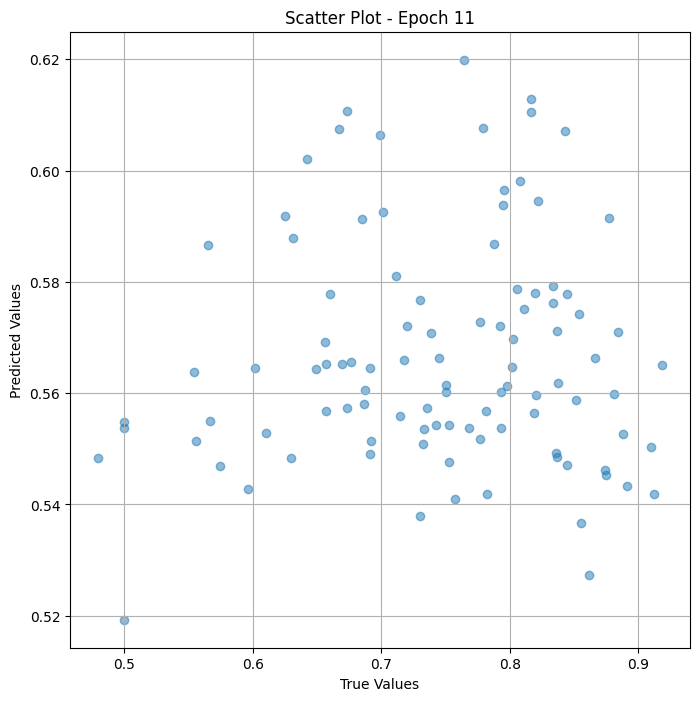

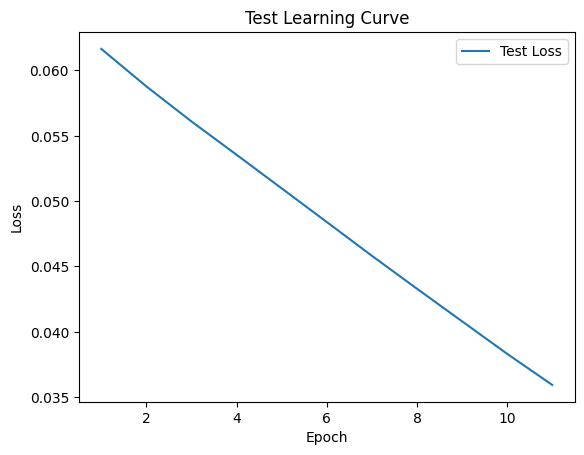


 Epoch: (12/50) Loss = 0.03328685462474823

 Epoch: (12/50) Loss_rmse = 0.18244685232639313

 Epoch: (12/50) R^2 = -0.2710775136947632

 Epoch: (12/50) MAE = 0.15236669778823853
Spearman correlation coefficient: SignificanceResult(statistic=-0.029552005985725993, pvalue=0.7750168964711464)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.83333

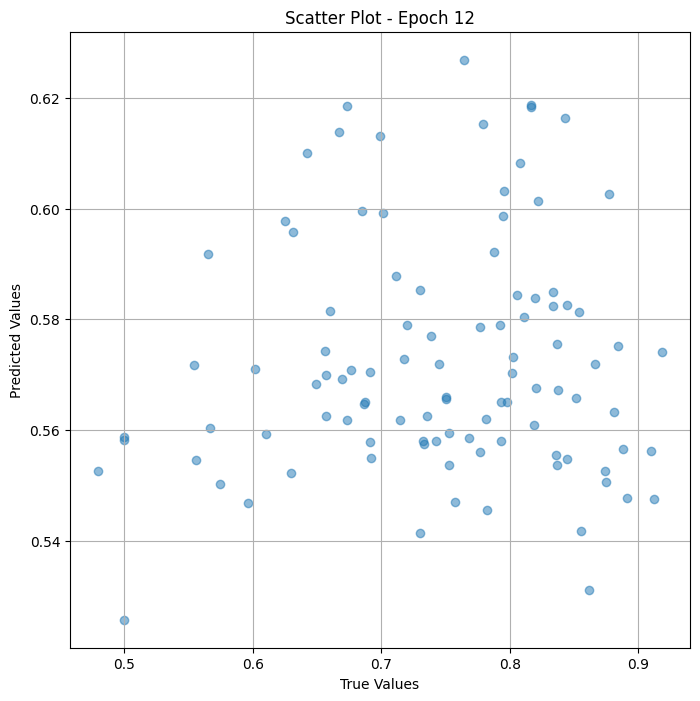

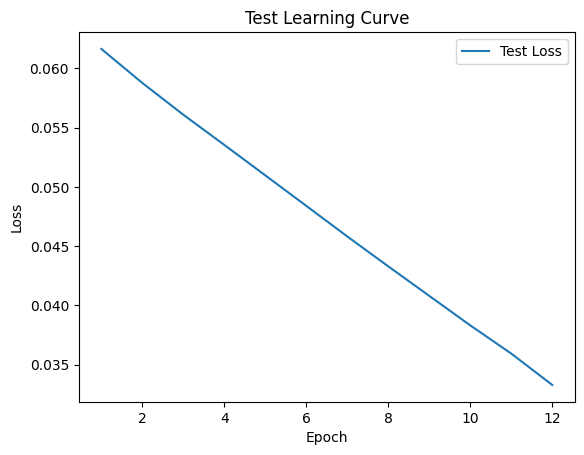


 Epoch: (13/50) Loss = 0.030661944299936295

 Epoch: (13/50) Loss_rmse = 0.1751055270433426

 Epoch: (13/50) R^2 = -0.1708437204360962

 Epoch: (13/50) MAE = 0.14584064483642578
Spearman correlation coefficient: SignificanceResult(statistic=-0.022437006151200724, pvalue=0.828220493071956)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.833333

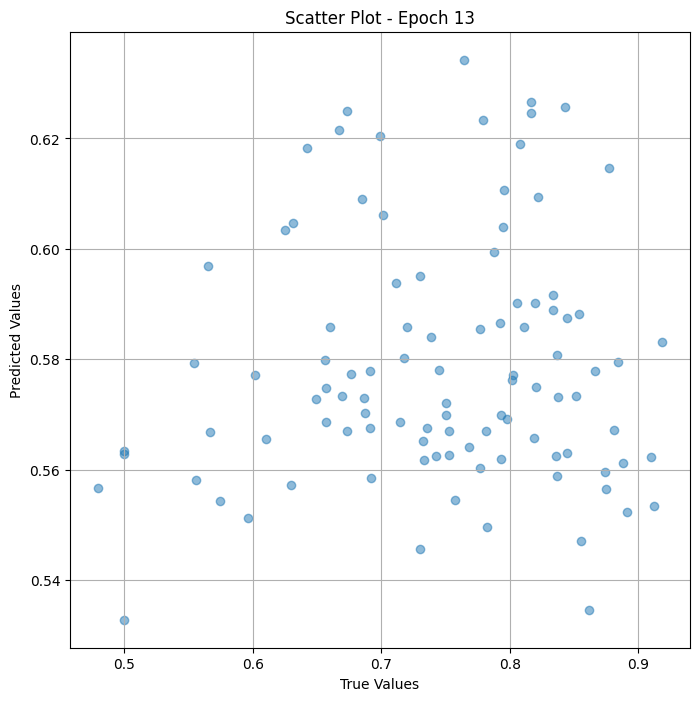

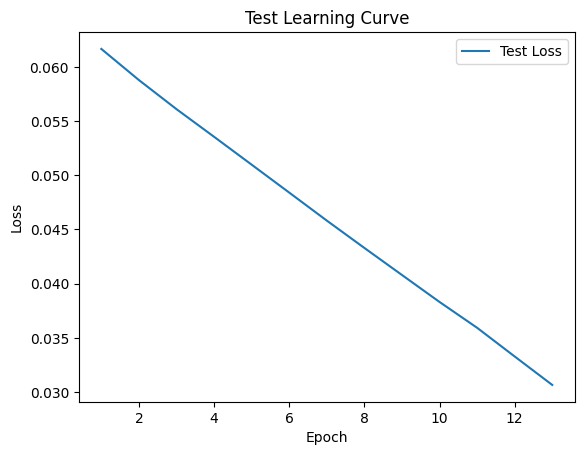


 Epoch: (14/50) Loss = 0.02823864482343197

 Epoch: (14/50) Loss_rmse = 0.1680435836315155

 Epoch: (14/50) R^2 = -0.07830870151519775

 Epoch: (14/50) MAE = 0.1393948644399643
Spearman correlation coefficient: SignificanceResult(statistic=-0.027835995539458216, pvalue=0.787763930787299)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.8333333

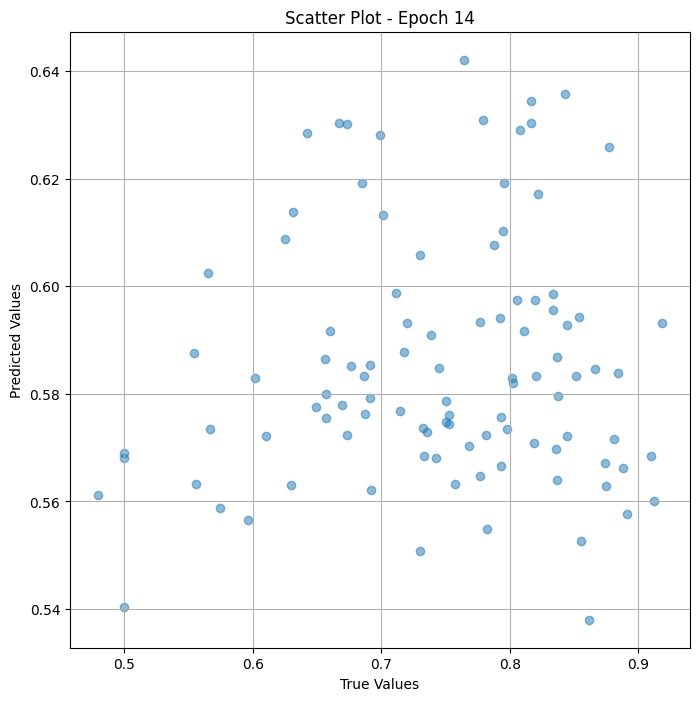

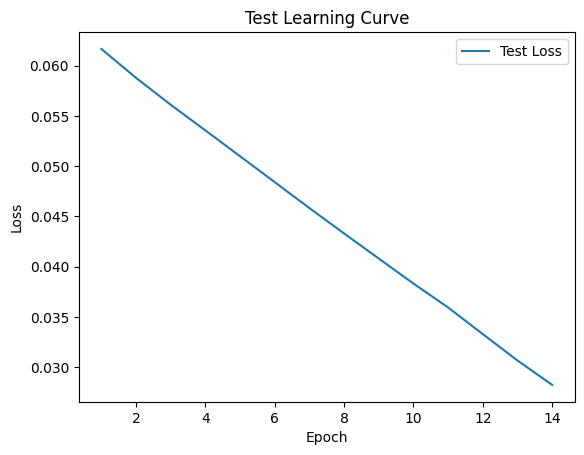


 Epoch: (15/50) Loss = 0.025787636637687683

 Epoch: (15/50) Loss_rmse = 0.16058529913425446

 Epoch: (15/50) R^2 = 0.015284419059753418

 Epoch: (15/50) MAE = 0.13267004489898682
Spearman correlation coefficient: SignificanceResult(statistic=-0.024553192946598135, pvalue=0.8123033602974036)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.833

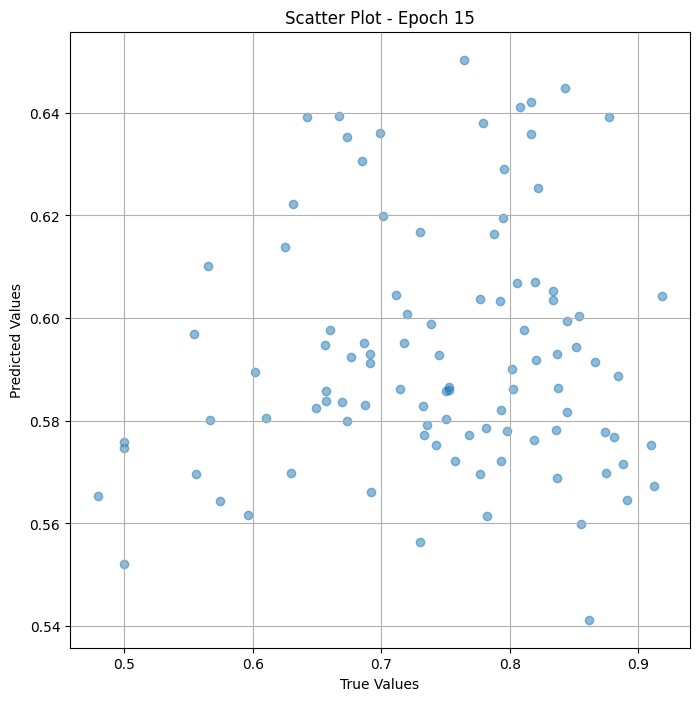

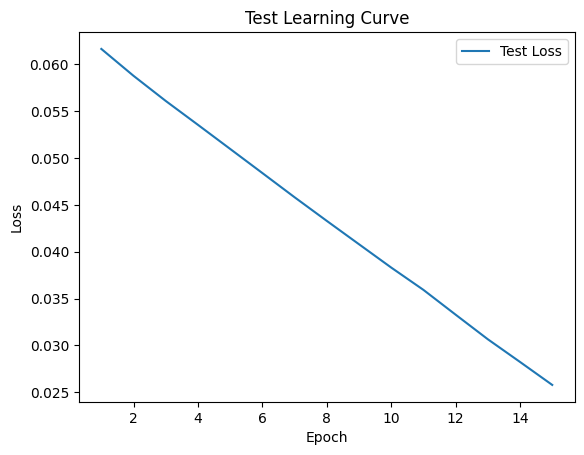


 Epoch: (16/50) Loss = 0.023532763123512268

 Epoch: (16/50) Loss_rmse = 0.15340392291545868

 Epoch: (16/50) R^2 = 0.10138809680938721

 Epoch: (16/50) MAE = 0.12605078518390656
Spearman correlation coefficient: SignificanceResult(statistic=-0.03726387901895308, pvalue=0.7185088241729951)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.83333

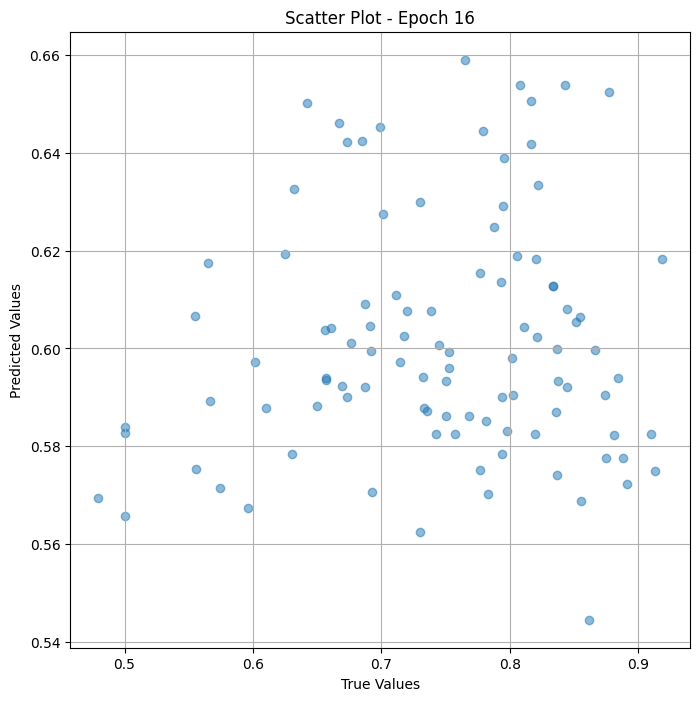

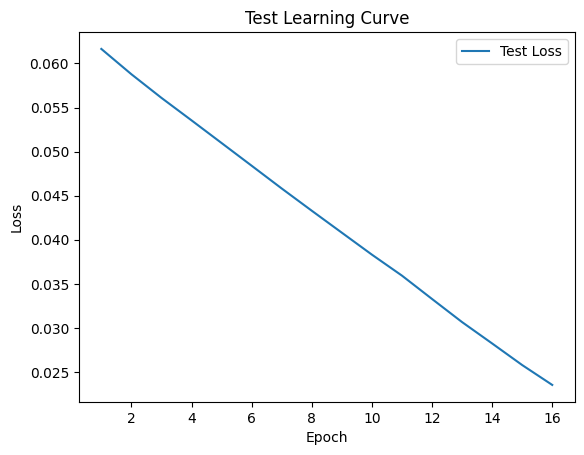


 Epoch: (17/50) Loss = 0.021358679980039597

 Epoch: (17/50) Loss_rmse = 0.14614608883857727

 Epoch: (17/50) R^2 = 0.18440669775009155

 Epoch: (17/50) MAE = 0.1244441568851471
Spearman correlation coefficient: SignificanceResult(statistic=-0.03786753486764017, pvalue=0.7141444097426766)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.833333

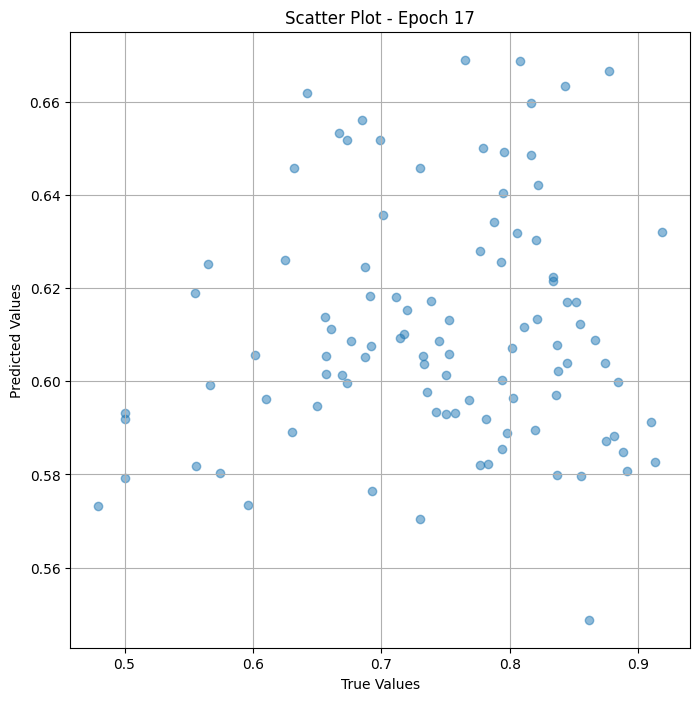

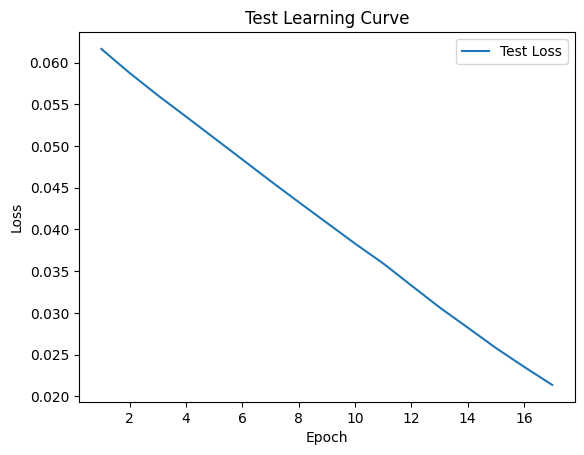


 Epoch: (18/50) Loss = 0.019123701378703117

 Epoch: (18/50) Loss_rmse = 0.1382884681224823

 Epoch: (18/50) R^2 = 0.26975059509277344

 Epoch: (18/50) MAE = 0.12208487093448639
Spearman correlation coefficient: SignificanceResult(statistic=-0.04384983215462899, pvalue=0.6714090619624213)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.833333

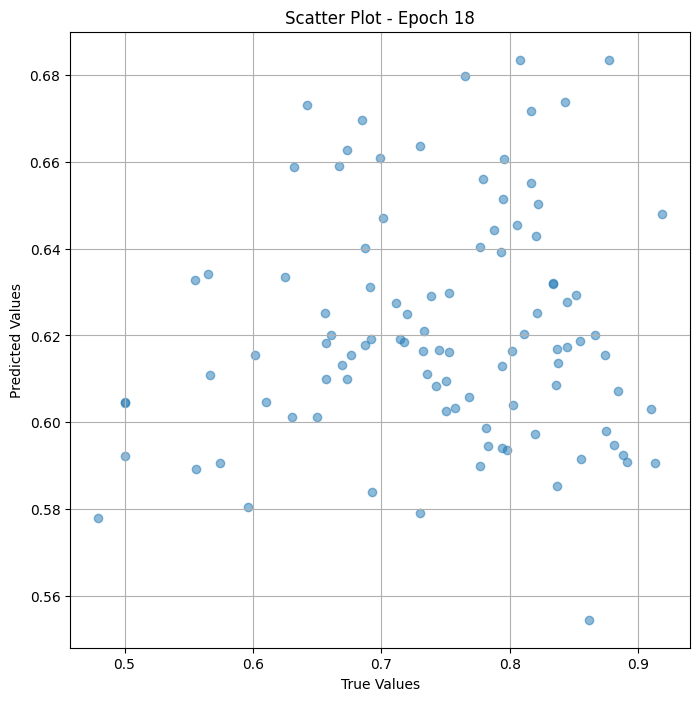

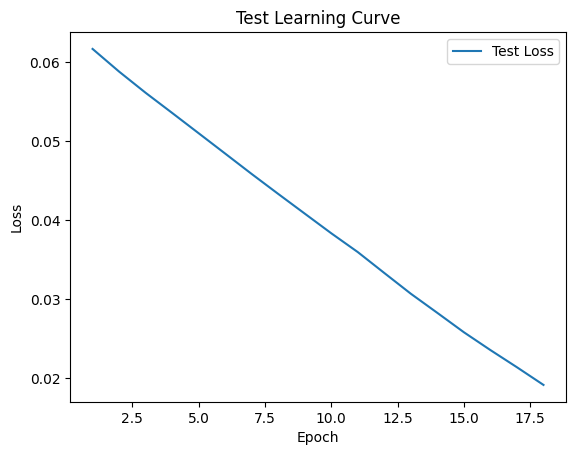


 Epoch: (19/50) Loss = 0.017235320061445236

 Epoch: (19/50) Loss_rmse = 0.13128335773944855

 Epoch: (19/50) R^2 = 0.34185951948165894

 Epoch: (19/50) MAE = 0.12014243006706238
Spearman correlation coefficient: SignificanceResult(statistic=-0.039549632063981696, pvalue=0.7020317341651907)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.8333

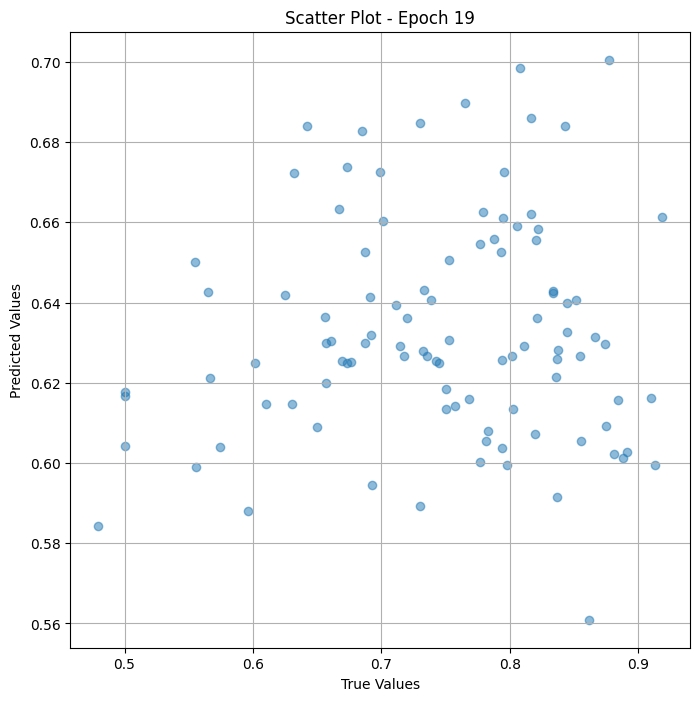

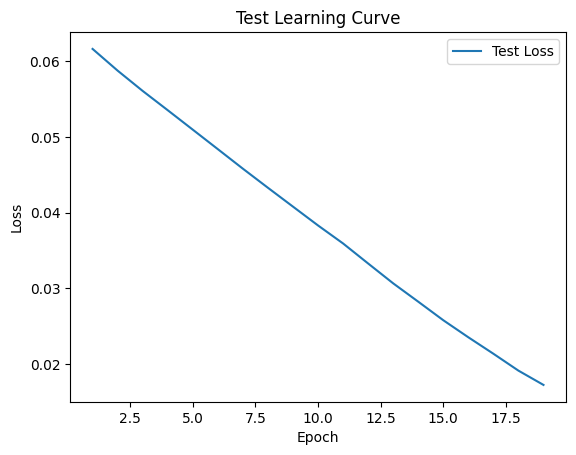


 Epoch: (20/50) Loss = 0.015664413571357727

 Epoch: (20/50) Loss_rmse = 0.12515754997730255

 Epoch: (20/50) R^2 = 0.40184545516967773

 Epoch: (20/50) MAE = 0.11734621226787567
Spearman correlation coefficient: SignificanceResult(statistic=-0.038410146866460014, pvalue=0.7102291730632926)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.8333

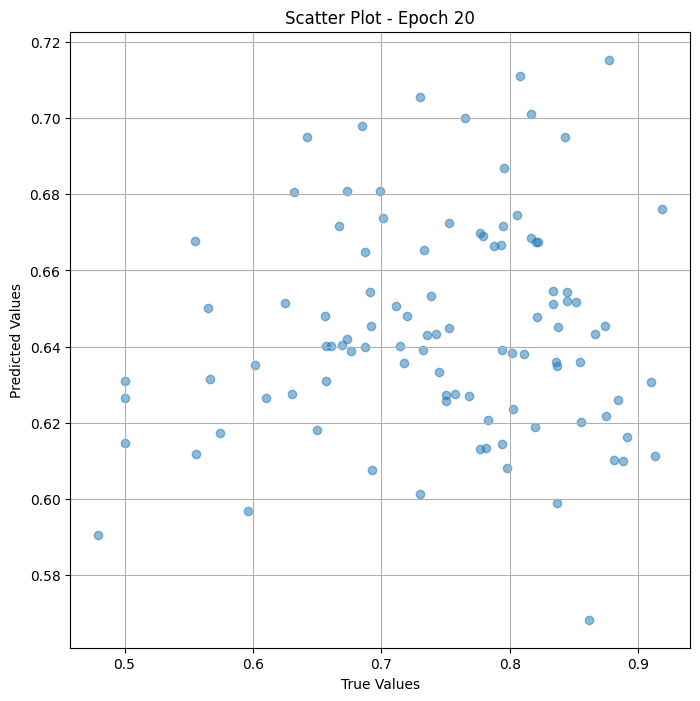

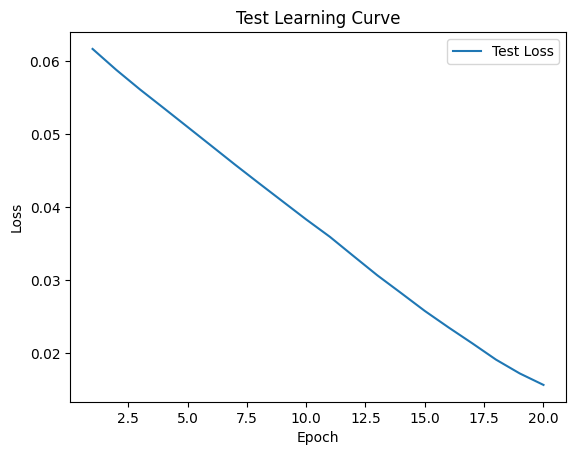


 Epoch: (21/50) Loss = 0.014295152388513088

 Epoch: (21/50) Loss_rmse = 0.11956233531236649

 Epoch: (21/50) R^2 = 0.45413148403167725

 Epoch: (21/50) MAE = 0.11390621960163116
Spearman correlation coefficient: SignificanceResult(statistic=-0.019567945207440783, pvalue=0.849910588390576)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.83333

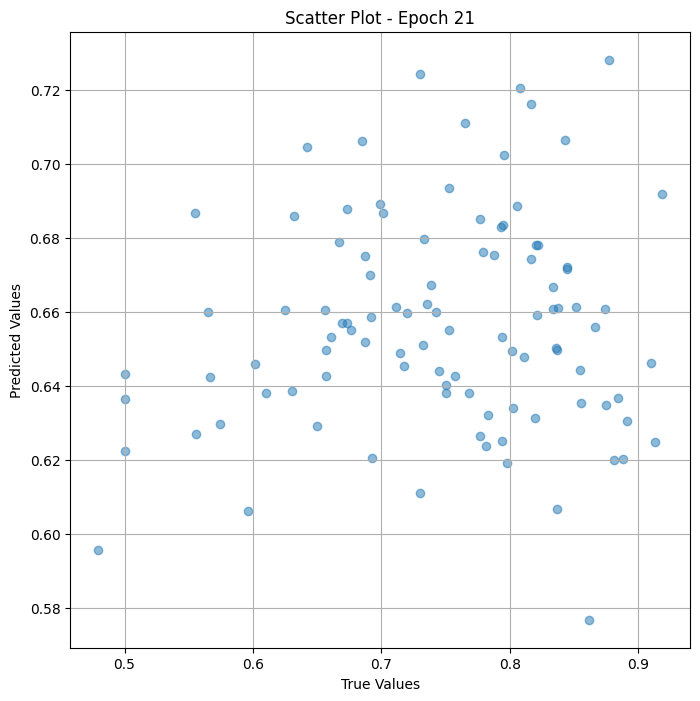

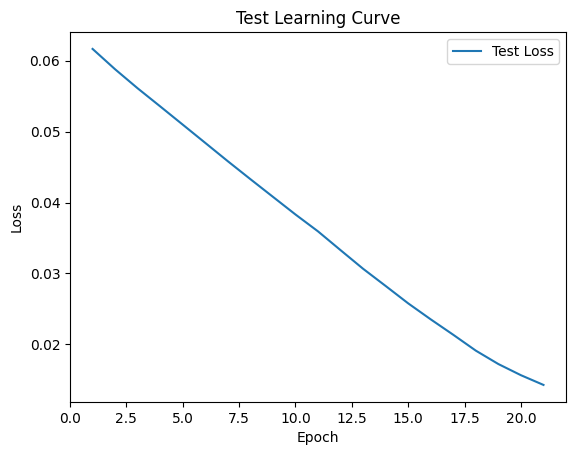


 Epoch: (22/50) Loss = 0.013047708198428154

 Epoch: (22/50) Loss_rmse = 0.1142265647649765

 Epoch: (22/50) R^2 = 0.5017658472061157

 Epoch: (22/50) MAE = 0.11024755239486694
Spearman correlation coefficient: SignificanceResult(statistic=-0.002936887443612429, pvalue=0.9773442293569881)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.833333

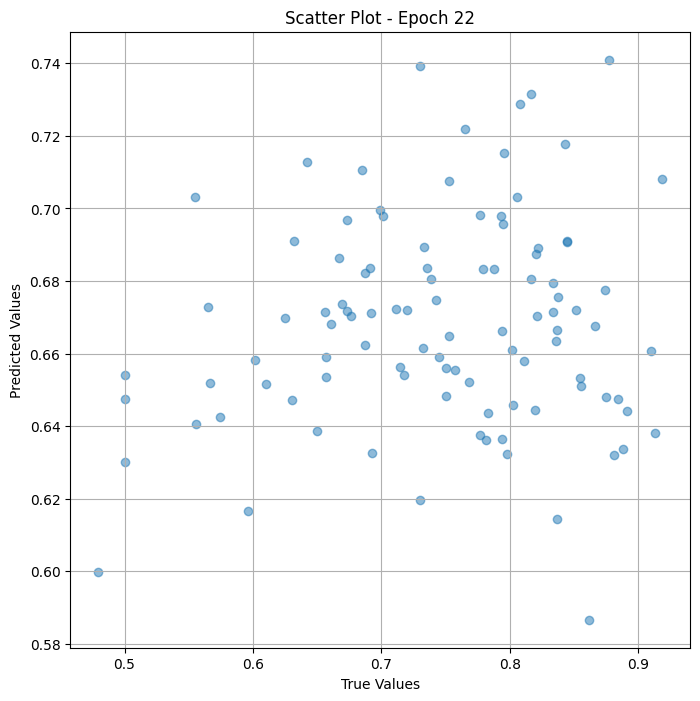

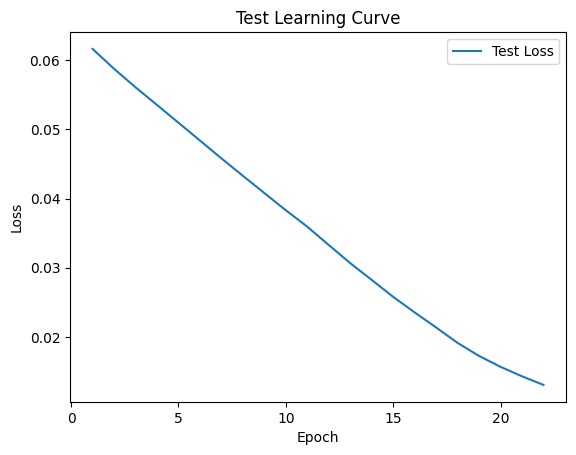


 Epoch: (23/50) Loss = 0.011791505850851536

 Epoch: (23/50) Loss_rmse = 0.10858870297670364

 Epoch: (23/50) R^2 = 0.5497346520423889

 Epoch: (23/50) MAE = 0.10513260960578918
Spearman correlation coefficient: SignificanceResult(statistic=0.0337979448764913, pvalue=0.7437386952657689)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.8333333,

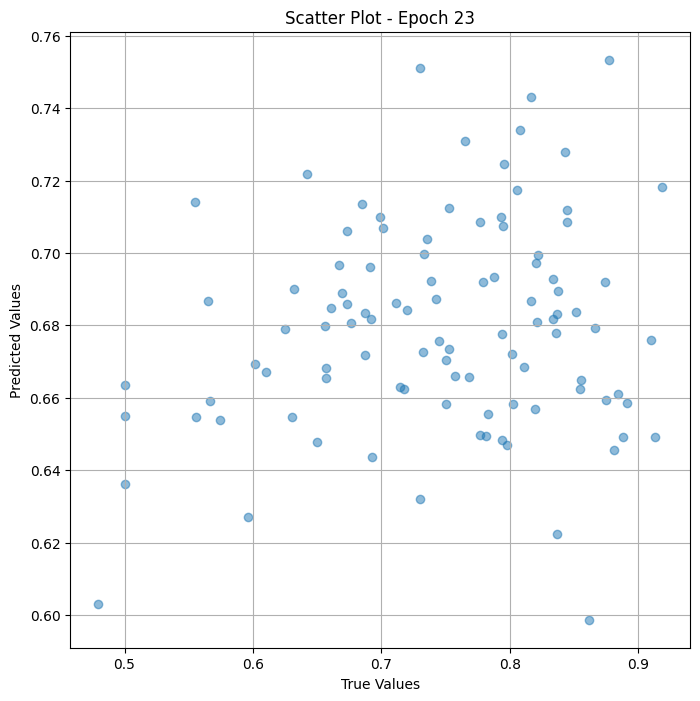

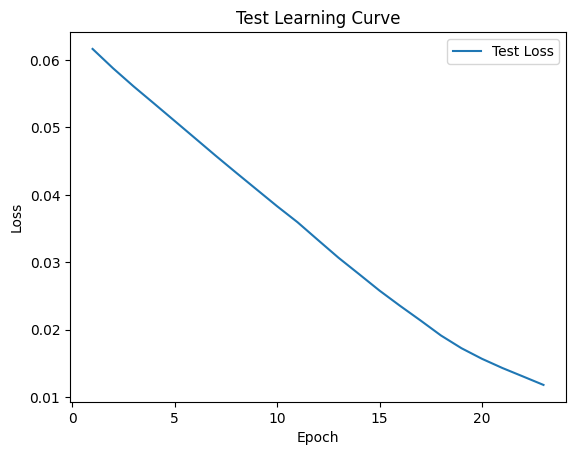


 Epoch: (24/50) Loss = 0.01066041924059391

 Epoch: (24/50) Loss_rmse = 0.10324930399656296

 Epoch: (24/50) R^2 = 0.5929258465766907

 Epoch: (24/50) MAE = 0.10011976957321167
Spearman correlation coefficient: SignificanceResult(statistic=0.0745888018877734, pvalue=0.47013978195230477)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.8333333,

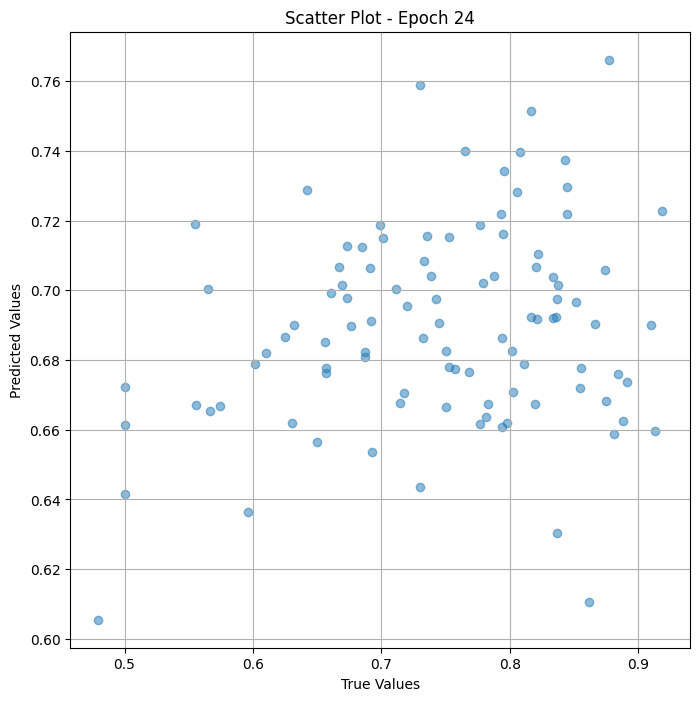

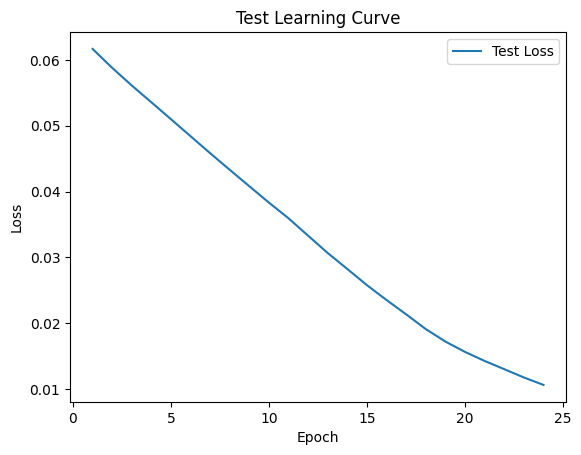


 Epoch: (25/50) Loss = 0.00956566073000431

 Epoch: (25/50) Loss_rmse = 0.09780419617891312

 Epoch: (25/50) R^2 = 0.63472980260849

 Epoch: (25/50) MAE = 0.09491512179374695
Spearman correlation coefficient: SignificanceResult(statistic=0.12994879106736842, pvalue=0.20698023097620902)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.8333333, 

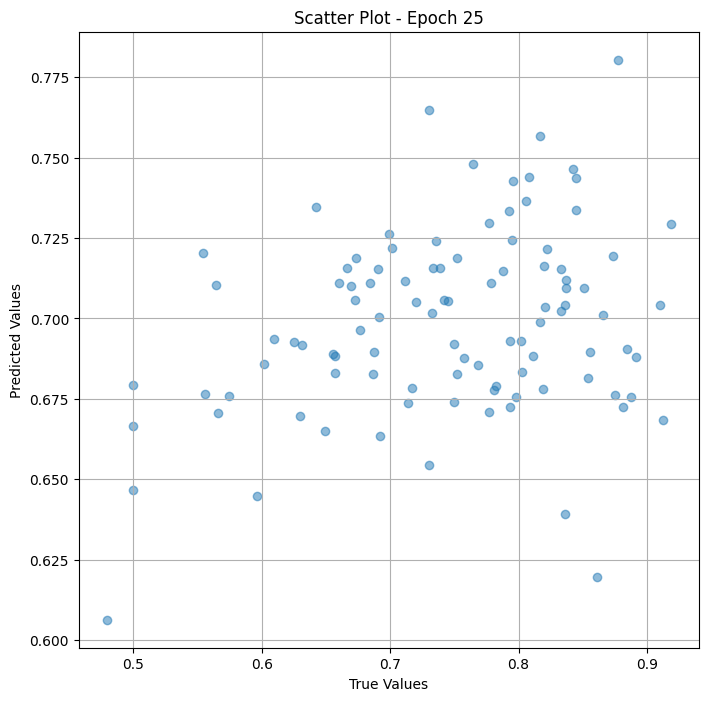

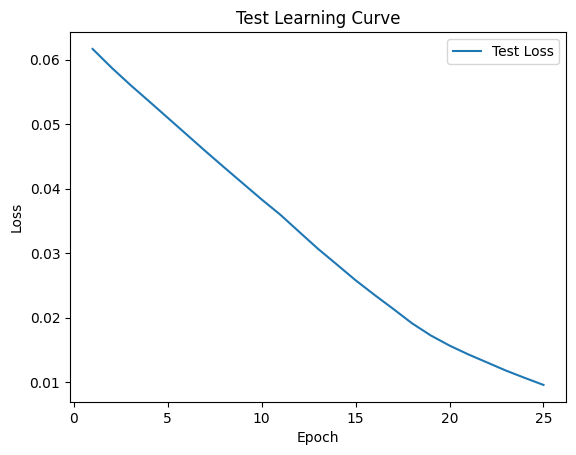


 Epoch: (26/50) Loss = 0.00859769806265831

 Epoch: (26/50) Loss_rmse = 0.0927237719297409

 Epoch: (26/50) R^2 = 0.6716920137405396

 Epoch: (26/50) MAE = 0.08971185982227325
Spearman correlation coefficient: SignificanceResult(statistic=0.21482009033277796, pvalue=0.035568039841013116)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.8333333

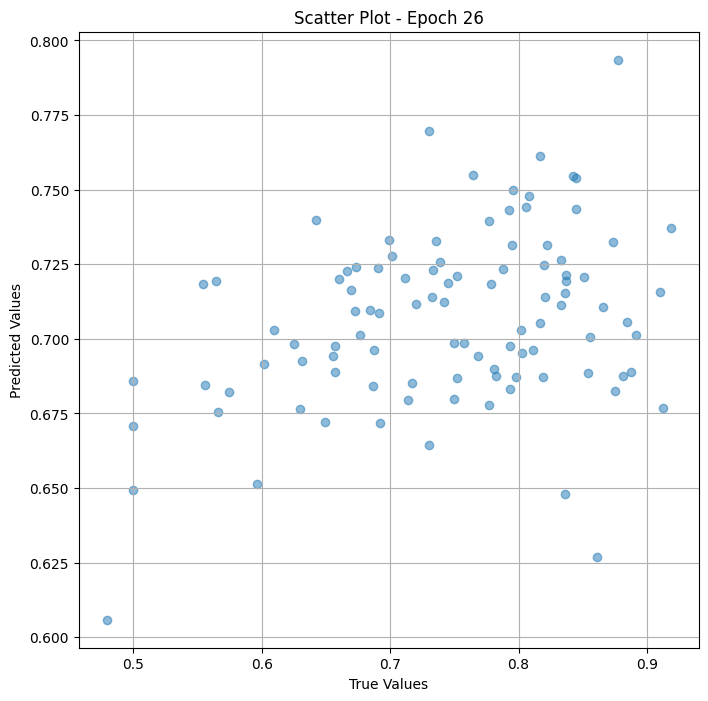

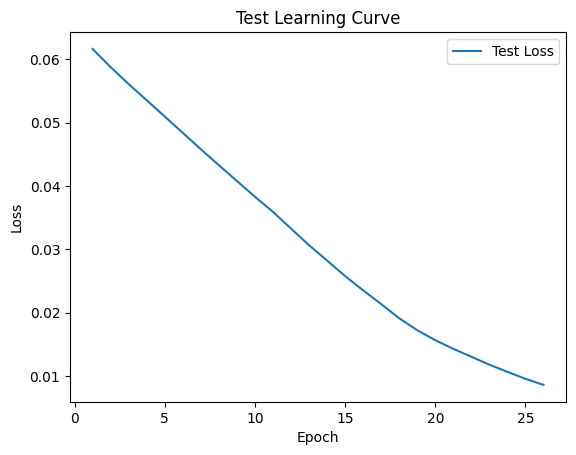


 Epoch: (27/50) Loss = 0.007687330711632967

 Epoch: (27/50) Loss_rmse = 0.08767742663621902

 Epoch: (27/50) R^2 = 0.706454873085022

 Epoch: (27/50) MAE = 0.0843278020620346
Spearman correlation coefficient: SignificanceResult(statistic=0.27131278205990944, pvalue=0.00749884088181824)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.8333333,

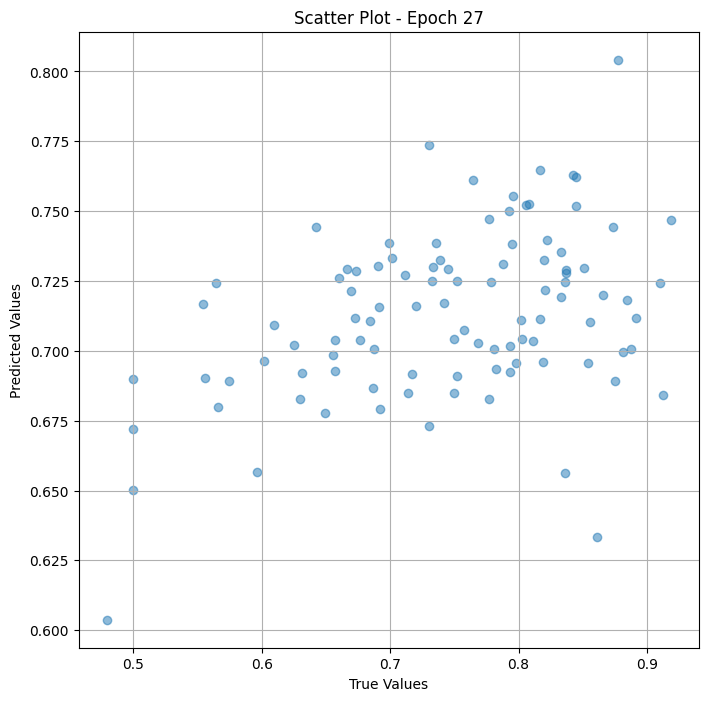

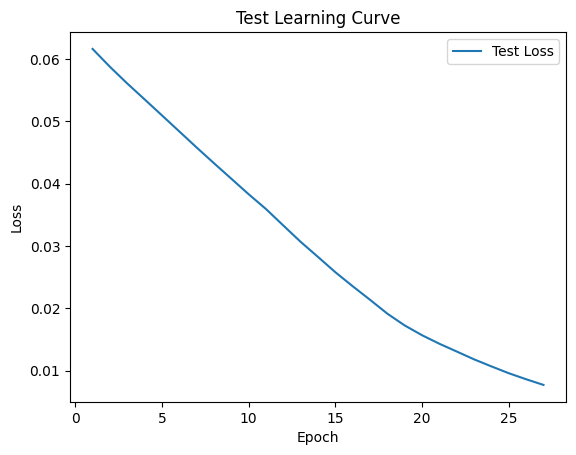


 Epoch: (28/50) Loss = 0.006739869713783264

 Epoch: (28/50) Loss_rmse = 0.08209671080112457

 Epoch: (28/50) R^2 = 0.7426342368125916

 Epoch: (28/50) MAE = 0.07830595970153809
Spearman correlation coefficient: SignificanceResult(statistic=0.3320649779777767, pvalue=0.0009489023190099287)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.83333

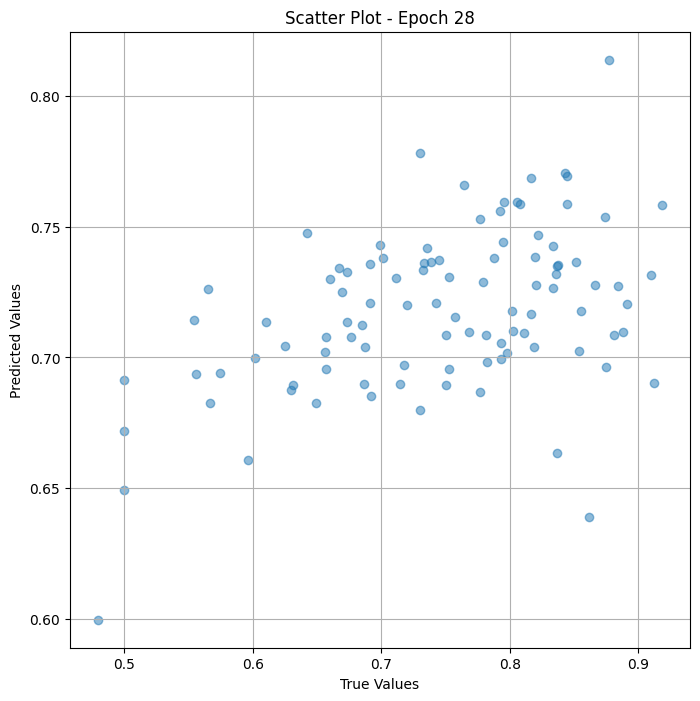

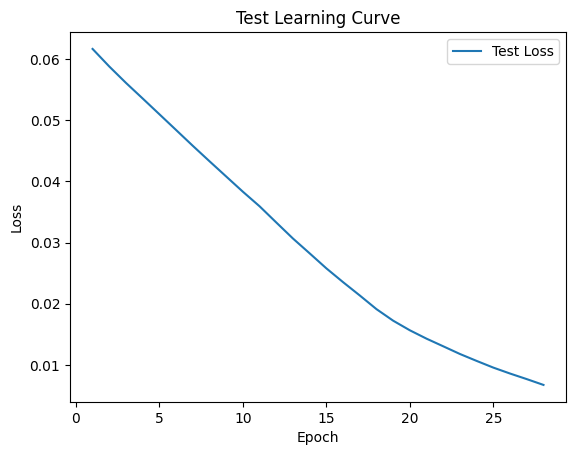


 Epoch: (29/50) Loss = 0.005873143672943115

 Epoch: (29/50) Loss_rmse = 0.07663644105195999

 Epoch: (29/50) R^2 = 0.7757306694984436

 Epoch: (29/50) MAE = 0.07240431010723114
Spearman correlation coefficient: SignificanceResult(statistic=0.37766473382859966, pvalue=0.00014862264931956456)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.833

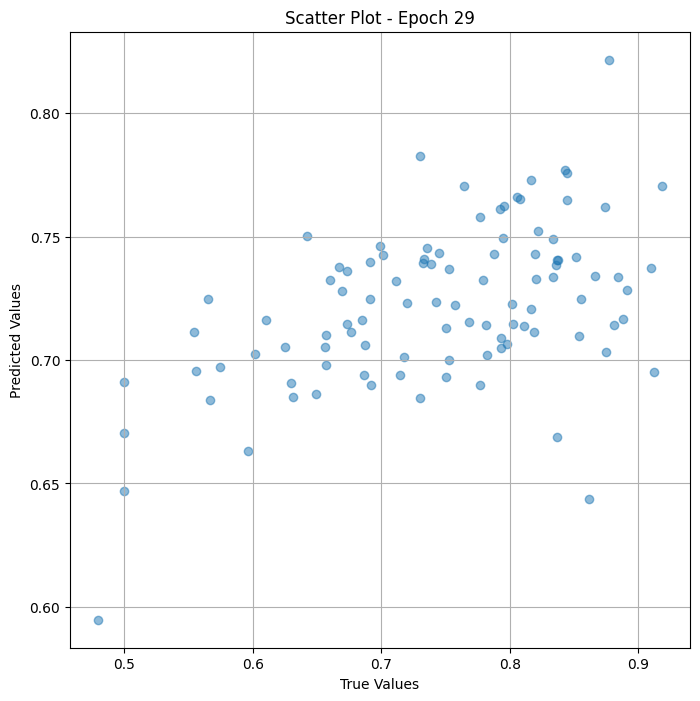

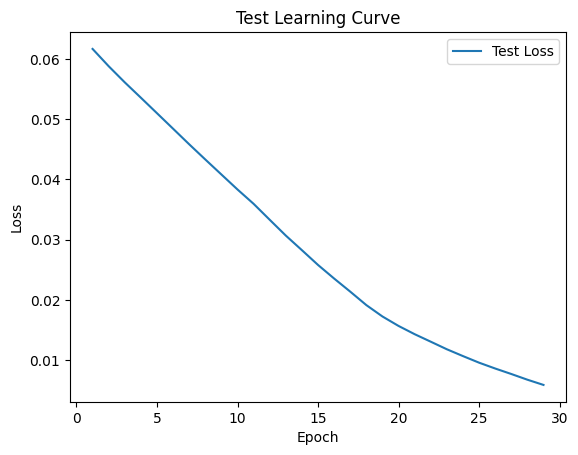


 Epoch: (30/50) Loss = 0.005133420694619417

 Epoch: (30/50) Loss_rmse = 0.07164789736270905

 Epoch: (30/50) R^2 = 0.8039774298667908

 Epoch: (30/50) MAE = 0.06698894500732422
Spearman correlation coefficient: SignificanceResult(statistic=0.42469562882630996, pvalue=1.613168659808864e-05)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.8333

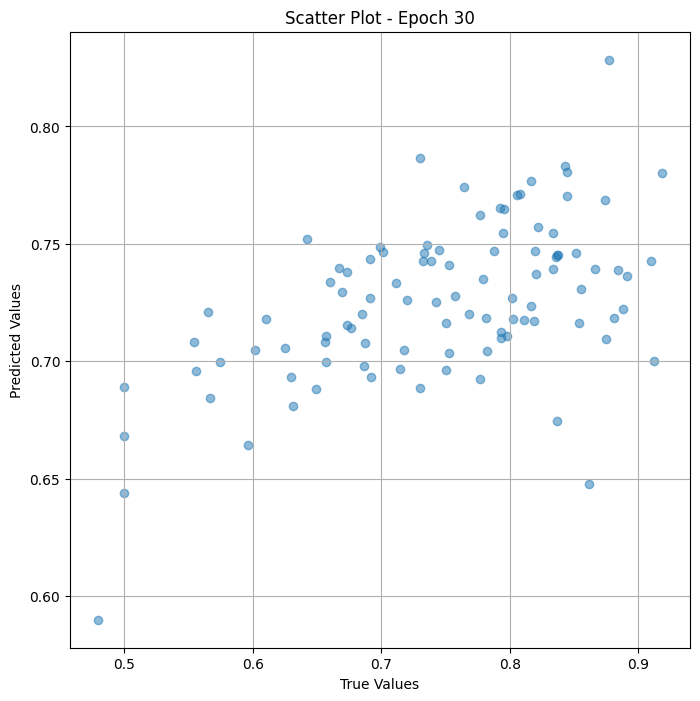

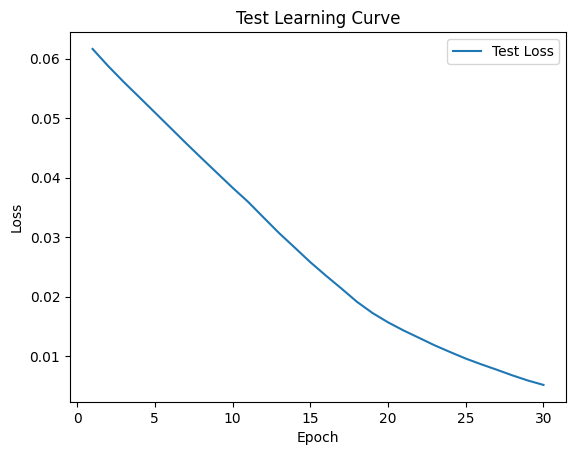


 Epoch: (31/50) Loss = 0.004477588925510645

 Epoch: (31/50) Loss_rmse = 0.06691478937864304

 Epoch: (31/50) R^2 = 0.8290207386016846

 Epoch: (31/50) MAE = 0.061903417110443115
Spearman correlation coefficient: SignificanceResult(statistic=0.46411639054057197, pvalue=1.9089159370349305e-06)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.83

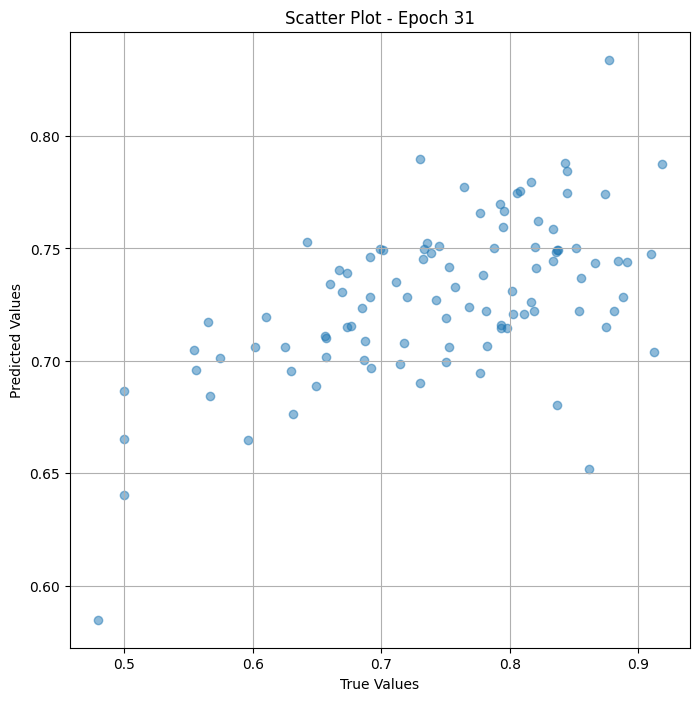

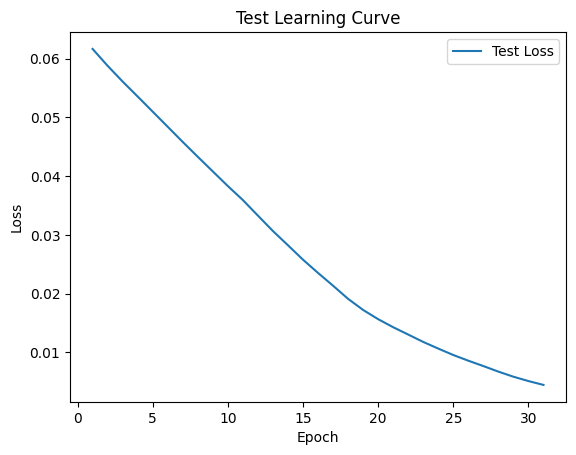


 Epoch: (32/50) Loss = 0.003933492582291365

 Epoch: (32/50) Loss_rmse = 0.06271756440401077

 Epoch: (32/50) R^2 = 0.8497973680496216

 Epoch: (32/50) MAE = 0.057334452867507935
Spearman correlation coefficient: SignificanceResult(statistic=0.5114389394876481, pvalue=1.0092751818652166e-07)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.833

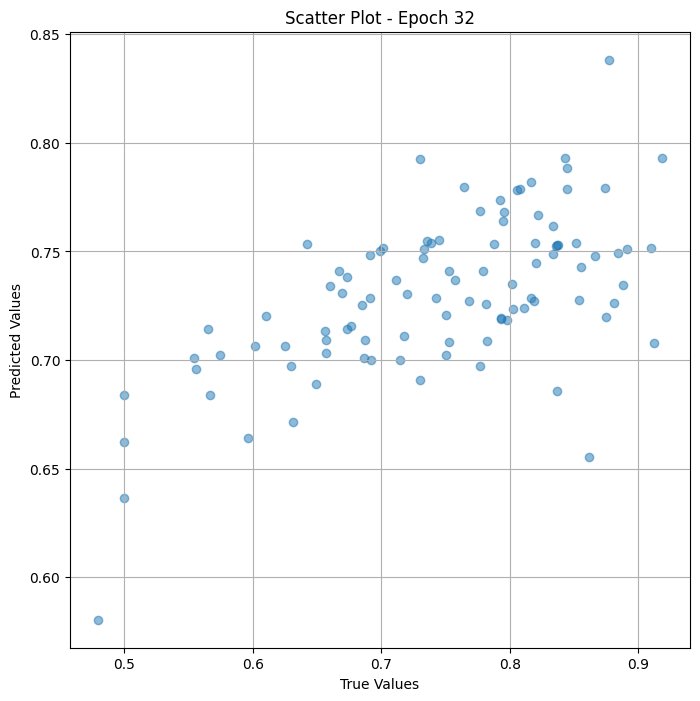

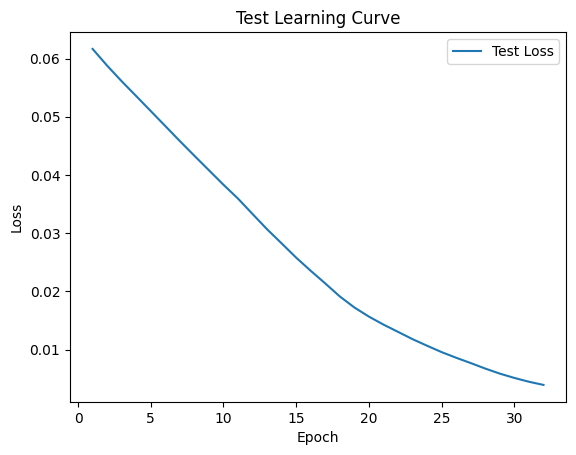


 Epoch: (33/50) Loss = 0.003456702921539545

 Epoch: (33/50) Loss_rmse = 0.05879373103380203

 Epoch: (33/50) R^2 = 0.8680038452148438

 Epoch: (33/50) MAE = 0.053096652030944824
Spearman correlation coefficient: SignificanceResult(statistic=0.5566792148892529, pvalue=3.874063924927125e-09)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.8333

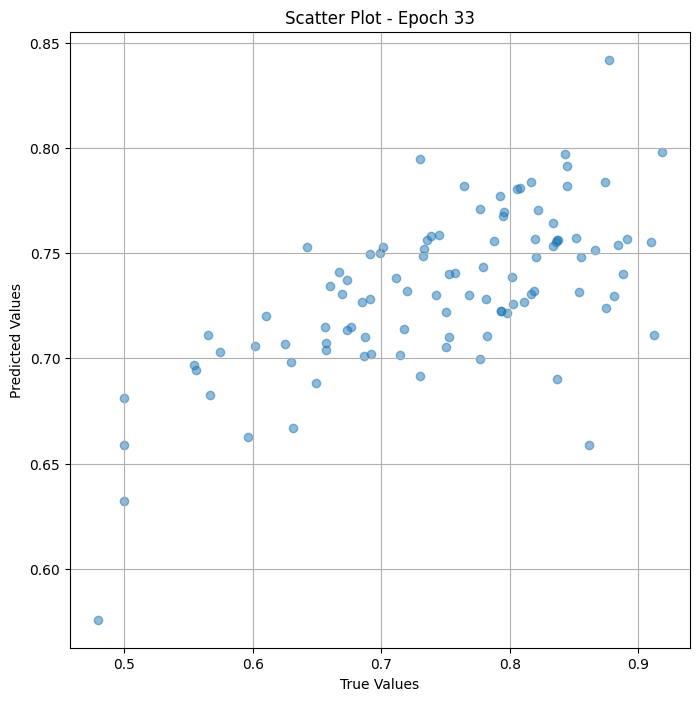

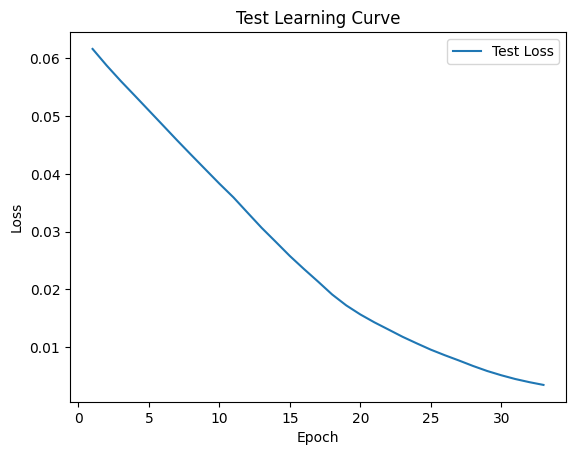


 Epoch: (34/50) Loss = 0.003038064343854785

 Epoch: (34/50) Loss_rmse = 0.05511863902211189

 Epoch: (34/50) R^2 = 0.8839898109436035

 Epoch: (34/50) MAE = 0.04908128082752228
Spearman correlation coefficient: SignificanceResult(statistic=0.5944517926570995, pvalue=1.7096715635213026e-10)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.8333

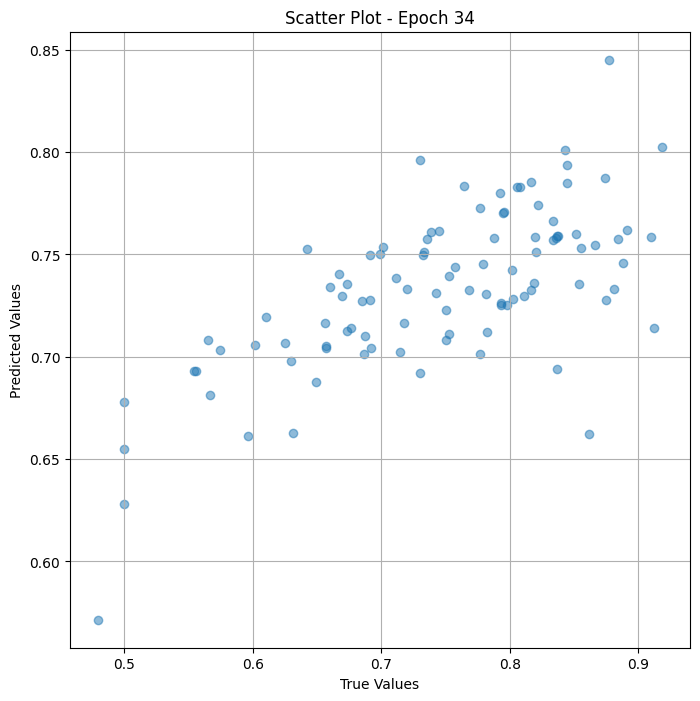

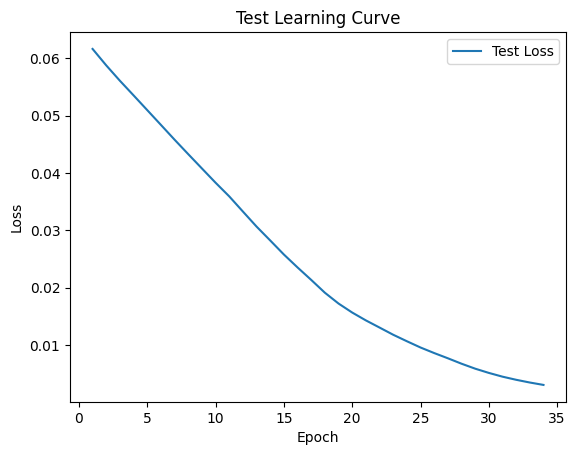


 Epoch: (35/50) Loss = 0.0026699285954236984

 Epoch: (35/50) Loss_rmse = 0.051671352237463

 Epoch: (35/50) R^2 = 0.8980472683906555

 Epoch: (35/50) MAE = 0.04528133571147919
Spearman correlation coefficient: SignificanceResult(statistic=0.6230270970449499, pvalue=1.2154483763902008e-11)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.83333

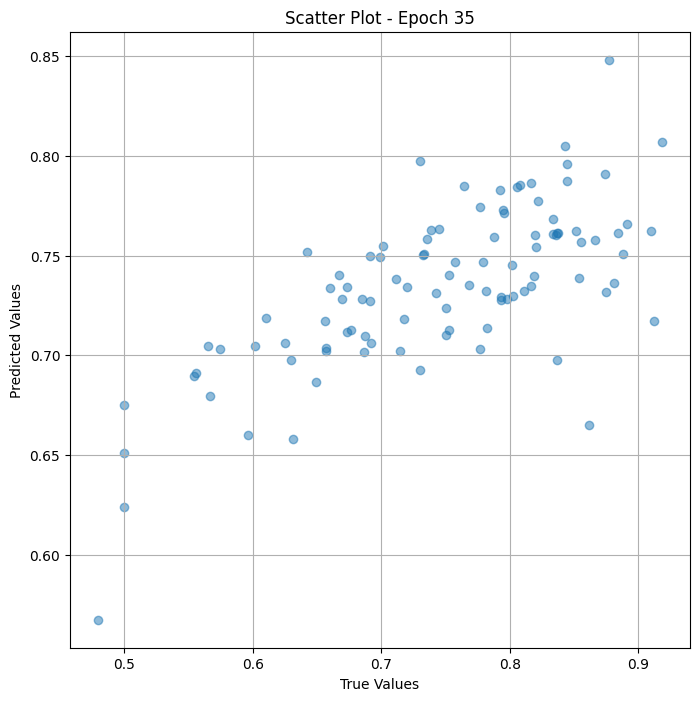

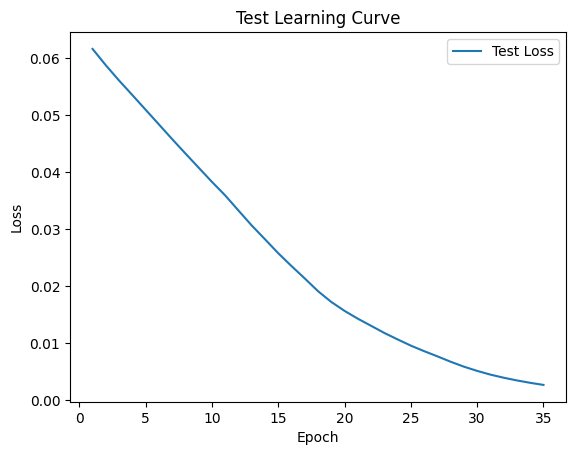


 Epoch: (36/50) Loss = 0.002350644674152136

 Epoch: (36/50) Loss_rmse = 0.04848344624042511

 Epoch: (36/50) R^2 = 0.9102392792701721

 Epoch: (36/50) MAE = 0.041771724820137024
Spearman correlation coefficient: SignificanceResult(statistic=0.6512090077336556, pvalue=6.789213435213559e-13)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.8333

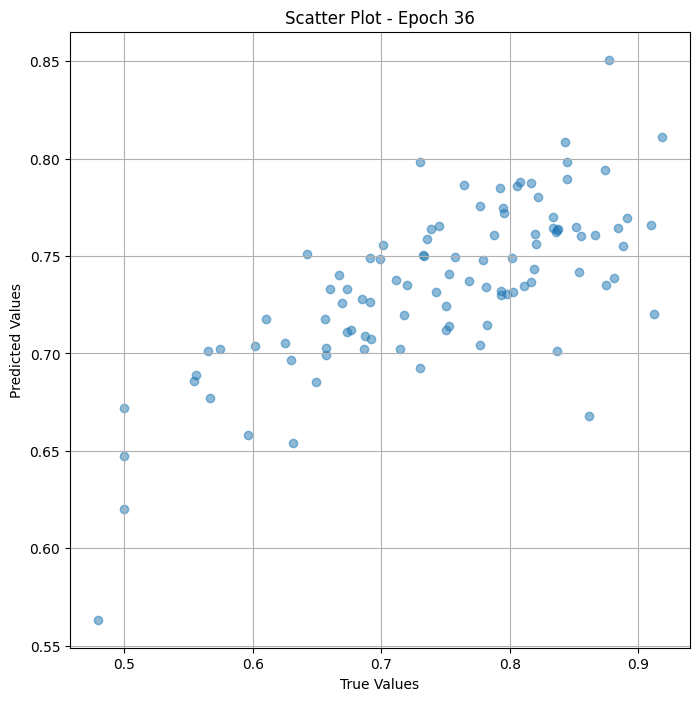

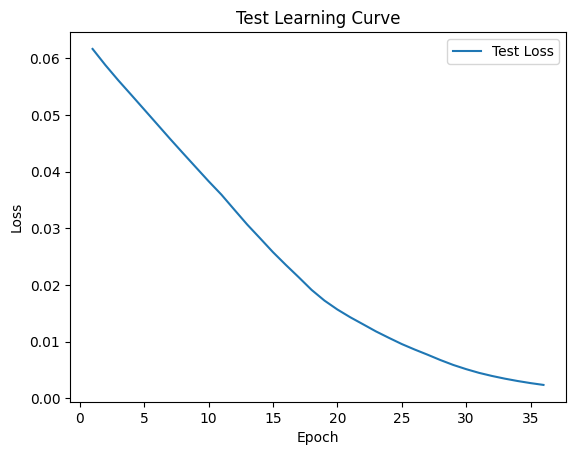


 Epoch: (37/50) Loss = 0.0020760796032845974

 Epoch: (37/50) Loss_rmse = 0.045564018189907074

 Epoch: (37/50) R^2 = 0.9207237362861633

 Epoch: (37/50) MAE = 0.038583844900131226
Spearman correlation coefficient: SignificanceResult(statistic=0.6782989117747367, pvalue=3.138829165256969e-14)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.83

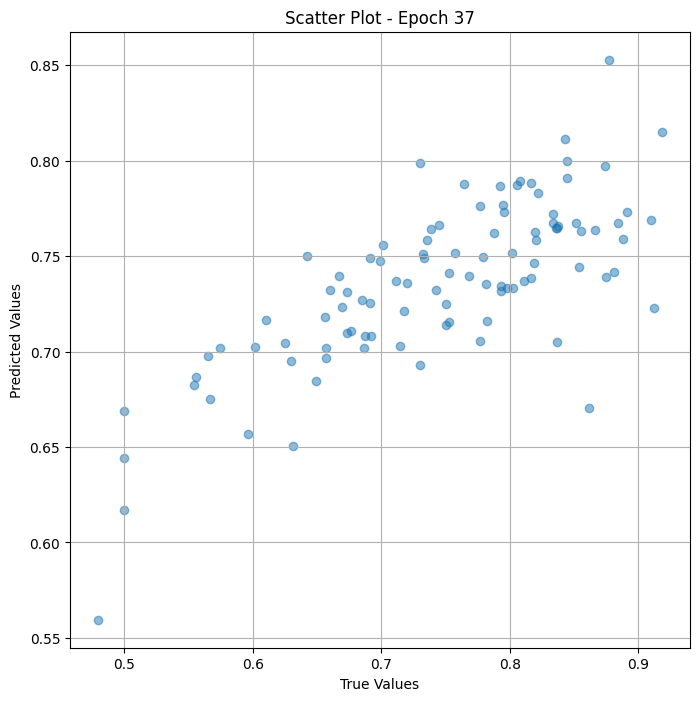

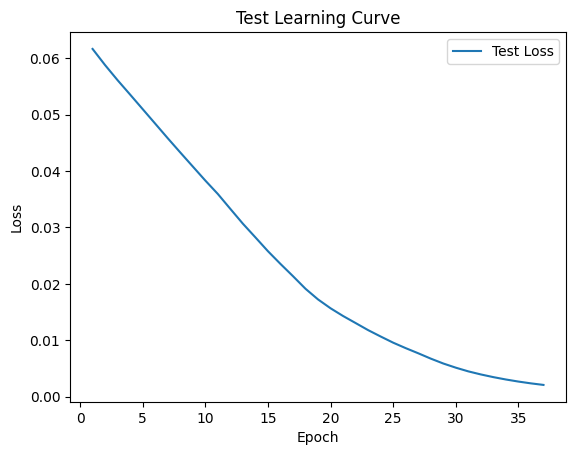


 Epoch: (38/50) Loss = 0.00183273502625525

 Epoch: (38/50) Loss_rmse = 0.042810454964637756

 Epoch: (38/50) R^2 = 0.9300159811973572

 Epoch: (38/50) MAE = 0.03558047115802765
Spearman correlation coefficient: SignificanceResult(statistic=0.698402686331012, pvalue=2.573282537675006e-15)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.833333

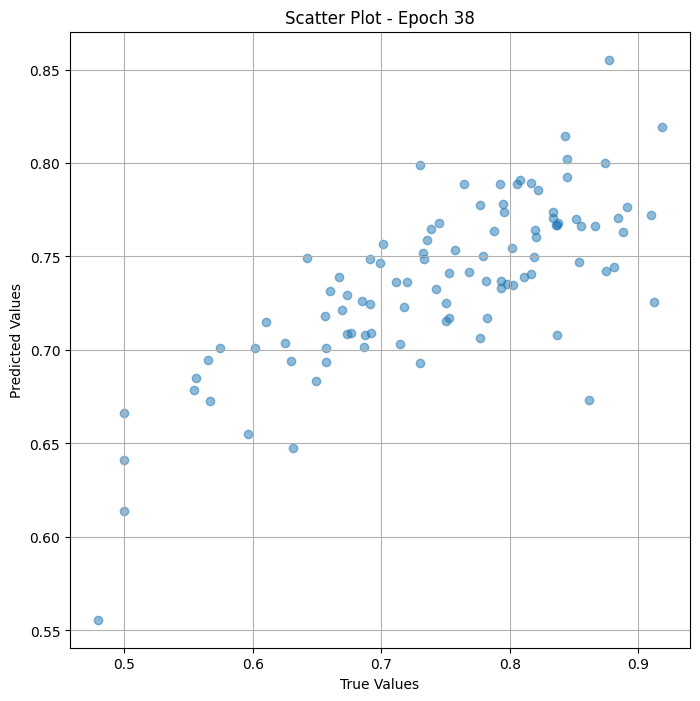

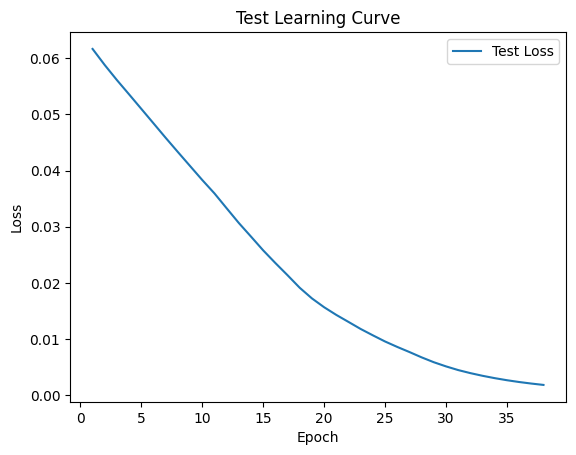


 Epoch: (39/50) Loss = 0.0016188336303457618

 Epoch: (39/50) Loss_rmse = 0.04023473337292671

 Epoch: (39/50) R^2 = 0.9381839036941528

 Epoch: (39/50) MAE = 0.032809317111968994
Spearman correlation coefficient: SignificanceResult(statistic=0.7193542921354433, pvalue=1.5092918056041879e-16)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.83

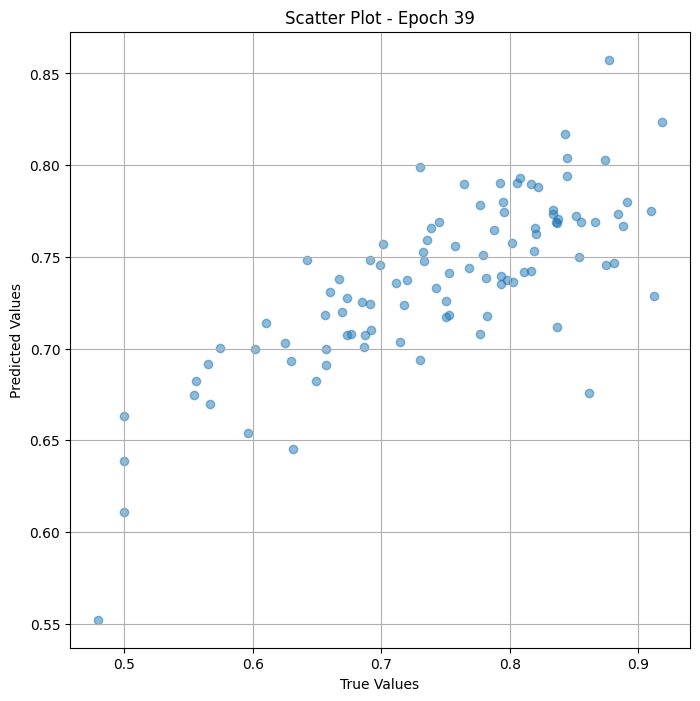

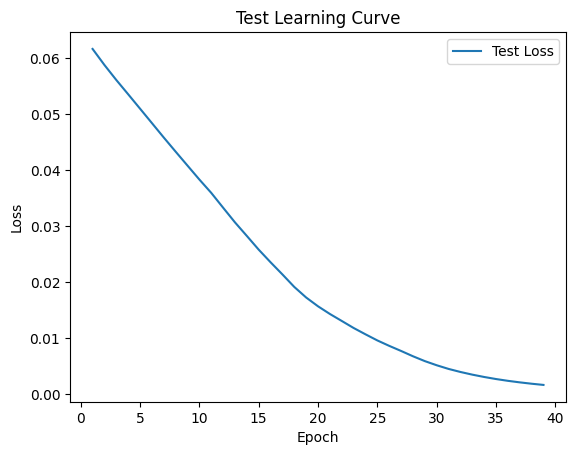


 Epoch: (40/50) Loss = 0.001430982956662774

 Epoch: (40/50) Loss_rmse = 0.03782833367586136

 Epoch: (40/50) R^2 = 0.945357084274292

 Epoch: (40/50) MAE = 0.030272483825683594
Spearman correlation coefficient: SignificanceResult(statistic=0.7345338628024286, pvalue=1.638508791409149e-17)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.83333

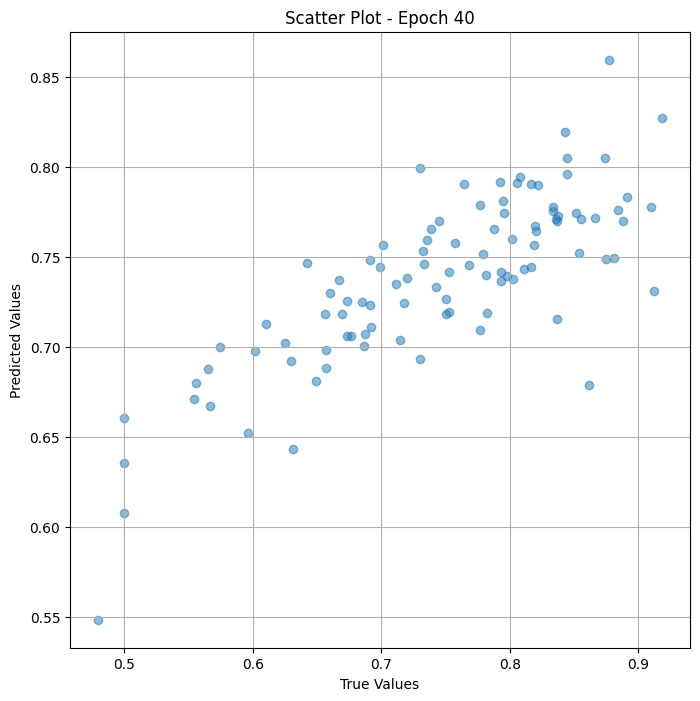

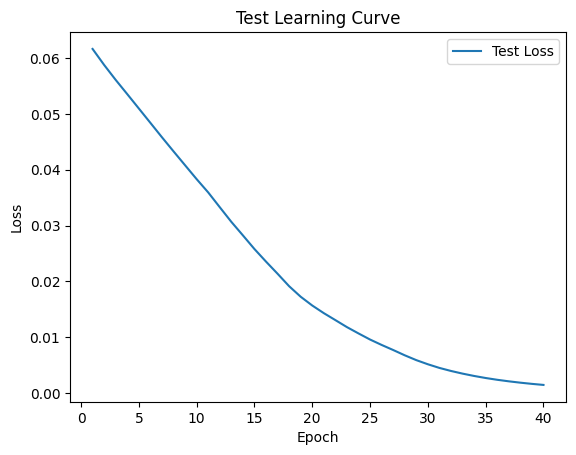


 Epoch: (41/50) Loss = 0.0012662125518545508

 Epoch: (41/50) Loss_rmse = 0.03558387979865074

 Epoch: (41/50) R^2 = 0.9516489505767822

 Epoch: (41/50) MAE = 0.02794891595840454
Spearman correlation coefficient: SignificanceResult(statistic=0.7517075325650769, pvalue=1.0983415992523326e-18)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.833

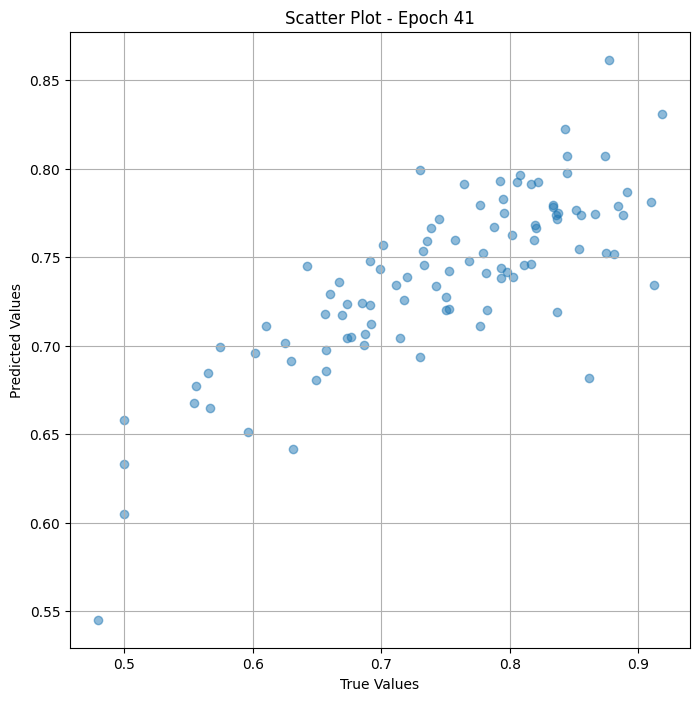

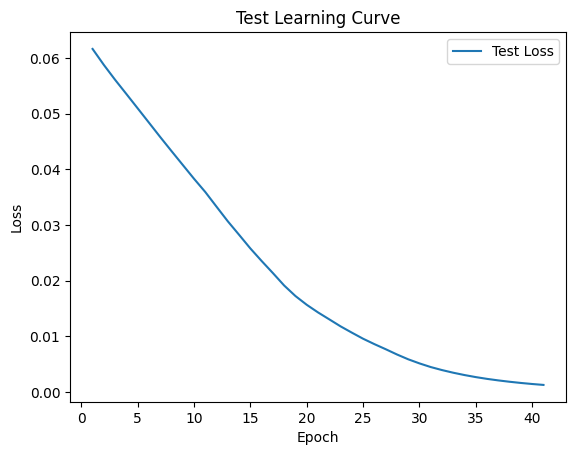


 Epoch: (42/50) Loss = 0.0011253512930124998

 Epoch: (42/50) Loss_rmse = 0.03354625776410103

 Epoch: (42/50) R^2 = 0.957027792930603

 Epoch: (42/50) MAE = 0.025781303644180298
Spearman correlation coefficient: SignificanceResult(statistic=0.7678909354298787, pvalue=6.978515219892747e-20)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.8333

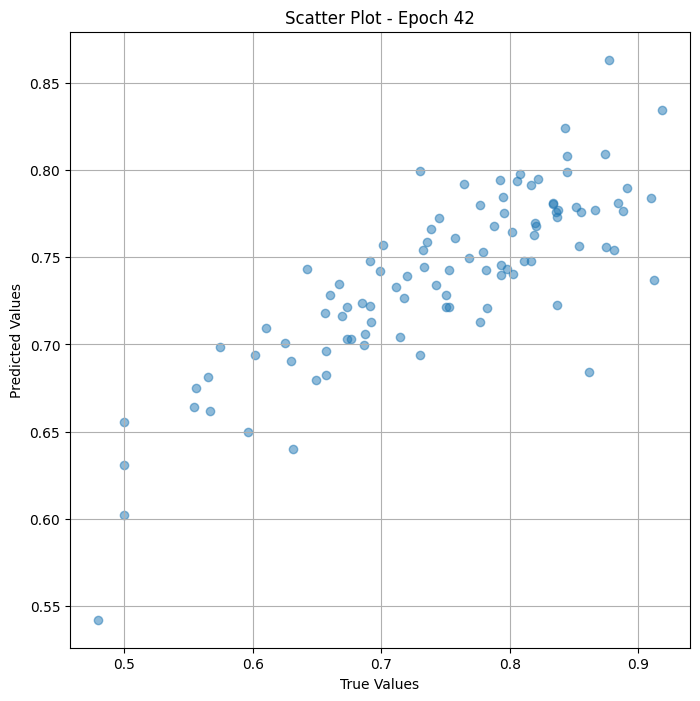

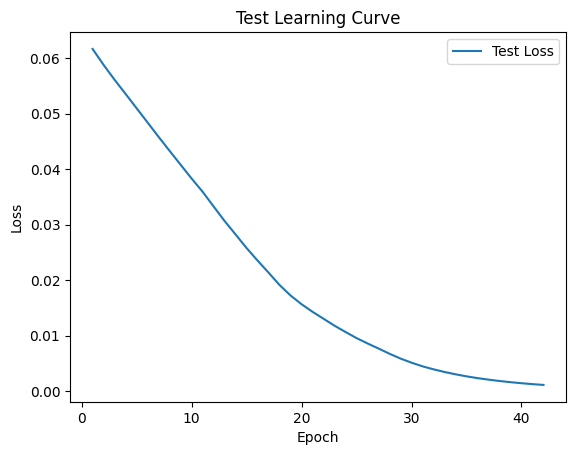


 Epoch: (43/50) Loss = 0.0010058603947982192

 Epoch: (43/50) Loss_rmse = 0.03171530365943909

 Epoch: (43/50) R^2 = 0.9615906476974487

 Epoch: (43/50) MAE = 0.023782968521118164
Spearman correlation coefficient: SignificanceResult(statistic=0.7813884089005225, pvalue=5.872310518346507e-21)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.833

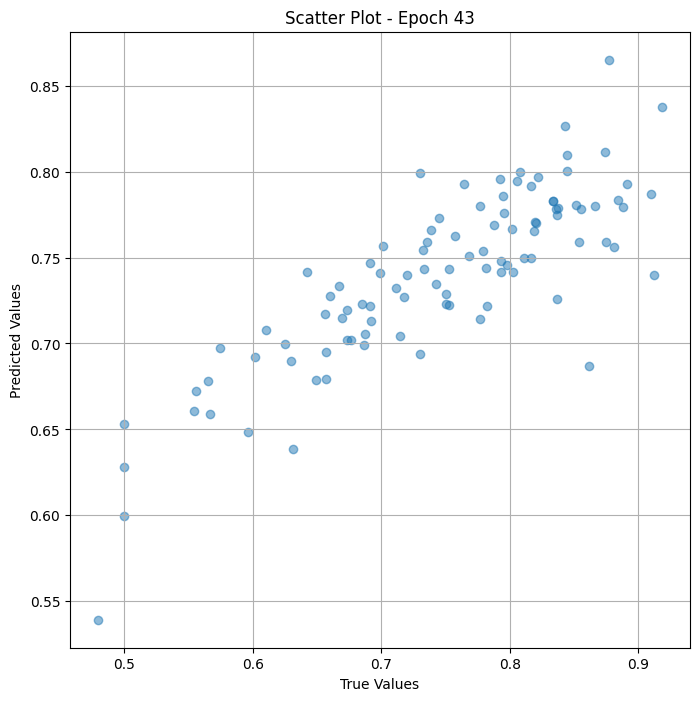

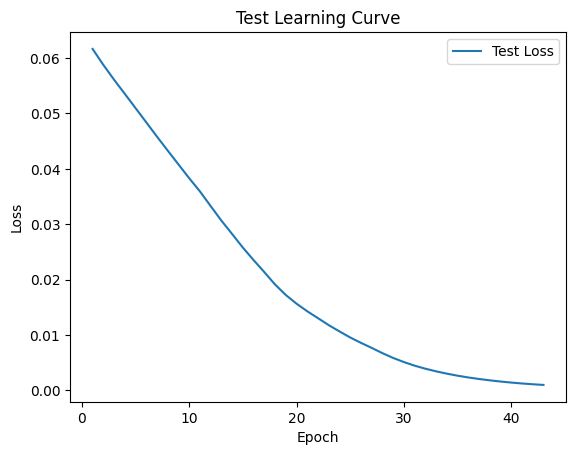


 Epoch: (44/50) Loss = 0.0009021760779432952

 Epoch: (44/50) Loss_rmse = 0.03003624640405178

 Epoch: (44/50) R^2 = 0.965549886226654

 Epoch: (44/50) MAE = 0.021984010934829712
Spearman correlation coefficient: SignificanceResult(statistic=0.7944721407220662, pvalue=4.482144926106217e-22)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.8333

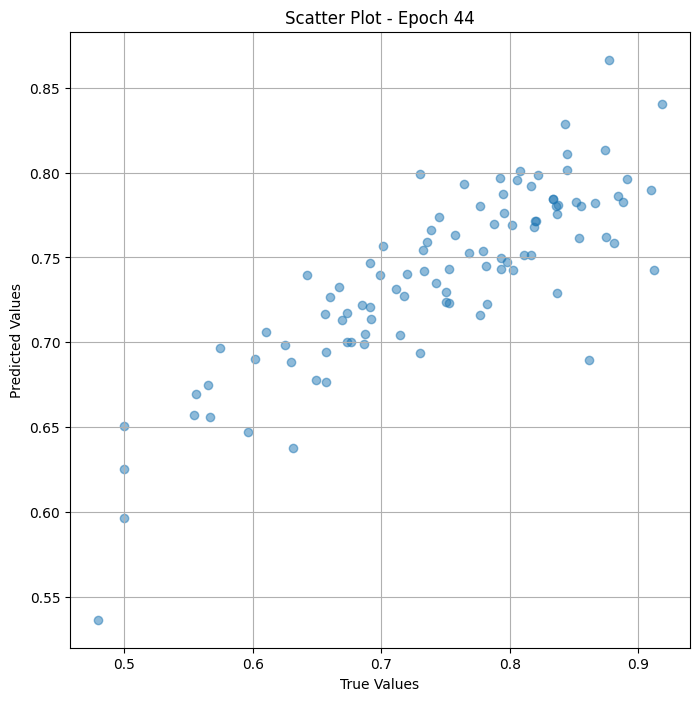

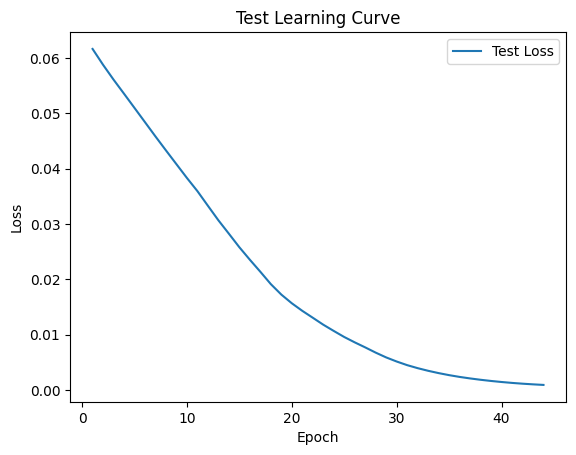


 Epoch: (45/50) Loss = 0.0008114034426398575

 Epoch: (45/50) Loss_rmse = 0.028485143557190895

 Epoch: (45/50) R^2 = 0.9690160751342773

 Epoch: (45/50) MAE = 0.020374059677124023
Spearman correlation coefficient: SignificanceResult(statistic=0.8059212538971651, pvalue=4.030221319895114e-23)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.83

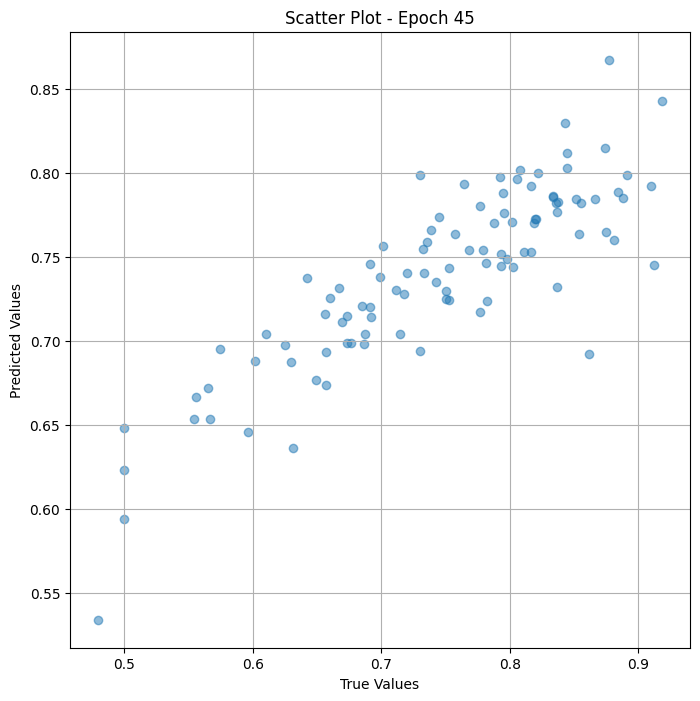

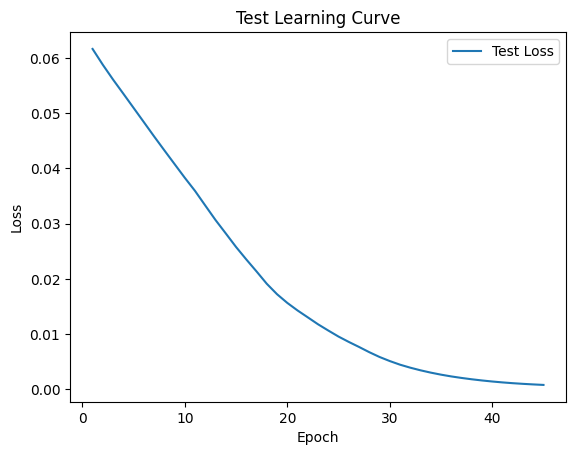


 Epoch: (46/50) Loss = 0.0007322991732507944

 Epoch: (46/50) Loss_rmse = 0.02706102654337883

 Epoch: (46/50) R^2 = 0.9720367193222046

 Epoch: (46/50) MAE = 0.018915429711341858
Spearman correlation coefficient: SignificanceResult(statistic=0.816970190723134, pvalue=3.3702433831591834e-24)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.833

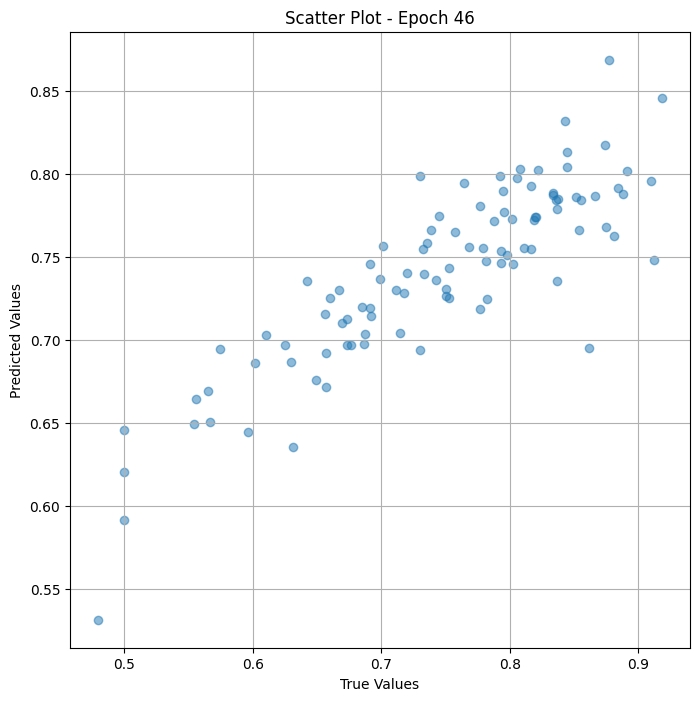

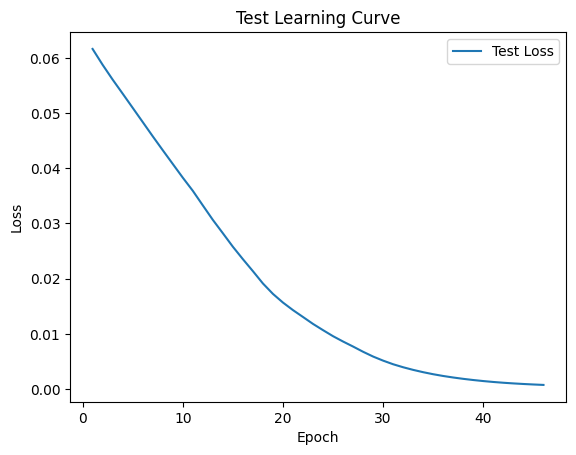


 Epoch: (47/50) Loss = 0.0006609486881643534

 Epoch: (47/50) Loss_rmse = 0.025708923116326332

 Epoch: (47/50) R^2 = 0.9747613072395325

 Epoch: (47/50) MAE = 0.017516329884529114
Spearman correlation coefficient: SignificanceResult(statistic=0.8302709673442056, pvalue=1.3481778989605848e-25)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.8

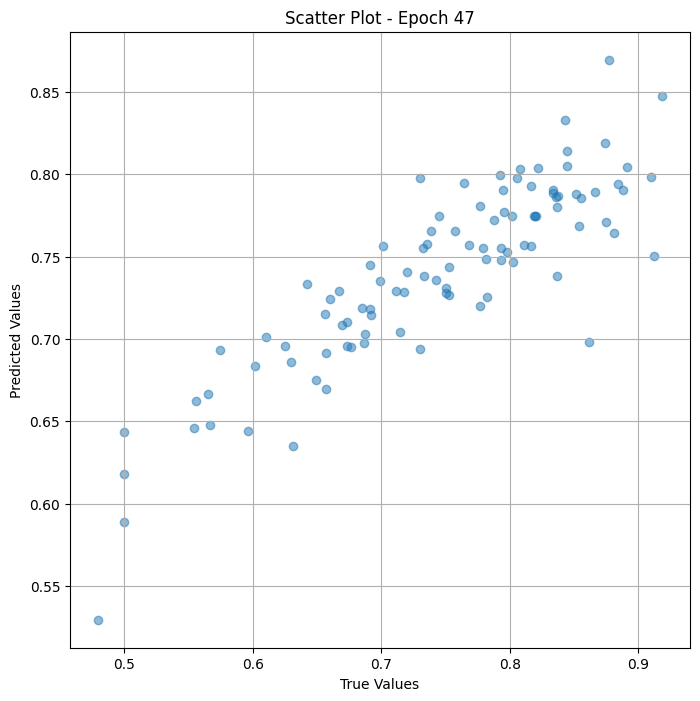

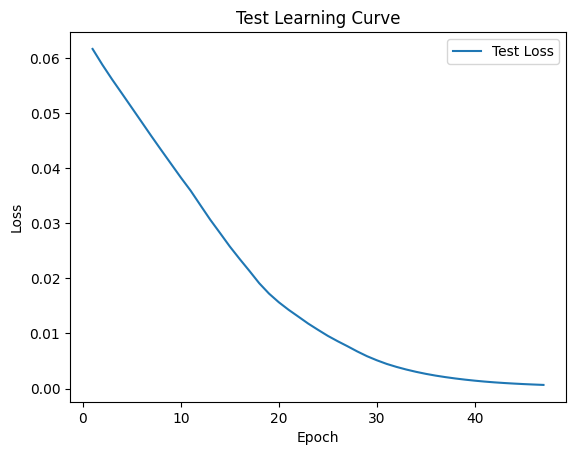


 Epoch: (48/50) Loss = 0.0005972838844172657

 Epoch: (48/50) Loss_rmse = 0.024439392611384392

 Epoch: (48/50) R^2 = 0.9771924018859863

 Epoch: (48/50) MAE = 0.01620323956012726
Spearman correlation coefficient: SignificanceResult(statistic=0.8398141558734498, pvalue=1.121701946932149e-26)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.833

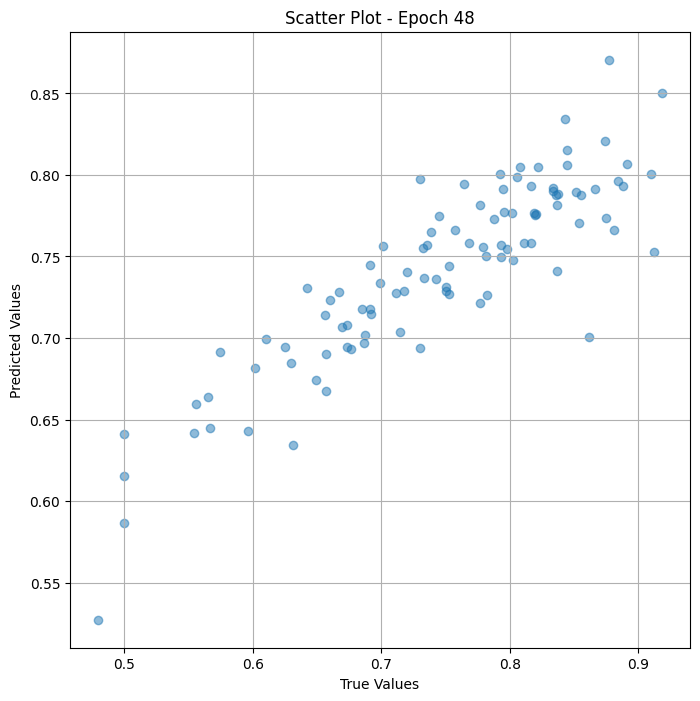

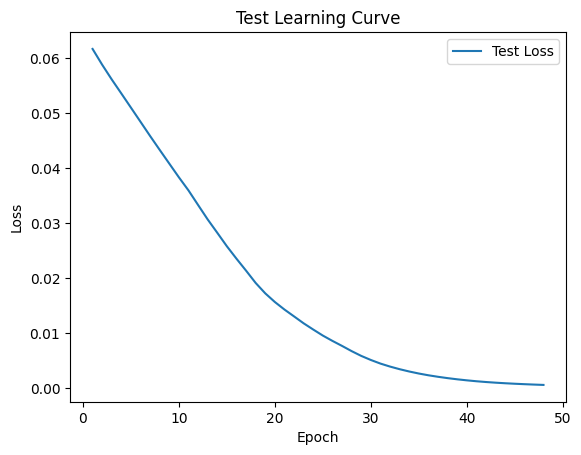


 Epoch: (49/50) Loss = 0.0005408975412137806

 Epoch: (49/50) Loss_rmse = 0.02325720340013504

 Epoch: (49/50) R^2 = 0.9793455004692078

 Epoch: (49/50) MAE = 0.015005618333816528
Spearman correlation coefficient: SignificanceResult(statistic=0.849255604652915, pvalue=8.12161775928312e-28)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.83333

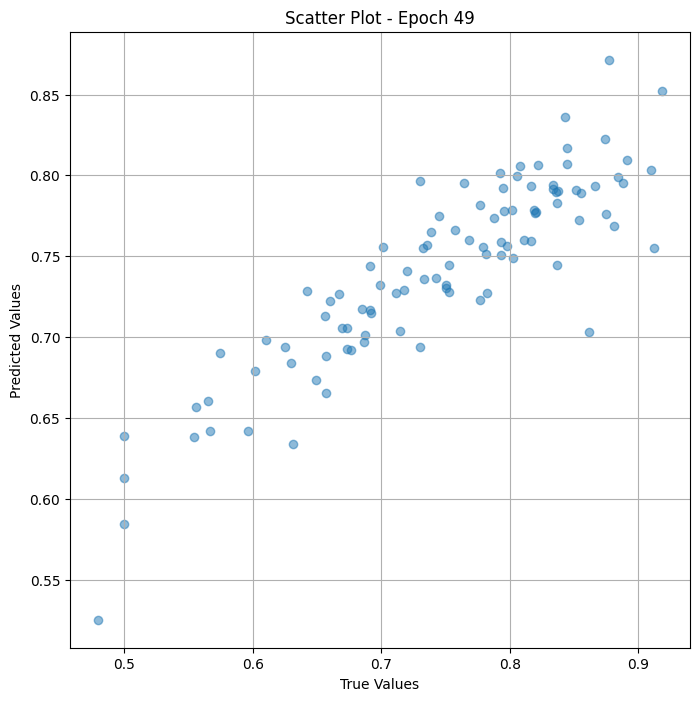

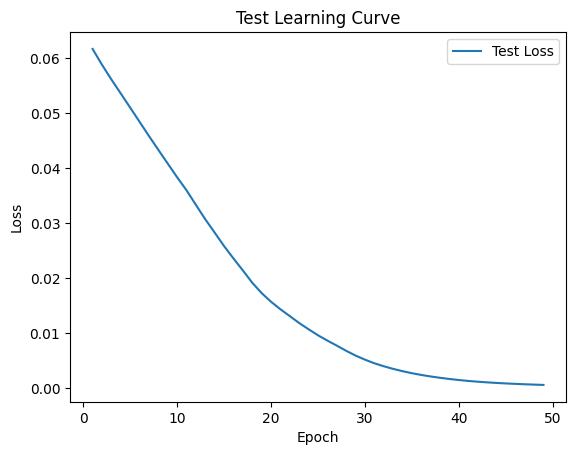


 Epoch: (50/50) Loss = 0.0004911752766929567

 Epoch: (50/50) Loss_rmse = 0.02216247469186783

 Epoch: (50/50) R^2 = 0.9812442064285278

 Epoch: (50/50) MAE = 0.013915002346038818
Spearman correlation coefficient: SignificanceResult(statistic=0.8611388074270698, pvalue=2.2829104677330836e-29)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.7826087, 0.73, 0.7876106, 0.8877551, 0.78125, 0.8541667, 0.8363636, 0.6730769, 0.73255813, 0.8362069, 0.7173913, 0.76842105, 0.82, 0.6017699, 0.6603774, 0.6875, 0.74509805, 0.8446602, 0.8556701, 0.68686867, 0.75, 0.8367347, 0.88095236, 0.6923077, 0.776699, 0.75, 0.6494845, 0.57425743, 0.73, 0.875, 0.73333335, 0.8659794, 0.7356322, 0.65591395, 0.55454546, 0.82222223, 0.6846847, 0.7787611, 0.9126214, 0.8333333, 0.8737864, 0.5963303, 0.6694915, 0.5, 0.63, 0.8080808, 0.65686274, 0.69148934, 0.8113208, 0.71428573, 0.5648148, 0.5555556, 0.81914896, 0.5, 0.9183673, 0.6761905, 0.6909091, 0.8512397, 0.77678573, 0.83

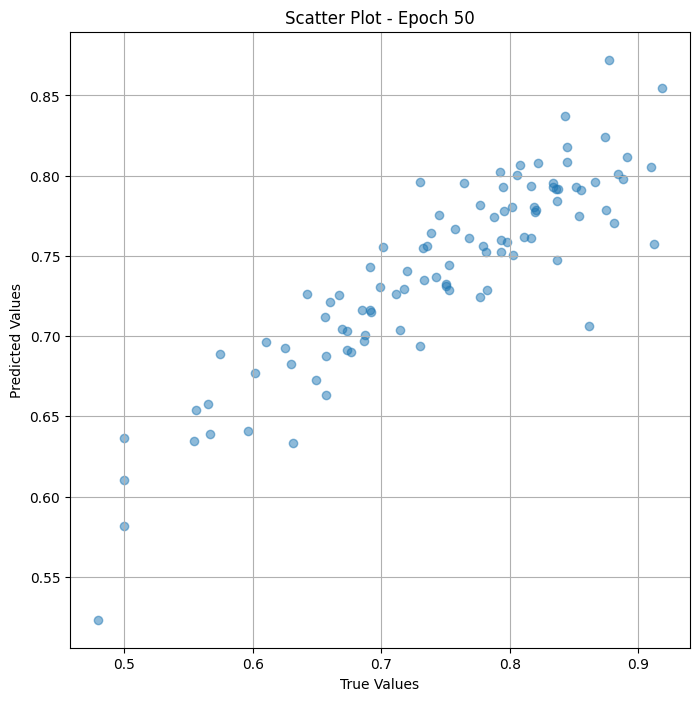

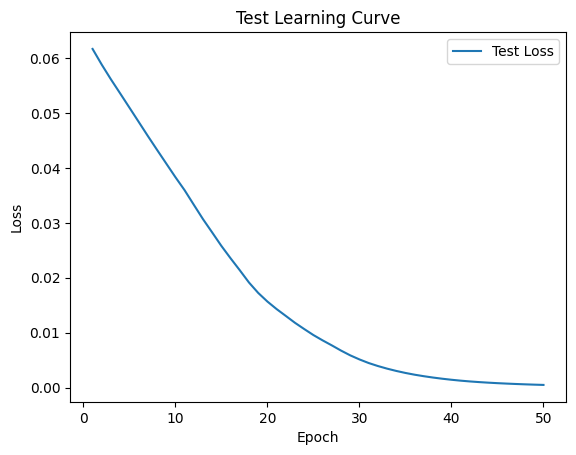

In [ ]:
# val the model and save weights
fit(50, model_res_test , test_dl )
torch.save(model_res_test.state_dict(), "model_weights_s")

In [ ]:
true_values_list_test = []
predicted_values_list_test = []

for x_trans, yb in test_dl:
    preds =model_res_test(x_trans)
    true_values_list_test.extend(yb.cpu().detach().numpy())
    predicted_values_list_test.extend(preds.squeeze().cpu().detach().numpy())



# Assuming 'df_test_vehicle' is your original DataFrame and 'true_values' and 'predicted_values' are lists of true and predicted values
df_result = pd.DataFrame({
    'Image Path': df_test_vehicle['preprocessed_image_path'],
    'True Value': true_values_list_test,  # Replace with your actual true values
    'Predicted Value': predicted_values_list_test # Replace with your actual predicted values
})

# Display the resulting DataFrame
print(df_result)

                                           Image Path  True Value  \
0   /content/vehicle/n04610013_10508_preprocessed.jpg    0.782609   
1   /content/vehicle/n02878222_22680_preprocessed.jpg    0.730000   
2    /content/vehicle/n03541923_1742_preprocessed.jpg    0.787611   
3    /content/vehicle/n03594945_5856_preprocessed.jpg    0.887755   
4   /content/vehicle/n02946348_18684_preprocessed.jpg    0.781250   
..                                                ...         ...   
95   /content/vehicle/n04610013_1891_preprocessed.jpg    0.566265   
96  /content/vehicle/n04467665_39726_preprocessed.jpg    0.479592   
97   /content/vehicle/n03670208_9655_preprocessed.jpg    0.877193   
98   /content/vehicle/n04252077_6769_preprocessed.jpg    0.631579   
99  /content/vehicle/n02834778_17153_preprocessed.jpg    0.842593   

    Predicted Value  
0          0.729751  
1          0.693858  
2          0.775379  
3          0.800637  
4          0.753636  
..              ...  
95         0.6376

#Finetuning

##Train

In [ ]:
class Dataset_train_fine(Dataset):
    def __init__(self, df,res_fine_transform =None):
        self.labels = df_train_vehicle["memoscore"]
        self.images = df_train_vehicle["preprocessed_image_path"]
        self.res_fine_transform  = res_fine_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path)

        image_trans = self.res_fine_transform (image, return_tensors='pt')
        image_trans = image_trans['pixel_values'].squeeze()

        # แสดงขนาดรูปภาพหลังการ transform
        #print("Transformed image size:", image_trans.shape)

        label = self.labels[idx]

        return image_trans, label

# สร้างตัวแปรสำหรับ ViTFeatureExtractor
res_fine_transform   = ConvNextImageProcessor.from_pretrained("facebook/convnext-tiny-224")

# สร้าง Dataset และ DataLoader
train_ds_fine = Dataset_train_fine(df_train_vehicle, res_fine_transform =res_fine_transform )
train_dl_fine = DataLoader(train_ds_fine, batch_size=16, shuffle=False)

# เรียกดูข้อมูลจาก DataLoader
'''for image_trans, label in train_dl:
    # คำสั่งนี้จะแสดงขนาดของรูปภาพที่ transform แล้วในแต่ละ batch
    print(image_trans)
    break'''


'for image_trans, label in train_dl:\n    # คำสั่งนี้จะแสดงขนาดของรูปภาพที่ transform แล้วในแต่ละ batch\n    print(image_trans)\n    break'

In [ ]:
class Resmem_model_fine_vehicle(torch.nn.Module):
    def __init__(self, arch="resnet50.a1_in1k"):
        super().__init__()
        self.arch = arch
        self.res = timm.create_model(self.arch, pretrained=True, num_classes=1)



    def forward(self, x):
        resfeat = self.res(x)

        out = torch.sigmoid(resfeat)
        return out



NORMALIZE_MEAN = (0.0, 0.0, 0.0)
NORMALIZE_STD = (1.0, 1.0, 1.0)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(NORMALIZE_MEAN, NORMALIZE_STD)
])

model_res_fine =  Resmem_model_fine_vehicle( arch="resnet50.a1_in1k")

In [ ]:
# Add data and model to GPU
device = get_default_device()
train_dl_fine = DeviceDataLoader(train_dl_fine, device)
model_res_fine = to_device(model_res_fine  , device)

In [ ]:
params = [param for param in list(model_res_fine.parameters()) if param.requires_grad == True ]
optimizer = torch.optim.Adam(params, lr=1e-5 ,weight_decay=1e-7)

lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=2,
    verbose=True)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [ ]:
# Define the plot_scatter function
def plot_scatter(true_values, predicted_values, epoch):
    plt.figure(figsize=(8, 8))
    plt.scatter(true_values, predicted_values, alpha=0.5)
    plt.title(f'Scatter Plot - Epoch {epoch+1}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

def plot_learning_curve(loss_list):
    plt.plot(range(1, len(loss_list) + 1), loss_list, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Learning Curve')
    plt.legend()
    plt.show()

def fit(epochs,model_res_fine, train_dl_fine):
    opt = optimizer
    sched = lr_scheduler
    loss_func = nn.MSELoss()
    mae_func = nn.L1Loss()
    total_loss_list = []


    for epoch in range(epochs):
        model_res_fine.train()
        batch_num = 32
        true_values_list = []
        predicted_values_list = []

        for x_trans, yb in train_dl_fine:
            total_loss = 0
            total_loss_rmse = 0
            total_r2 = 0
            total_mae = 0
            total_spearman =0
            #total_spearman = 0

            yb = yb.float()

            # Pass the optimizer so that the model will get trained
            preds = model_res_fine(x_trans)
            loss = loss_func(preds.squeeze(), yb)
            loss_rmse = torch.sqrt(loss)
            mae = mae_func(preds.squeeze(), yb)

            # Calculate R-squared
            mean_y = torch.mean(yb)
            ss_total = torch.sum((yb - mean_y)**2)
            ss_residual = torch.sum((yb - preds.squeeze())**2)
            r2 = 1 - (ss_residual / ss_total)

            #calculate  spearman
            spearman_corr = spearmanr(true_values_list, predicted_values_list)

             # Accumulate true and predicted values for scatter plot
            true_values_list.extend(yb.cpu().detach().numpy())
            predicted_values_list.extend(preds.squeeze().cpu().detach().numpy())



            # Backpropagation
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Print batch information
            #print('\nBatch:', batch_num)
            #print('True Values:', yb.cpu().detach().numpy())
            #print('Predicted Values:', preds.squeeze().cpu().detach().numpy())

            # Accumulate losses, R-squared, MAE, and Spearman values for the epoch
            total_loss = loss.item()
            total_loss_rmse = loss_rmse.item()
            total_r2 = r2.item()
            total_mae = mae.item()

            # Increment batch number
            batch_num += 10
        # Adjust learning rate scheduler based on total_loss
        sched.step(total_loss, total_loss_rmse)

        # Calculate mean R-squared, MAE, and Spearman for the epoch
        mean_r2 = total_r2 / batch_num
        mean_mae = total_mae / batch_num
        #mean_spearman = total_spearman / len(train_dl)

        # Print epoch information
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss = {total_loss}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss_rmse = {total_loss_rmse}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) R^2 = {total_r2}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) MAE = {total_mae}')
        print("Spearman correlation coefficient:", spearman_corr)
        print('\n', f"true_values_list_val : { len(true_values_list)}")
        print('\n', f"predicted_values_list_val : {len(predicted_values_list)}")
        print('\n', f"true_values_list_val : { true_values_list}")
        print('\n', f"predicted_values_list_val : {predicted_values_list}")
        total_loss_list.append(total_loss)
        plot_scatter(true_values_list, predicted_values_list, epoch)
        plot_learning_curve(total_loss_list)

In [ ]:
# Training the model and save weights
fit(20,model_res_fine , train_dl)
torch.save(model_res_fine.state_dict(), "model_weights_fine")

## valid

In [ ]:
params = [param for param in list(model_res_val .parameters()) if param.requires_grad == True]
optimizer = torch.optim.Adam(params, lr=1e-5,weight_decay=1e-6)

lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=2,
    verbose=True)

In [ ]:
# Define the plot_scatter function
def plot_scatter(true_values, predicted_values, epoch):
    plt.figure(figsize=(8, 8))
    plt.scatter(true_values, predicted_values, alpha=0.5)
    plt.title(f'Scatter Plot - Epoch {epoch+1}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

def plot_learning_curve(loss_list):
    plt.plot(range(1, len(loss_list) + 1), loss_list, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Val Learning Curve')
    plt.legend()
    plt.show()

def fit(epochs,model_res_val, val_dl):
    opt = optimizer
    sched = lr_scheduler
    loss_func = nn.MSELoss()
    mae_func = nn.L1Loss()
    total_loss_list = []


    for epoch in range(epochs):
        model_res_val.train()
        batch_num = 32
        true_values_list = []
        predicted_values_list = []

        for x_trans, yb in val_dl:
            total_loss = 0
            total_loss_rmse = 0
            total_r2 = 0
            total_mae = 0
            total_spearman =0
            #total_spearman = 0

            yb = yb.float()

            # Pass the optimizer so that the model will get trained
            preds = model_res_val(x_trans)
            loss = loss_func(preds.squeeze(), yb)
            loss_rmse = torch.sqrt(loss)
            mae = mae_func(preds.squeeze(), yb)

            # Calculate R-squared
            mean_y = torch.mean(yb)
            ss_total = torch.sum((yb - mean_y)**2)
            ss_residual = torch.sum((yb - preds.squeeze())**2)
            r2 = 1 - (ss_residual / ss_total)

            #calculate  spearman
            spearman_corr = spearmanr(true_values_list, predicted_values_list)

             # Accumulate true and predicted values for scatter plot
            true_values_list.extend(yb.cpu().detach().numpy())
            predicted_values_list.extend(preds.squeeze().cpu().detach().numpy())



            # Backpropagation
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Print batch information
            #print('\nBatch:', batch_num)
            #print('True Values:', yb.cpu().detach().numpy())
            #print('Predicted Values:', preds.squeeze().cpu().detach().numpy())

            # Accumulate losses, R-squared, MAE, and Spearman values for the epoch
            total_loss = loss.item()
            total_loss_rmse = loss_rmse.item()
            total_r2 = r2.item()
            total_mae = mae.item()

            # Increment batch number
            batch_num += 10
        # Adjust learning rate scheduler based on total_loss
        sched.step(total_loss, total_loss_rmse)

        # Calculate mean R-squared, MAE, and Spearman for the epoch
        mean_r2 = total_r2 / batch_num
        mean_mae = total_mae / batch_num
        #mean_spearman = total_spearman / len(train_dl)

        # Print epoch information
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss = {total_loss}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss_rmse = {total_loss_rmse}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) R^2 = {total_r2}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) MAE = {total_mae}')
        print("Spearman correlation coefficient:", spearman_corr)
        print('\n', f"true_values_list_val : { len(true_values_list)}")
        print('\n', f"predicted_values_list_val : {len(predicted_values_list)}")
        print('\n', f"true_values_list_val : { true_values_list}")
        print('\n', f"predicted_values_list_val : {predicted_values_list}")
        total_loss_list.append(total_loss)
        plot_scatter(true_values_list, predicted_values_list, epoch)
        plot_learning_curve(total_loss_list)


 Epoch: (1/10) Loss = 0.00033607115619815886

 Epoch: (1/10) Loss_rmse = 0.018332242965698242

 Epoch: (1/10) R^2 = 0.8714162707328796

 Epoch: (1/10) MAE = 0.016818031668663025
Spearman correlation coefficient: SignificanceResult(statistic=0.9940585196047451, pvalue=2.384984885132179e-92)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.6741573, 0.8333333, 0.6666667, 0.742268, 0.86868685, 0.7757009, 0.9245283, 0.76237625, 0.6666667, 0.74358976, 0.6862745, 0.853211, 0.7352941, 0.7244898, 0.84375, 0.5714286, 0.67391306, 0.7291667, 0.7340425, 0.7184466, 0.8252427, 0.81707317, 0.61764705, 0.77227724, 0.78723407, 0.67826086, 0.6732673, 0.8761062, 0.8557692, 0.85470086, 0.65555555, 0.7522124, 0.5104167, 0.6451613, 0.556701, 0.8828829, 0.7752809, 0.57843137, 0.7570093, 0.6037736, 0.8192771, 0.74157304, 0.72727275, 0.7311828, 0.43564355, 0.7706422, 0.6506024, 0.6421053, 0.84158415, 0.94186044, 0.6727273, 0.75510204, 0.8648649, 0.63917524, 0.8958333, 

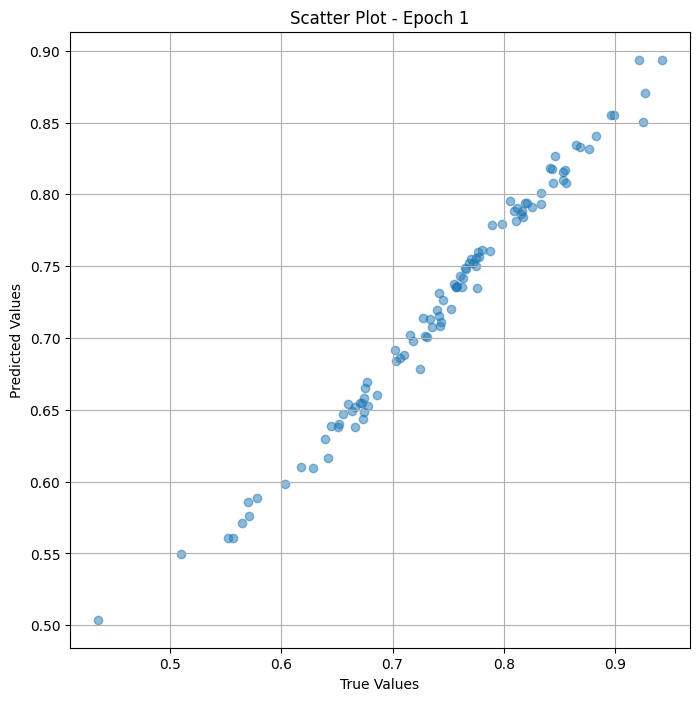

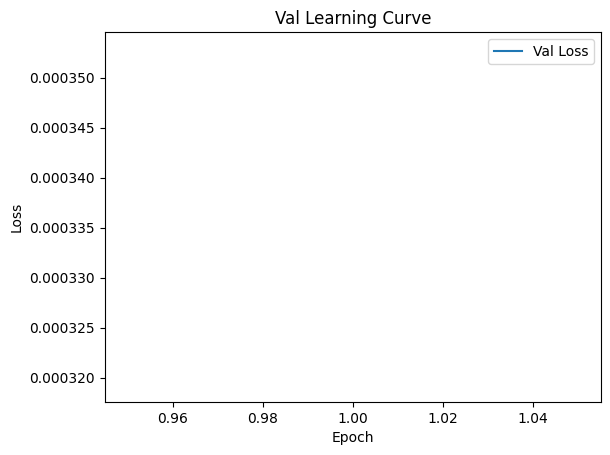


 Epoch: (2/10) Loss = 0.00034486327785998583

 Epoch: (2/10) Loss_rmse = 0.018570493906736374

 Epoch: (2/10) R^2 = 0.8680523633956909

 Epoch: (2/10) MAE = 0.017256543040275574
Spearman correlation coefficient: SignificanceResult(statistic=0.9939160868533383, pvalue=7.238362874729934e-92)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.6741573, 0.8333333, 0.6666667, 0.742268, 0.86868685, 0.7757009, 0.9245283, 0.76237625, 0.6666667, 0.74358976, 0.6862745, 0.853211, 0.7352941, 0.7244898, 0.84375, 0.5714286, 0.67391306, 0.7291667, 0.7340425, 0.7184466, 0.8252427, 0.81707317, 0.61764705, 0.77227724, 0.78723407, 0.67826086, 0.6732673, 0.8761062, 0.8557692, 0.85470086, 0.65555555, 0.7522124, 0.5104167, 0.6451613, 0.556701, 0.8828829, 0.7752809, 0.57843137, 0.7570093, 0.6037736, 0.8192771, 0.74157304, 0.72727275, 0.7311828, 0.43564355, 0.7706422, 0.6506024, 0.6421053, 0.84158415, 0.94186044, 0.6727273, 0.75510204, 0.8648649, 0.63917524, 0.8958333, 

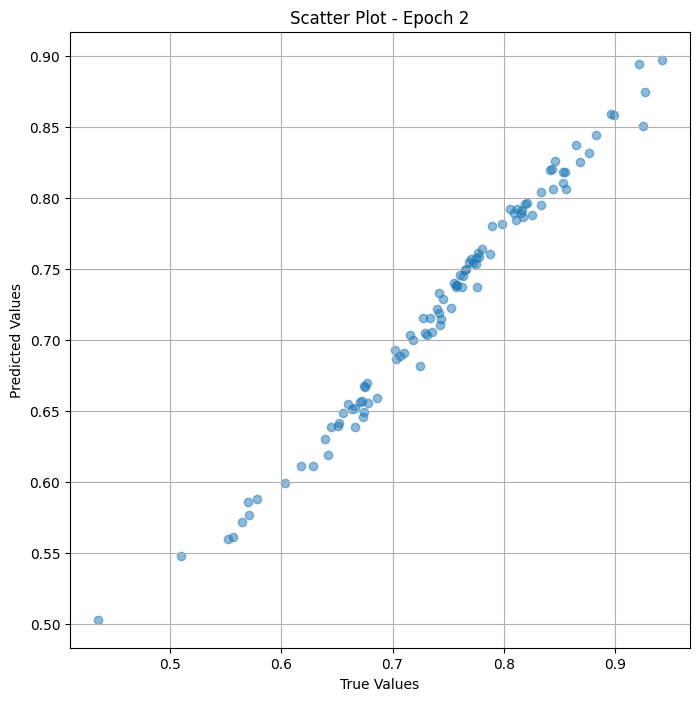

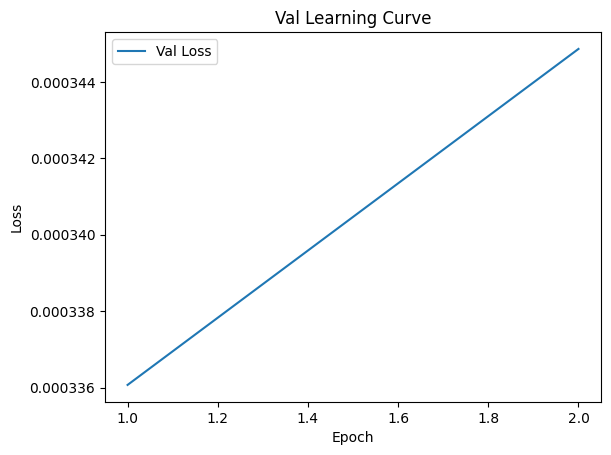


 Epoch: (3/10) Loss = 0.0002444552956148982

 Epoch: (3/10) Loss_rmse = 0.015635065734386444

 Epoch: (3/10) R^2 = 0.9064692854881287

 Epoch: (3/10) MAE = 0.01449248194694519
Spearman correlation coefficient: SignificanceResult(statistic=0.995435369535012, pvalue=1.0232956400669888e-97)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.6741573, 0.8333333, 0.6666667, 0.742268, 0.86868685, 0.7757009, 0.9245283, 0.76237625, 0.6666667, 0.74358976, 0.6862745, 0.853211, 0.7352941, 0.7244898, 0.84375, 0.5714286, 0.67391306, 0.7291667, 0.7340425, 0.7184466, 0.8252427, 0.81707317, 0.61764705, 0.77227724, 0.78723407, 0.67826086, 0.6732673, 0.8761062, 0.8557692, 0.85470086, 0.65555555, 0.7522124, 0.5104167, 0.6451613, 0.556701, 0.8828829, 0.7752809, 0.57843137, 0.7570093, 0.6037736, 0.8192771, 0.74157304, 0.72727275, 0.7311828, 0.43564355, 0.7706422, 0.6506024, 0.6421053, 0.84158415, 0.94186044, 0.6727273, 0.75510204, 0.8648649, 0.63917524, 0.8958333, 0.

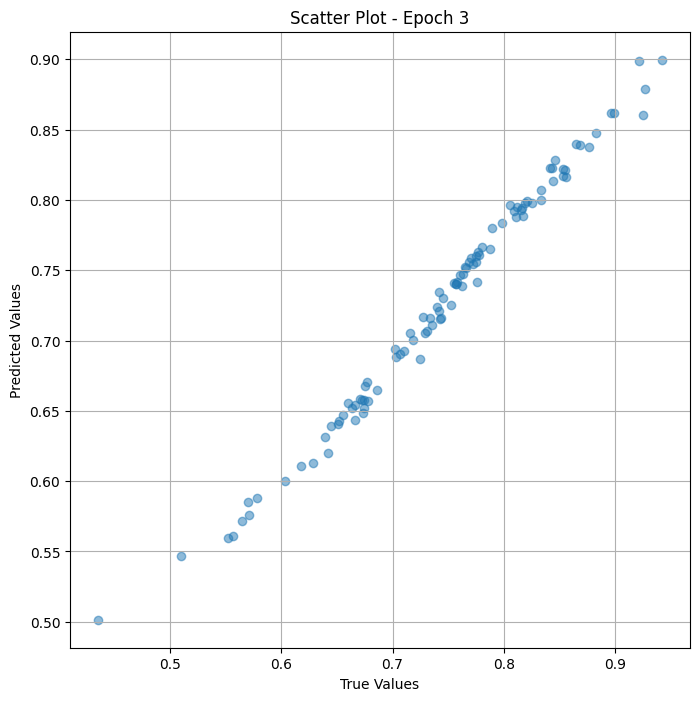

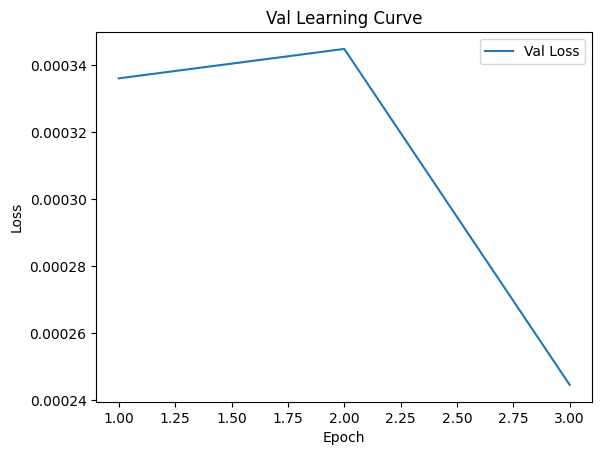


 Epoch: (4/10) Loss = 0.00018719029321800917

 Epoch: (4/10) Loss_rmse = 0.013681750744581223

 Epoch: (4/10) R^2 = 0.9283794164657593

 Epoch: (4/10) MAE = 0.012424275279045105
Spearman correlation coefficient: SignificanceResult(statistic=0.99616109831599, pvalue=3.0393292793382997e-101)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.6741573, 0.8333333, 0.6666667, 0.742268, 0.86868685, 0.7757009, 0.9245283, 0.76237625, 0.6666667, 0.74358976, 0.6862745, 0.853211, 0.7352941, 0.7244898, 0.84375, 0.5714286, 0.67391306, 0.7291667, 0.7340425, 0.7184466, 0.8252427, 0.81707317, 0.61764705, 0.77227724, 0.78723407, 0.67826086, 0.6732673, 0.8761062, 0.8557692, 0.85470086, 0.65555555, 0.7522124, 0.5104167, 0.6451613, 0.556701, 0.8828829, 0.7752809, 0.57843137, 0.7570093, 0.6037736, 0.8192771, 0.74157304, 0.72727275, 0.7311828, 0.43564355, 0.7706422, 0.6506024, 0.6421053, 0.84158415, 0.94186044, 0.6727273, 0.75510204, 0.8648649, 0.63917524, 0.8958333, 

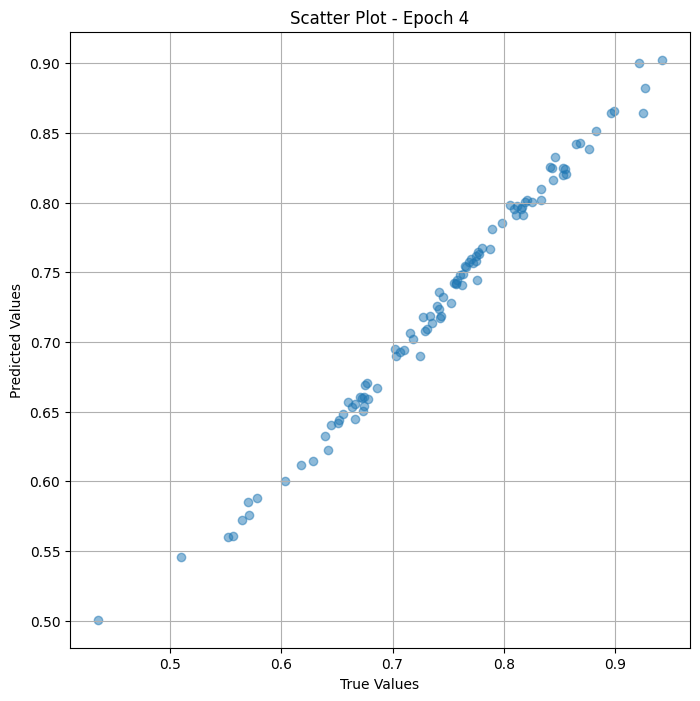

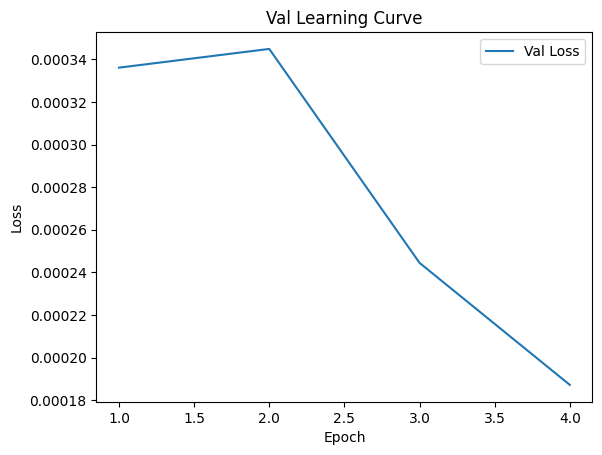


 Epoch: (5/10) Loss = 0.00013838797167409211

 Epoch: (5/10) Loss_rmse = 0.011763841845095158

 Epoch: (5/10) R^2 = 0.9470515847206116

 Epoch: (5/10) MAE = 0.010286107659339905
Spearman correlation coefficient: SignificanceResult(statistic=0.9964866588906345, pvalue=4.754380990891278e-103)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.6741573, 0.8333333, 0.6666667, 0.742268, 0.86868685, 0.7757009, 0.9245283, 0.76237625, 0.6666667, 0.74358976, 0.6862745, 0.853211, 0.7352941, 0.7244898, 0.84375, 0.5714286, 0.67391306, 0.7291667, 0.7340425, 0.7184466, 0.8252427, 0.81707317, 0.61764705, 0.77227724, 0.78723407, 0.67826086, 0.6732673, 0.8761062, 0.8557692, 0.85470086, 0.65555555, 0.7522124, 0.5104167, 0.6451613, 0.556701, 0.8828829, 0.7752809, 0.57843137, 0.7570093, 0.6037736, 0.8192771, 0.74157304, 0.72727275, 0.7311828, 0.43564355, 0.7706422, 0.6506024, 0.6421053, 0.84158415, 0.94186044, 0.6727273, 0.75510204, 0.8648649, 0.63917524, 0.8958333,

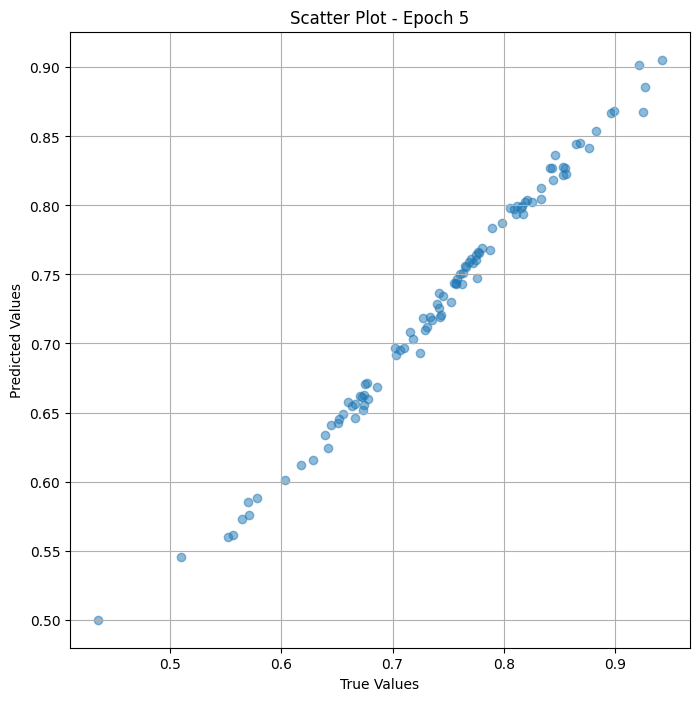

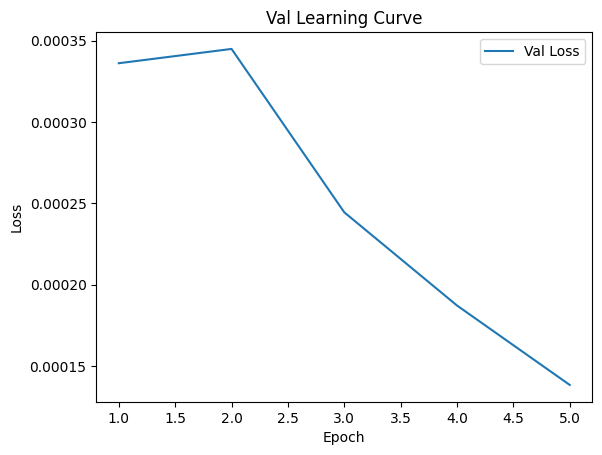


 Epoch: (6/10) Loss = 9.842972212936729e-05

 Epoch: (6/10) Loss_rmse = 0.009921175427734852

 Epoch: (6/10) R^2 = 0.9623399376869202

 Epoch: (6/10) MAE = 0.008798301219940186
Spearman correlation coefficient: SignificanceResult(statistic=0.9966290916420414, pvalue=6.819317550194169e-104)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.6741573, 0.8333333, 0.6666667, 0.742268, 0.86868685, 0.7757009, 0.9245283, 0.76237625, 0.6666667, 0.74358976, 0.6862745, 0.853211, 0.7352941, 0.7244898, 0.84375, 0.5714286, 0.67391306, 0.7291667, 0.7340425, 0.7184466, 0.8252427, 0.81707317, 0.61764705, 0.77227724, 0.78723407, 0.67826086, 0.6732673, 0.8761062, 0.8557692, 0.85470086, 0.65555555, 0.7522124, 0.5104167, 0.6451613, 0.556701, 0.8828829, 0.7752809, 0.57843137, 0.7570093, 0.6037736, 0.8192771, 0.74157304, 0.72727275, 0.7311828, 0.43564355, 0.7706422, 0.6506024, 0.6421053, 0.84158415, 0.94186044, 0.6727273, 0.75510204, 0.8648649, 0.63917524, 0.8958333, 

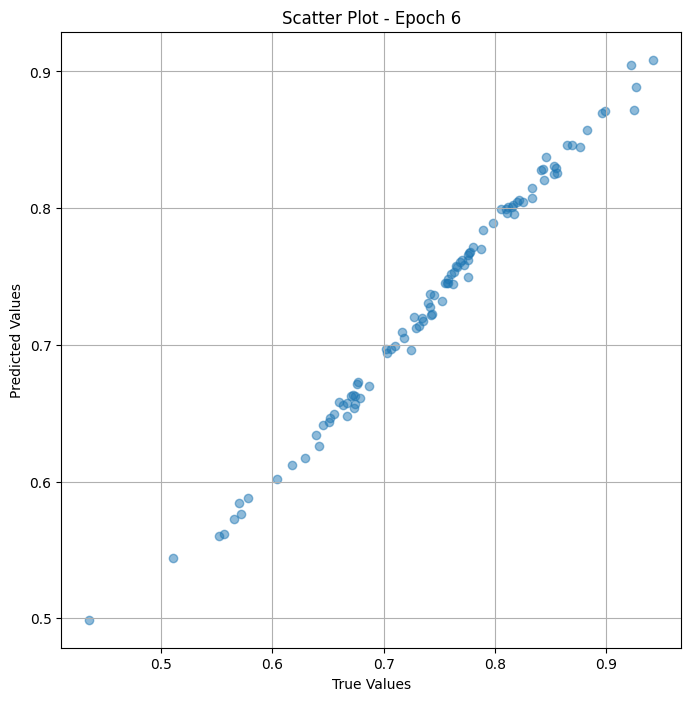

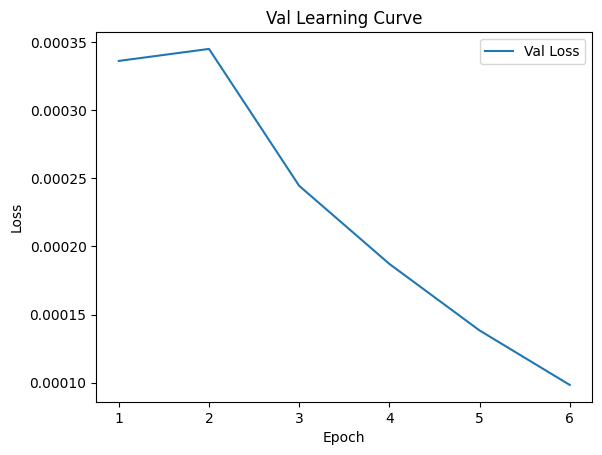


 Epoch: (7/10) Loss = 7.189970347099006e-05

 Epoch: (7/10) Loss_rmse = 0.00847936887294054

 Epoch: (7/10) R^2 = 0.9724905490875244

 Epoch: (7/10) MAE = 0.007625550031661987
Spearman correlation coefficient: SignificanceResult(statistic=0.9969343046807704, pvalue=7.93390200879308e-106)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.6741573, 0.8333333, 0.6666667, 0.742268, 0.86868685, 0.7757009, 0.9245283, 0.76237625, 0.6666667, 0.74358976, 0.6862745, 0.853211, 0.7352941, 0.7244898, 0.84375, 0.5714286, 0.67391306, 0.7291667, 0.7340425, 0.7184466, 0.8252427, 0.81707317, 0.61764705, 0.77227724, 0.78723407, 0.67826086, 0.6732673, 0.8761062, 0.8557692, 0.85470086, 0.65555555, 0.7522124, 0.5104167, 0.6451613, 0.556701, 0.8828829, 0.7752809, 0.57843137, 0.7570093, 0.6037736, 0.8192771, 0.74157304, 0.72727275, 0.7311828, 0.43564355, 0.7706422, 0.6506024, 0.6421053, 0.84158415, 0.94186044, 0.6727273, 0.75510204, 0.8648649, 0.63917524, 0.8958333, 0.

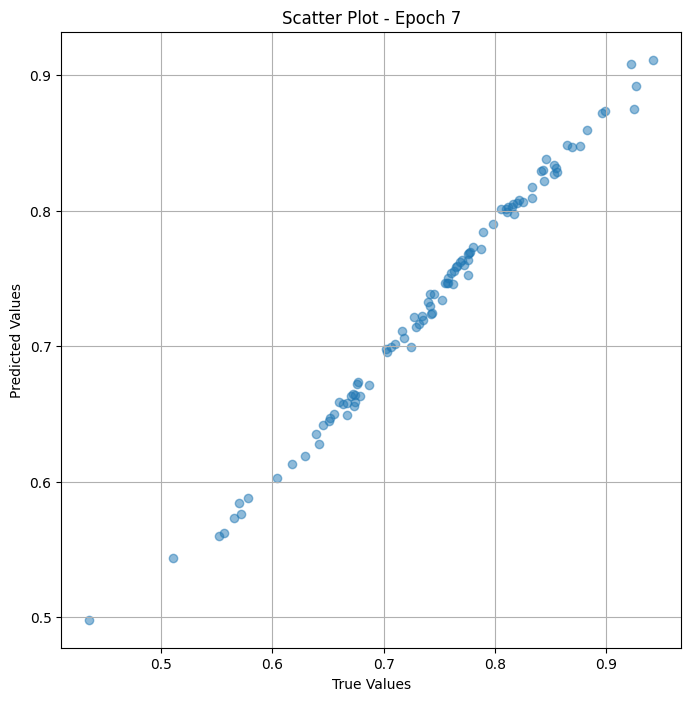

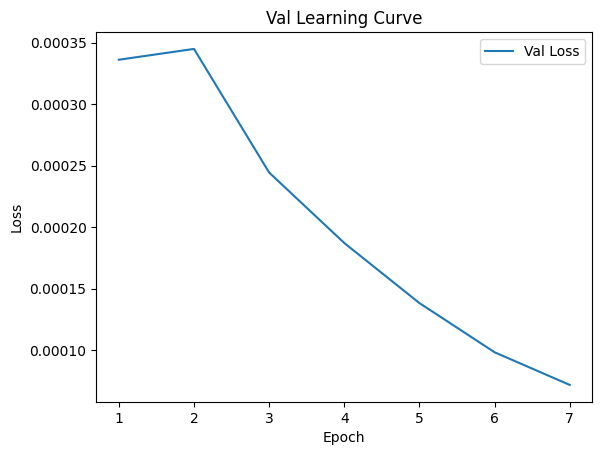


 Epoch: (8/10) Loss = 5.154428072273731e-05

 Epoch: (8/10) Loss_rmse = 0.007179434411227703

 Epoch: (8/10) R^2 = 0.980278730392456

 Epoch: (8/10) MAE = 0.006342098116874695
Spearman correlation coefficient: SignificanceResult(statistic=0.9970631724082338, pvalue=1.0572403488927585e-106)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.6741573, 0.8333333, 0.6666667, 0.742268, 0.86868685, 0.7757009, 0.9245283, 0.76237625, 0.6666667, 0.74358976, 0.6862745, 0.853211, 0.7352941, 0.7244898, 0.84375, 0.5714286, 0.67391306, 0.7291667, 0.7340425, 0.7184466, 0.8252427, 0.81707317, 0.61764705, 0.77227724, 0.78723407, 0.67826086, 0.6732673, 0.8761062, 0.8557692, 0.85470086, 0.65555555, 0.7522124, 0.5104167, 0.6451613, 0.556701, 0.8828829, 0.7752809, 0.57843137, 0.7570093, 0.6037736, 0.8192771, 0.74157304, 0.72727275, 0.7311828, 0.43564355, 0.7706422, 0.6506024, 0.6421053, 0.84158415, 0.94186044, 0.6727273, 0.75510204, 0.8648649, 0.63917524, 0.8958333, 

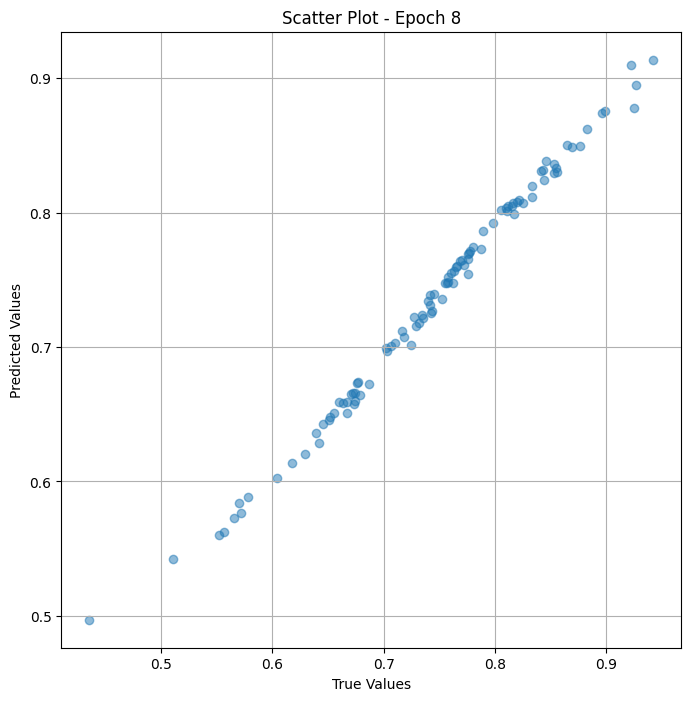

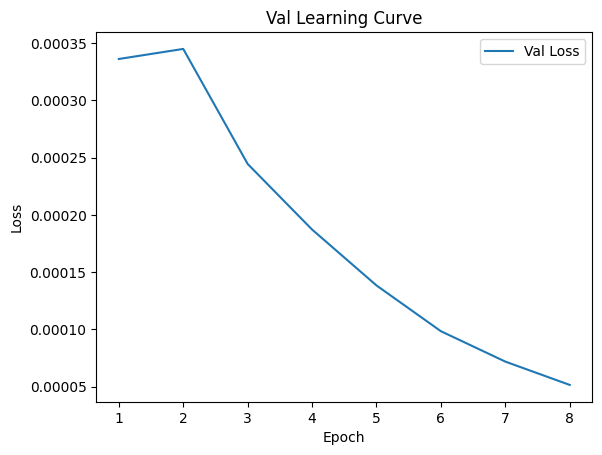


 Epoch: (9/10) Loss = 3.568722240743227e-05

 Epoch: (9/10) Loss_rmse = 0.005973878316581249

 Epoch: (9/10) R^2 = 0.9863457679748535

 Epoch: (9/10) MAE = 0.005184367299079895
Spearman correlation coefficient: SignificanceResult(statistic=0.9974972531744263, pvalue=5.804072803956433e-110)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.6741573, 0.8333333, 0.6666667, 0.742268, 0.86868685, 0.7757009, 0.9245283, 0.76237625, 0.6666667, 0.74358976, 0.6862745, 0.853211, 0.7352941, 0.7244898, 0.84375, 0.5714286, 0.67391306, 0.7291667, 0.7340425, 0.7184466, 0.8252427, 0.81707317, 0.61764705, 0.77227724, 0.78723407, 0.67826086, 0.6732673, 0.8761062, 0.8557692, 0.85470086, 0.65555555, 0.7522124, 0.5104167, 0.6451613, 0.556701, 0.8828829, 0.7752809, 0.57843137, 0.7570093, 0.6037736, 0.8192771, 0.74157304, 0.72727275, 0.7311828, 0.43564355, 0.7706422, 0.6506024, 0.6421053, 0.84158415, 0.94186044, 0.6727273, 0.75510204, 0.8648649, 0.63917524, 0.8958333, 

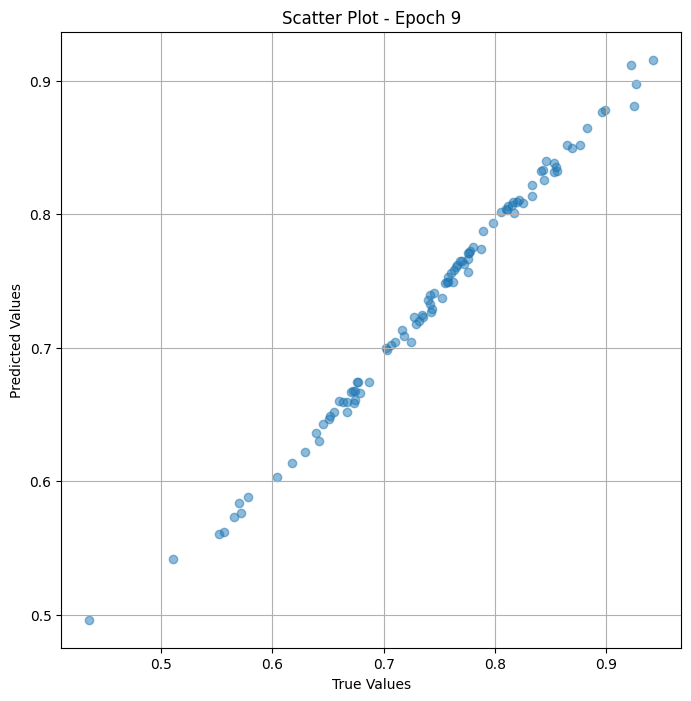

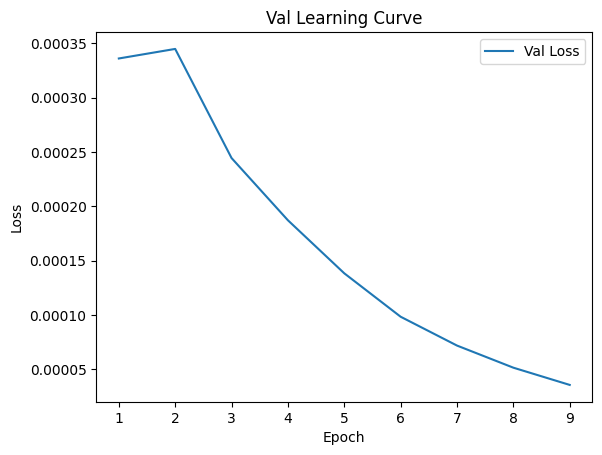


 Epoch: (10/10) Loss = 2.4274304450955242e-05

 Epoch: (10/10) Loss_rmse = 0.004926896188408136

 Epoch: (10/10) R^2 = 0.9907124638557434

 Epoch: (10/10) MAE = 0.0043138861656188965
Spearman correlation coefficient: SignificanceResult(statistic=0.9976803809976638, pvalue=1.6387539676020159e-111)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.6741573, 0.8333333, 0.6666667, 0.742268, 0.86868685, 0.7757009, 0.9245283, 0.76237625, 0.6666667, 0.74358976, 0.6862745, 0.853211, 0.7352941, 0.7244898, 0.84375, 0.5714286, 0.67391306, 0.7291667, 0.7340425, 0.7184466, 0.8252427, 0.81707317, 0.61764705, 0.77227724, 0.78723407, 0.67826086, 0.6732673, 0.8761062, 0.8557692, 0.85470086, 0.65555555, 0.7522124, 0.5104167, 0.6451613, 0.556701, 0.8828829, 0.7752809, 0.57843137, 0.7570093, 0.6037736, 0.8192771, 0.74157304, 0.72727275, 0.7311828, 0.43564355, 0.7706422, 0.6506024, 0.6421053, 0.84158415, 0.94186044, 0.6727273, 0.75510204, 0.8648649, 0.63917524, 0.89

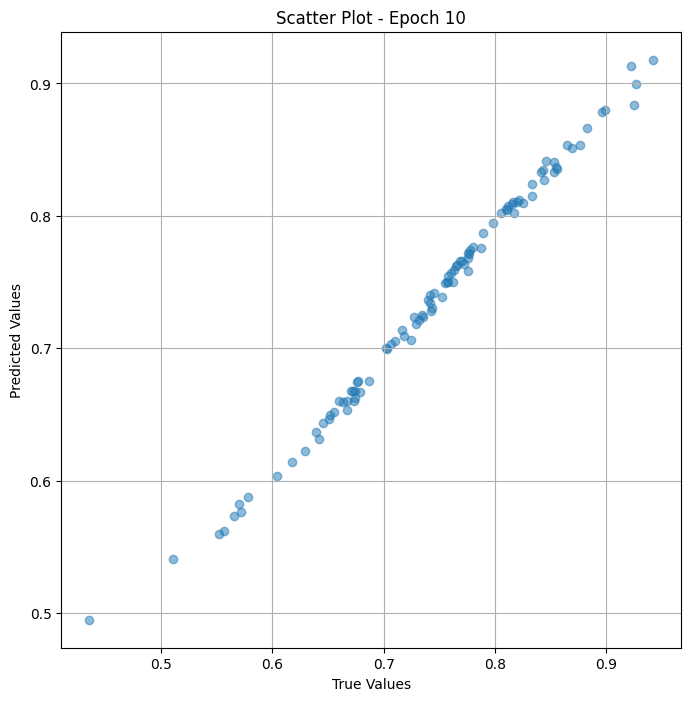

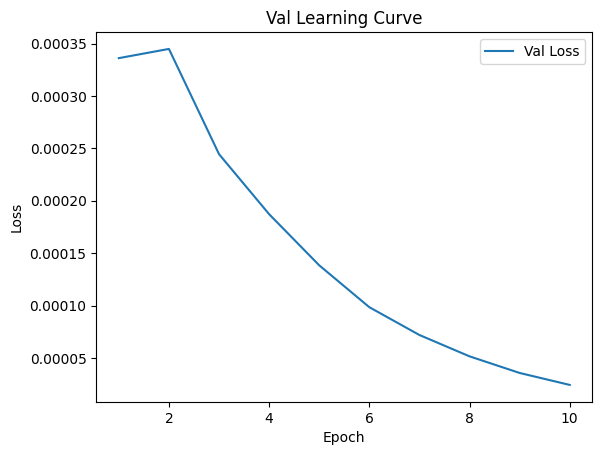

In [ ]:
# val the model and save weights
fit(10, model_res_val  , val_dl )
torch.save(model_res_val.state_dict(), "model_weights_s")

## Test

In [ ]:
params = [param for param in list(model_res_test.parameters()) if param.requires_grad == True ]
optimizer = torch.optim.Adam(params, lr=1e-4 ,weight_decay=1e-7)

lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=2,
    verbose=True)

In [ ]:
# Define the plot_scatter function
def plot_scatter(true_values, predicted_values, epoch):
    plt.figure(figsize=(8, 8))
    plt.scatter(true_values, predicted_values, alpha=0.5)
    plt.title(f'Scatter Plot - Epoch {epoch+1}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

def plot_learning_curve(loss_list):
    plt.plot(range(1, len(loss_list) + 1), loss_list, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Test Learning Curve')
    plt.legend()
    plt.show()

def fit(epochs,model_res_test, test_dl):
    opt = optimizer
    sched = lr_scheduler
    loss_func = nn.MSELoss()
    mae_func = nn.L1Loss()
    total_loss_list = []


    for epoch in range(epochs):
        model_res_test.eval()
        batch_num = 32
        true_values_list = []
        predicted_values_list = []

        for x_trans, yb in test_dl:
            total_loss = 0
            total_loss_rmse = 0
            total_r2 = 0
            total_mae = 0
            total_spearman =0
            #total_spearman = 0

            yb = yb.float()

            # Pass the optimizer so that the model will get trained
            preds = model_res_test(x_trans)
            loss = loss_func(preds.squeeze(), yb)
            loss_rmse = torch.sqrt(loss)
            mae = mae_func(preds.squeeze(), yb)

            # Calculate R-squared
            mean_y = torch.mean(yb)
            ss_total = torch.sum((yb - mean_y)**2)
            ss_residual = torch.sum((yb - preds.squeeze())**2)
            r2 = 1 - (ss_residual / ss_total)

            #calculate  spearman
            spearman_corr = spearmanr(true_values_list, predicted_values_list)

             # Accumulate true and predicted values for scatter plot
            true_values_list.extend(yb.cpu().detach().numpy())
            predicted_values_list.extend(preds.squeeze().cpu().detach().numpy())



            # Backpropagation
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Print batch information
            #print('\nBatch:', batch_num)
            #print('True Values:', yb.cpu().detach().numpy())
            #print('Predicted Values:', preds.squeeze().cpu().detach().numpy())

            # Accumulate losses, R-squared, MAE, and Spearman values for the epoch
            total_loss = loss.item()
            total_loss_rmse = loss_rmse.item()
            total_r2 = r2.item()
            total_mae = mae.item()

            # Increment batch number
            batch_num += 10
        # Adjust learning rate scheduler based on total_loss
        sched.step(total_loss, total_loss_rmse)

        # Calculate mean R-squared, MAE, and Spearman for the epoch
        mean_r2 = total_r2 / batch_num
        mean_mae = total_mae / batch_num
        #mean_spearman = total_spearman / len(train_dl)

        # Print epoch information
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss = {total_loss}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss_rmse = {total_loss_rmse}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) R^2 = {total_r2}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) MAE = {total_mae}')
        print("Spearman correlation coefficient:", spearman_corr)
        print('\n', f"true_values_list_val : { len(true_values_list)}")
        print('\n', f"predicted_values_list_val : {len(predicted_values_list)}")
        print('\n', f"true_values_list_val : { true_values_list}")
        print('\n', f"predicted_values_list_val : {predicted_values_list}")
        total_loss_list.append(total_loss)
        plot_scatter(true_values_list, predicted_values_list, epoch)
        plot_learning_curve(total_loss_list)

In [ ]:
# val the model and save weights
fit(30,model_res_test , test_dl )
torch.save(model_res_test.state_dict(), "model_weights_s")

In [ ]:
true_values_list_test = []
predicted_values_list_test = []

for x_trans, yb in test_dl:
    preds = model_res_test(x_trans)
    true_values_list_test.extend(yb.cpu().detach().numpy())
    predicted_values_list_test.extend(preds.squeeze().cpu().detach().numpy())



# Assuming 'df_test_vehicle' is your original DataFrame and 'true_values' and 'predicted_values' are lists of true and predicted values
df_result_fine = pd.DataFrame({
    'Image Path': df_test_vehicle['preprocessed_image_path'],
    'True Value': true_values_list_test,  # Replace with your actual true values
    'Predicted Value': predicted_values_list_test # Replace with your actual predicted values
})

# Display the resulting DataFrame
print(df_result_fine)

                                           Image Path  True Value  \
0   /content/vehicle/n04610013_10508_preprocessed.jpg    0.782609   
1   /content/vehicle/n02878222_22680_preprocessed.jpg    0.730000   
2    /content/vehicle/n03541923_1742_preprocessed.jpg    0.787611   
3    /content/vehicle/n03594945_5856_preprocessed.jpg    0.887755   
4   /content/vehicle/n02946348_18684_preprocessed.jpg    0.781250   
..                                                ...         ...   
95   /content/vehicle/n04610013_1891_preprocessed.jpg    0.566265   
96  /content/vehicle/n04467665_39726_preprocessed.jpg    0.479592   
97   /content/vehicle/n03670208_9655_preprocessed.jpg    0.877193   
98   /content/vehicle/n04252077_6769_preprocessed.jpg    0.631579   
99  /content/vehicle/n02834778_17153_preprocessed.jpg    0.842593   

    Predicted Value  
0          0.775101  
1          0.722115  
2          0.789835  
3          0.875793  
4          0.781375  
..              ...  
95         0.5731

# ทดสอบกับรูปอื่นๆ

In [ ]:
model = Resnet_model_test_res_vehicle()
image = Image.open("/content/animal/000000002066.jpg")

# Define preprocessing transforms
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match the input size expected by the model
    transforms.ToTensor(),           # Convert to a PyTorch tensor
    transforms.Normalize(mean=[0.0, 0.0, 0.0], std=[1.0, 1.0, 1.0])  # Normalize the image
])

# Apply preprocessing transforms
input_data = preprocess(image)

# Add batch dimension as the model expects a batch
input_data = input_data.unsqueeze(0)

# Assuming ViTMem_model is a PyTorch model
model = Resnet_model_test_res_vehicle()
memorability = model(input_data)

print(f"Estimated memorability: {memorability}")



Estimated memorability: tensor([[0.4737]], grad_fn=<SigmoidBackward0>)
